In [2]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
from matplotlib import font_manager, rc
from sklearn.model_selection import train_test_split

D:\anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## 2.4 분류 예측의 불확실성 추정

scikit-learn 분류기에서 불확실성을 추정할 수 있는 함수가 두 개 있다. 
> 1) decision_function<br>
> 2) predict_proba

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X,y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named =np.array(["blue","red"])[y] # 예제를 위해 클래스의 이름을 "blue"와 "red"로 변경

# 여러개의 배열을 한꺼번에 train_test_split에 넣을 수 있다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X,y_named,y,random_state=0)
#그레디언트 부스팅 모델을 만듬
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

### 2.4.1 결정 함수

In [3]:
# decision_function 반환값의 크기는 (n_samples,)이며 각 샘플이 하나의 실수 값을 반환한다.
# 이 실수 값은 모델이 데이터 포인트가 양성클래스인 클래스 1에 속한다고 믿는 정도를 의미
print("X_test.shape : ", X_test.shape)
print("결정 함수 결과 형태:",gbrt.decision_function(X_test).shape)

X_test.shape :  (25, 2)
결정 함수 결과 형태: (25,)


In [4]:
# 양수 값은 양성 클래스를 의미하며 음수 값은 음성(즉 다른)클래스를 의미
# 결정함수의 부호만 보고 예측 결과를 알 수 있다.

print ("결정 함수:\n", gbrt.decision_function(X_test)[:6])

결정 함수:
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [5]:
print("임계치와 결정 함수 결과 비교:\n",gbrt.decision_function(X_test)>0)
print("예측:\n",gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [6]:
# boolean 값을 0(False), 1(true)로 변환
greater_zero = (gbrt.decision_function(X_test) > 0 ).astype(int)
# classes_에 인덱스로 사용
pred = gbrt.classes_[greater_zero]

print("pred는 예측 결과와 같다:", np.all(pred==gbrt.predict(X_test)))

pred는 예측 결과와 같다: True


In [7]:
greater_zero

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

In [8]:
pred

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

In [9]:
# decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라진다.

decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값 : {:.2f} 최댓값: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값 : -7.69 최댓값: 4.29


In [24]:
plt.rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rc('axes',unicode_minus=False)

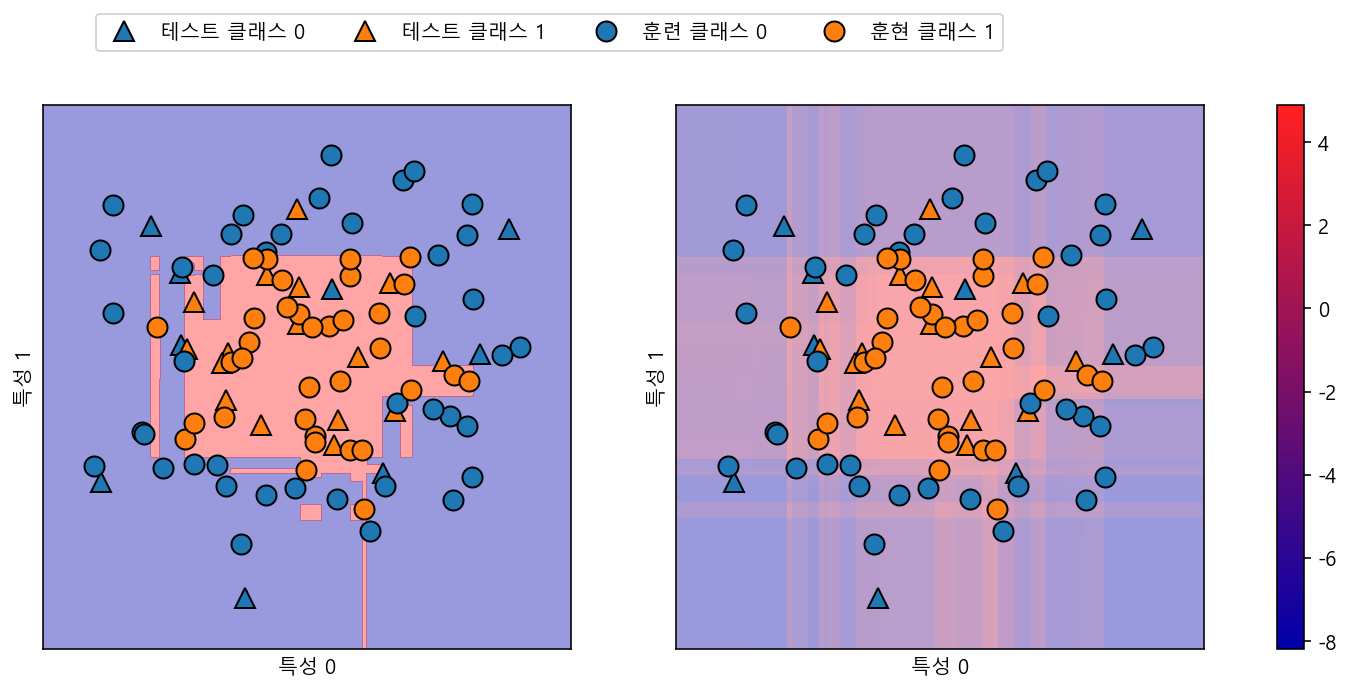

In [11]:
fig, axes = plt.subplots(1,2,figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4,cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image,ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0 ", "훈현 클래스 1"], ncol=4, loc=(.1,1.1))
# 왼쪽이 결정 경계 이고 오른쪽이 결정 함수 인데 
# 둘이 거의 유사한 것을 알 수 있다. 하지만 결정 함수 그래프에서 두 클래스 사이의 경계를 구분하기는 어렵다.

### 2.4.2 예측확률

predict_proba의 출력은 각 클래스에 대한 확률이다. <br>
값의 크기는 이진 분류에서는 항상 (n_samples,2) 이다. <br>
각 행의 첫번째 원소는 첫번째 클래스의 예측확률, 두번째원소는 두번째 클래스의 예측확률<br>
확률 이기때문에 출력은 0~1 사이의 값이고 두 클래스의 합은 1이다.

In [12]:
print("확률 값의 형태:",gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


In [13]:
print("예측 확률:\n",gbrt.predict_proba(X_test[:6]))

예측 확률:
 [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


두 클래스의 확률 합은 1이므로 두 클래스 중 하나는 50% 이상의 확신을 가질 것이 틀림없다.<br>
그 클래스가 예측값이 된다.

데이터에 있는 불확실성이 얼마나 이 값에 잘 반영되는지는 모델과 매개변수 설정에 달렸다.<br>
일반적으로 복잡도가 낮은 모델은 예측에 불확실성이 더 많다. <br>
불확실성과 모델의 정확도가 동등하면 이 모델이 <b>보정</b>되었다고 한다.<br>
> 보정된 모델에서 70% 확신을 가진 예측은 70%의 정확도를 낸다.

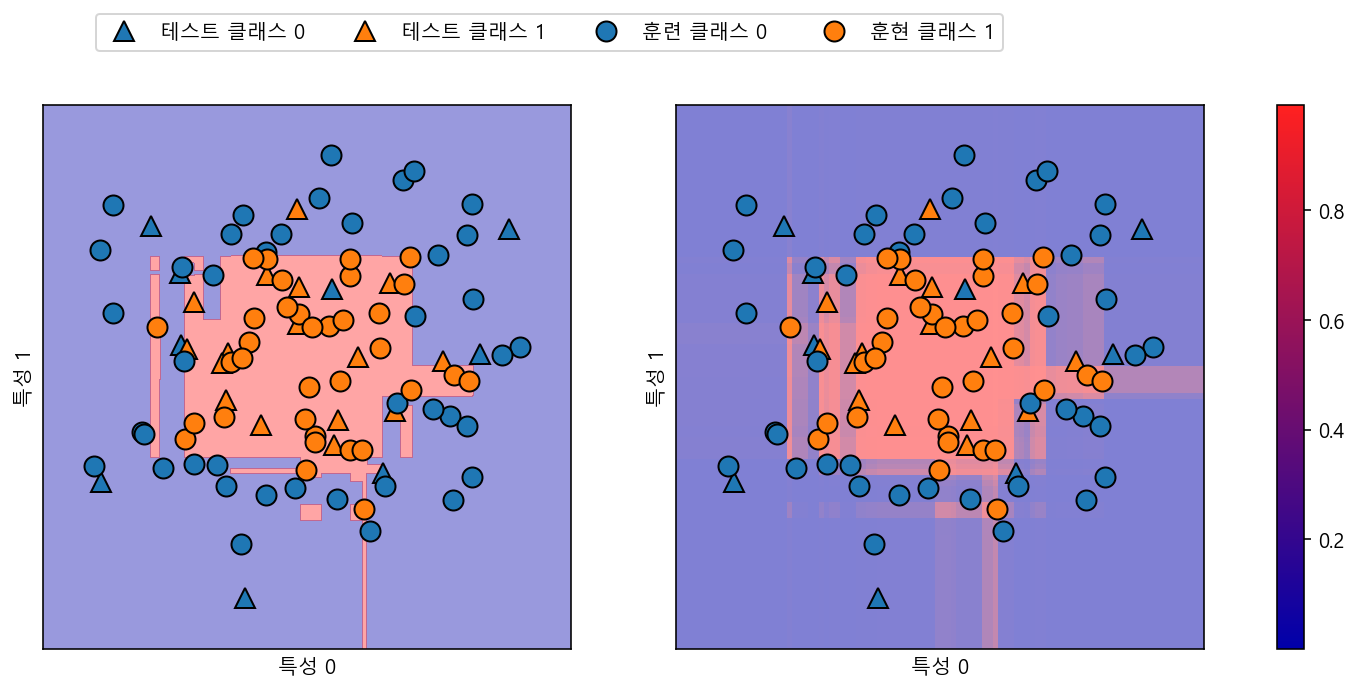

In [14]:
fig, axes = plt.subplots(1,2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5,cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image,ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABU4AAAK0CAYAAADca6cJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3Xt4lPWd///XPZOZnDMcQghBOSYIJCDWBbYIFGjF7Q9kr99WwcYDdSnWrq2/Yist34ptpdvuFrdiV8pipSu2ZKXaXl4s1BVYQAP0C62KkIRAEk6aQA5AkslxJpP79wdMGockTJLJTDLzfFxXLnHmns+8uckn877fed+fj2GapgAAAAAAAAAAf2UJdQAAAAAAAAAA0N9QOAUAAAAAAAAAHxROAQAAAAAAAMAHhVMAAAAAAAAA8EHhFAAAAAAAAAB8UDgFAAAAAAAAAB8UTgEAAAAAAADAB4VTAAAAAAAAAPBB4RQAAAAAAAAAfFA4BQAAAAAAAAAfFE4BAAAAAAAAwAeFUwAAAAAAAADwERXqACLd+++/HyvpAUlfkDROki20EQEAAAAAQsAt6YykvZJev/POOxtDHA8ARDzDNM1QxxCxrhdNX7RarZ+zWq1DLBZLrCQj1HEBAAAAAILObG1tbfR4PFc8Hs+7kv4/iqcAEFp0nIbWA1ar9XOxsbHDU1NTLyUkJDRYrdbWUAcFAAAAAAguj8djqauri7t06VJqY2Pj5zwezwOS/jPUcQFAJGON09D6gtVqHZKamnrJ4XDUUTQFAAAAgMhktVpbHQ5H3fDhw8utVusQXVvODQAQQhROQ2ucxWKJTUhIaAh1IAAAAACA0EtMTKy/vozb2FDHAgCRjsJpaNkkGXSaAgAAAAAkyWKxtOra3hf2UMcCAJGOwikAAAAAAP2EYbBfMAD0F2wOFSHcbrd++tOfpkjSmjVrKmw2W6hDAtANzGFg4CotLY06ePBgfF5eXkxjY6MlNja2NSsrq2n27Nn1I0eObAl1fEAkYT4CAIDuoHAaITZv3jz0Bz/4wa2SNGTIEM83vvGNy6GOCYD/mMPAwNLa2qrf/e53jo0bN6YcPHgwqbPjZs+eXfvEE09ULF26tMZi6Z83AlVWVloladiwYZ5QxwL0BPOx+2pray3Nzc0G8x4AEOkM0zRDHUPEev/99/8SExMzKTMz82Rfvo/b7VZ6enrWhQsXoiVp1KhRzcXFxXkDsWPt7rvvHj9hwoSmjRs3lu7cuTPx3nvvnfDuu++enDt3bthtsHXq1Cl7Q0OD31n7pEmTmmNiYno8odPT0zMfeuihqh/+8Iflp06dsk+cOHHK5s2bzzz22GNXezomAoM5PDAxhyPXhQsXolasWDF67969gyTJsNpkT7tN9pSxskTHq7W5Xq6Ks3KVnZLpcUuSvvCFL1Rv2bLl/KhRo/pdx9usWbMmWK1WMzc3t6gv3+epp55K27hxY2pzc/MHPXk9cw4d8Z2P0VHSzJFWTRtulSNGqmmSjpV7dKTUo+brsy/c5+PixYvHNTU1GXv37i3p7Jjs7OxR7777rqO0tPRET96D+dh7+fn5k5qamk7eeeedfxPqWAAgktFxGgE2b9489MKFC9FRg0dIki5cuBC9efPmof2pY23Xrl0JmzZtSunouXnz5tV+5zvfqZKkjz/+ODopKalXv/levHjxOLvd3vqHP/zhXHdfm5eXF+12u/1edOj2229v6mnHwt///d+nnzp1Ktbf4//yl7/k33nnnU2+j//qV78a/Oc//zm+o9fMmTOn7uGHH66WpPLyclttba21R8Fe15tzi85553D6kGvfS8XMYebwdczh/uejjz6KXrhw4W0VFRU2S3Sckj67VAlTF8oae2OTm6exVnXHd6vm8Hbt3bt30PTp0+N379596vbbb28OdtxNTU3Gzp07Ezt67urVq1FWq9V88803O+zUu/fee53R0dE3FDxGjRqVVVZWFt3Ra9LS0povXLiQ17uoP405B1/t52NStKHvz7FrxR02DY278ef65YZWbfnQrR/nusJyPrZXX19vaW5u7tOWWuYjACBcUDgNc263W+vXrx8hSY5ZD0iSLu96QevXrx/xta997XJ/6VgrKSmJ3rVr1+B77rnnqm+yZ7X2Kge6QVFRUUxMTExrT147Z86cidXV1X7Pm/r6+g/i4uJ69NvzwsLCAn+Oe/PNN5Puv//+jM6KO2fPno0+duzYDQnnRx99FN/U1GTxJpyB0Jtz25kXX3xx6KZNm4afO3cuJjExseWLX/xi9YsvvvjJ4MGDA/o+/VX7Obx27rWNVZe/1cQcZg4PmDns9dJLLw199tlnb7ly5cpHfTF+f3DhwoUob5EmeuQkJS9ZraikYZ0eb41NkmPmfYqfNFdVO9arovSk7Z577rnt6NGjBcHudKuoqLDef//9GV0d09nzZWVlH40YMeKGeF966aXz9fX1N3xjv/zyy8NOnz7td0HFX8y5ayL9c9Or/XycdatVr38pVrc6Oq8VDo2zaPVd0Xogy6Yv/75Rhz+uCIv5+Pbbbyfs37//U0XYc+fORXs8HmP16tUj2j8+Z86cunvvvdfZm9i9mI+fFgmfgQAQriichrn23abxk+dJkmoOv94vu04l6eWXX77Ql8np+fPnbSUlJTFWq1WXLl2ypqamdrvz7Zvf/ObFX/ziF2V9EV9nmpubjfr6eqO+vt7i/WpoaLA0NDRY/vznP8dJUlRUVIfFnZ/85CeXfvKTn1zyfXzkyJFTAhljIM6tr6eeeirthRdeGPHFL37x6qOPPlpZUFAQs23btmEnTpyIO3r0aGF/KRr2pfbdptlTrv19173n6pddpxJzuDOROoclKTc3N+573/veyMOHDyfFxsaGbeGmtbVV//iP/zjaWzRNWbZOFluMX6+NSkpRyrJ1qti+VuWlJ20rVqwY/c4775QEc43FW265paW6uvrD9o95PB5dvHjRVltba5Ekh8PhGTFiRItvXA6Ho8N/1yVLlnRYgHn77bcd3sJpWlraFKfTaZUkl8sVsL9wpM45PjevaT8fZ91q1Z6H4xRn8+9mg1EOi/Y8HKe7f9Ogwx+XD/j5mJ+fH/PHP/5xUPvH4uPjWyXJ9/FBgwa1BKpw2l6kzkcpcj4DASCcUTgNY77dpoblWteXY9YD/bLrNBieeuqpkYmJiR6322359re/PXLbtm0XQh1TR3784x+nvPDCCyOamposzc3NFo/n07lbTExMa3x8fGt8fLynpaXFkKSb3ZbV1wJ9bj/88MOYF198ccSKFSvKX3nllU+8j2dmZjZ997vfHbVp06ahTz75ZL8qGgaab7dplOXaRd/aufZ+2XUaDMzhvtMX53b69Om3/eUvf0lITk52T548ueHs2bP+VRIHoN/97neO//3f/x1k2GOVvGS130VTL4stRslLnlbZlie0d+/eQW+88YZj2bJlNX0U7o3vb7HI4XC0NjU1Gc8///ywN998c0hBQUGc79IWdrvdzMzMbFi6dOnlVatWVfX2+/bnP//5Be97bN++fciePXsG3ew1HWHO8bnZnnc+JkYbev1LsX4XTb3ibIb+60uxytpUP+Dn43e+850q73I5kuR0Oi2nT5+2m6ap2267zZWYmBjwYh7z8ZpI+gwEgHBG4TSMddRtKknxk+f1667TvvLTn/502B/+8Iehv/zlL882NjZavv3tb4+eOnVq43e/+93K7oxz+fLlqA8//PCmic+IESPcPf1t9cMPP3x1zJgxrqSkJI/D4fAkJSW1Dho0yONwODwOh6O1/a3P//Ef/zHk61//+thQ/hY7UOe2vV/+8pfJNpvN/Jd/+ZeL7R9/6qmnKtevXz/i9ddfHxLuF4AddZtKUvYUW7/uOu0rzOG+0xdzWLp2rr/1rW9dXLt27aWVK1eOCueLxo0bN6ZIkmPWsi5vz+9KVFKKHLOWqfrAq9q4cWNKMAs1XgsWLEg/ceJE/OOPP17+4osvXpg8eXLz4MGDPaZpqrq62pqXlxe9c+dOx49//ONb3nnnHcf+/fuLOxtr9uzZGeXl5XbfxysrK23x8fEeSXrggQfa/o4ffvhh3J49e3oUN3OOz832vPPxmTn2Lm/P78ooh0XPzLHru3ubw2I+5uXlRT/99NMj33nnncHezYENw9DChQuvPv/886VZWVnN//Iv/zLs+PHjsZJ09OjRDtdY9Qfz8ZpI+gwEgHBG4TRMddZtKkmGxdpvu0737t2bOGTIkBZJio2NNe+555663o7p8Xj0ve99b8S//du/pX3ve98r/frXv35FkiorK6PWrFkzqqyszPb888+X+XsOcnJyhuXk5Nz0qvjpp58u+9nPfnbxZsd1ZPTo0e7Ro0f7tWZTc3OzIXV+q+Tly5et9fX1N7RaeDye7rVfdCDQ57a99957L+n222+vS05O/lThKioqSn/7t3/r3Lt376DW1lYF89a5YOqs21SSoixGv+06ZQ5fwxy+pri4OD9c52h7paWlUQcPHkwyrDYlTF3Yq7ESpi5UTe425ebmJpWVlUWlpaUFbW3FsrKyqD/96U9JnX3vDxs2zDN//vyG+fPnN5imabzwwgsjampqLJ197549ezYmNTXV9aUvfemK73NJSUmtktTY2Gh4izgtLT3/qzLn+Nz08s7H6ChpxR29+2xccYdNzx5oHvDz8eOPP46aO3fuxNTUVNdbb711+nOf+1y9YRh677334r/3ve/d8rnPfW7isWPH8mtra61XrlyJkv46T3qC+XhNpHwGAkC4o3AapjrrNvXqr12nK1asGOf9c0pKiru8vPz4oUOHYisrK6MkqaGhwe/sw+Px6M0333SsW7cu7cKFC9GbNm06+7Wvfa3t4u2nP/3ppYkTJzatWrVq9Ntvvz1ozZo1Fx966KGrN0uO+nJ9xKKiIntdXV23Mqxz585FW61WlZSU2CUpMTHRk56e7vY+/9hjj936hz/8Yag/YzU0NFguXrwYVVVV1eVuPn11btuPf+7cuZilS5dWdfT8hAkTmnbu3Gn5+OOPbaNHj3Z3dMxA11m3qVd/7TplDjOH24uUC8aDBw/GS5I97TZZYzvc6Npv1tgk2UdMUPMn+Tp48GDc0qVLawMSpB9SU1NbZsyY4dy8efNwm81mfv7zn3dOnjy5adCgQa02m828evWq9dSpU/Zdu3Y5fvWrX6XMnj27trNih9dtt93W+H/+z//ptGtr0KBBd7hcrrYCiN1u79btusy5v44f6Z+bXt75OHOkVUPjevczaGicRTPSrMq94BnQ8/GVV14ZWl1dHfXBBx8UjBkzpu3ff/Hixc7bb7+9aMyYMbdv2bJlaPu1RLOzs0e9++67ju7EzHz8tEj5DASAcEfhNAx11W3q1V+7Ts+cOXP8lltucUvXbh+SpKeffvrWP/3pT223C02fPv2mHWxPPvlk2vbt25OrqqpsixcvvvL2228X3XrrrTd0CSxfvrz67/7u75zf+ta3bnnsscfGfvvb3x710EMPVQZ74xivBx98cOyf//znhJ689jOf+UymJH32s591Hj58+HT750aNGtX85ptv3nD7VkpKyqe6UjZv3jx88+bNw7t6n2Cc28rKSqvL5TJSU1M7vLhLSUlpkaSqqiprOF4AdtVt6tVfu06Zw8zhSJSXlxcjSfaUsQEZzz58nJo/yVdeXl5sMAs1FotF+/fvL/rXf/3XlN///vdDfvazn6V51x/0stls5sSJExtWr15d9vTTT/fqNlZJ2rlz56nW1lZDkl555ZXkHTt2DOnO65lz10T652Z73vk4bXiXtTO/TUu9VjgdyPOxrq7OYrVazaFDh96w/MzQoUM9VqvV7G7BsyPMRwBAOKJwGoZu1m3q1R+7Tq1Wq+lb/Nm/f3+Rd1H5O+64Y5I/49x3333VcXFxrStXrrw8fvz4Li8Qhg8f7vmv//qv8z/72c9KN23alHzfffd1eWuRv+sjStKYMWNcgwcP9nvNpqNHj57y99jusNvt5vTp05tudtzSpUurHnvssarS0lLb8uXLx3d0TF+eW6/6+nqLJEVHR3d47ryP9+Y2sv7sZt2mXv2x65Q5zByORI2NjRZJskTHB2Q8iz1OUvc6tAMlLi7O/NGPflT+ox/9qNzj8eiTTz6xOZ1OiyQlJia23nLLLe726xPezLlz56JffvnlwZJkmqbhdruN+vp6S1VVVZTb7TY2bNjQVoR45513ut2uy5y7JtI/N9vzzkdHgFaTdERf++9Ano/Lli2rfvHFF0c8+OCDo7ds2XJh2LBhHunabfArV668tbW1VcuWLbu6YcOGoQUFBbGS9MEHH3S7AMp8BACEIwqnYcafblOv/tp16qv9LpveDrabmTt3bsPcuXMbuvM+t956a0v7W5Q64+/6iJL061//+syjjz56tTtxeBUWFtq9yf/N2Gw2Mysrq7kn79PeyJEj3Z///OfrT506dcNmHl59eW69bDabKUm+nRVeLpfLIknx8fEh20igr/jTberVX7tOfTGHby7c5nCk8W5q0tpcH5DxWl3X/nni4uKC8jOupqbG4rtbt9f1na/b4rh69WqHiYXdbje965a2e63nxIkT8U8//XS8xWIxDcOQzWYzExMTPSkpKe7Ro0f3+nu+vUiec5H8uenLOx9rblpm80/N9e+SgTwfZ8yY0bhly5Yzq1evHjVq1KipY8aMaTYMwzx37lxMYmKi59e//vWZ6dOnN23fvn1wUVFRjCTV1tZa/f3M7kgkz0cAQHihcBpm/O029eqPXaf92dWrVz8K1nt98YtfzDh37pxf/RKDBg1qCWZsfW3IkCEeSfJuUODr8uXLVuna+l/BjCsY/O029eqPXaf9GXMYfSErK6tJklwVZwMynqv8jHfcxoAMeBN33313Rk9vr/Xq6Pba06dPF/Qusu6J5DkXyZ+bvrzz8Vj5DXel98ixSx7vuAN6Pi5fvrz6/vvvr9m5c2dicXFxtGEYGj9+fPPixYudcXFxpiQ9//zzbZtQ9WSN0/YieT4CAMILhdMw0p1uU6/+1nX68ssvD01MTGz1eDxyuVyWhoYGy9WrV63f+ta3KjMzMwPamdLfnT17Nt+f45588sm03/zmNzftnnO7/3o3ksfjMVwul1FXV2e5evWqtb+d24SEBHP48OHu4uLiDhPu06dPxwwdOrRl+PDhgbkq6ie6023q1d+6TpnDfxXJczjSzJ49u16SXGWn5Gms7dUGUZ7GWrkunvaO262uqJ767//+7+KubuH++te/Pur06dOx//u//9vpbbixsbGdbur061//evCFCxfsP/zhD8t7G2tXInnORernZke88/FIqUeXG1p7tUHU5YZWHS3zeMcd8PMxLi7OXLx4sTM6Orq2O0tu9EQkz0cAQHihcBpGuttt6tUfuk4TExNb09LSXK+++mqK1Wo1rVarabfbzdjY2FaHw9ESiAXrBxp/b3G6fPnyTedxcXFxjN1uv7Oj5+x2u9nQ0PBBT2LsS9OnT3e+++67joaGBsPbCSFJLS0tOnz4cNJdd90VtA0agqW73aZe/aHrlDl8o0ifw5Fk5MiRLbNnz649ePBgUt3x3XLMvK/HY9Ud3y3T49acOXNq09LSgtId6C2mlZeXW1esWDH6qaeeKl+wYEHbugMxMTGtVqvVHDVqVI/i2bVrl+ODDz6Iv1nhdMyYMc1/8zd/4+zJe0jMuUj83OxI+/m45UO3Vt8V3eOxtnzoVnOLwmY+lpSU2NLT06f2Zhkaf0X6fAQAhA8Kp2GiJ92mXv2h6/TRRx+9GqgEbsaMGbcF8hanoqIie2+LPomJiZ709PRu7WLb3VucOnvumWeeufToo49eliTDMEyLxSKLxSKr1WrGx8e3jhw50u+NPgJ9brvy6KOPXt65c+eQdevWDf/pT3/atq7Uz3/+82EVFRW2f/qnf+r1bs79SU+6Tb36Q9cpc/hGkT6HI80TTzxRcfDgwaSaw9sVP2muopJSuj1GS22Fag5vbxsv0DHeTF1dnWXXrl2Dv/SlL12VFJgFW7vhySefvPzkk0/2+Bc/kT7nIu1zsyve+fjjXJceyLJplKP7HwEXalr141xX23iBjvFmQj0ff/Ob31wwzU4byW8q0ucjACB8UDgNEz3tNvXqD12ngbJt27azgSiSeP/84IMPjg1VkvXlL3+5Micn50Jv3vuOO+5ouuOOOwKyRUKgz21X/uEf/qH2nnvuufqv//qvI4uLi2OmT59ef/z48djXX399WHZ2duU999xT15s4+puedpt69Yeu00BhDn/aQJ3DkWbp0qU1W7Zsqd67d++gqh3rlbJsnSw2/7f1bnU3qWrHepmuRt19993V999/f00fhtstt99+e8NA+XeP5DkXaZ+bXWk/H7/8+0bteThOcTb/fyHZ4Db15d83ytlsRux8DMSt/JE8HwEA4YPCaRjoTbepV3/oOg2UjIwMVyDHO3r0aKdrSPW12traqA8//NCvK+9bbrnFPWzYsD5N5gJ9bm/mrbfeOrt69eqmN954Y+iOHTuG3HLLLc0/+MEPPv7+978f9M6PvtSbblOv/tB1GijM4b4T7DkcSSwWi7Zs2XJ++vTp8RWlJ20V29cqecnTfnWettRWqGrHejWXntTw4cPdr7zyynmLJXSrW5SWltraf9/ee++9tZLU0fdyWlqa2591M91ut8XfueDvmB2J9DkXKZ+bN9N+Ph7+uMJ2928a9F9fivWr8/RCTau+/PtGHf7YE7bz0XfMrowaNco9dOhQ5iMAIGJROA0Dve029QqnrtNwsWvXrsG7du0a7M+xP/rRjz5+9tlnw+rCKCYmxvzFL35R9otf/KIs1LH0pd52m3qFU9dpuIj0Odze73//+3OSzoU4jD41atSolt27d5+65557bisvPWkr2/KEHLOWKWHqwg43jPI01qru+G7VHN4u09Wo4cOHu3fv3n2qp2uJBsratWtvXbt2rb/HfvLcc8/ddNOn0tJS+2c+85lMf8Zcs2ZN6U9+8pNLNz/yRpE+5yLlc9Mf7efj4Y/LbVmb6vXMHLtW3GHrcMOoyw2t2vKhWz/OdcnZbIb1fOzOmC+++OK5ni6hEenzsb1I+AwEgHBF4XSAa9+p1nL1oi6s//uAjNtfO9YKCwsLvH+Oj4/3jBkzpikuLq41lDH1FX93Iw0Up9N5zPtnu91ujhkzpsnhcITlue1P2s/h4iutsq3r8b4on8IcDj3mcGS6/fbbm48ePVqwYsWK0Xv37h1UfeBV1eRuk33EBNmHj5PFHqdWV4Nc5Wfkunhapufa0rlf+MIXqrds2XI+lEWa8ePHu03TfD/Q4warYMCcgy/f+fjdvc169kCzZqRZNS3VKke0VNMsHbvk0dEyj5qvz75wnY99Ncc7wnwEAIQLozeLfqN33n///b/ExMRMyszMPNnTMV566aWh3/zmN8cEMKw2//7v/36OjjWgbzGHgfDU2tqqN954w7Fx48aU3NzcG9tNr5szZ07tE088UXH//ffXhPJ2YCCcMR8xEOXn509qamo6eeedd/5NqGMBgEhG4TSEAlE4BQAA/VtZWVnUwYMH4/Ly8mIbGhoscXFxrVlZWY2zZ89uSEtLC+ltwECkYT5ioKBwCgD9A4XTEKJwCgAAAADwReEUAPoH7kEBAAAAAAAAAB8UTgEAAAAAAADAB4VTAAAAAAD6CZbTA4D+g8JpaLklmR6Ph38HAAAAAIBaW1stkkxJrlDHAgCRjoJdaJ1pbW1trKuriwt1IAAAAACA0HM6nfGtra2Nks6GOhYAiHQUTkNrr8fjuXLp0qXU6urqRI/HY+G2DAAAAACILKZpyuPxWKqrqxPLy8uHezyeK5L2hjouAIh0UaEOIMK97vF4PtvY2Pi5jz/+eIjFYhkpyQh1UAAAAACAoDNbW1sbPR5PucfjeVfS66EOCAAinUGHY2i9//77sZIekPQFSWMl2UMbEQAAAAAgBFy6dnv+Xkmv33nnnY0hjgcAIh6FUwAAAAAAAADwwRqnAAAAAAAAAOCDwikAAAAAAAAA+KBwCgAAAAAAAAA+KJwCAAAAAAAAgA8KpwAAAAAAAADgg8IpAAAAAAAAAPigcAoAAAAAAAAAPiicAgAAAAAAAIAPCqcAAAAAAAAA4IPCKQAAAAAAAAD4oHAKAAAAAAAAAD4onAIAAAAAAACADwqnAAAAAAAAAOCDwikAAAAAAAAA+KBwCgAAAAAAAAA+KJwCAAAAAAAAgA8KpwAAAAAAAADgg8IpAAAAAAAAAPigcAoAAAAAAAAAPiicAgAAAAAAAIAPCqcAAAAAAAAA4IPCKQAAAAAAAAD4oHAKAAAAAAAAAD4onAIAAAAAAACADwqnAAAAAAAAAOCDwikAAAAAAAAA+KBwCgAAAAAAAAA+KJwCAAAAAAAAgA8KpwAAAAAAAADgg8IpAAAAAAAAAPigcAoAAAAAAAAAPiicAgAAAAAAAIAPCqcAAAAAAAAA4IPCKQAAAAAAAAD4oHAKAAAAAAAAAD4onAIAAAAAAACADwqnAAAAAAAAAOCDwikAAAAAAAAA+KBwCgAAAAAAAAA+KJwCAAAAAAAAgA8KpwAAAAAAAADgg8IpAAAAAAAAAPigcAoAAAAAAAAAPiicAgAAAAAAAIAPCqcAAAAAAAAA4IPCKQAAAAAAAAD4oHAKAAAAAAAAAD4onAIAAAAAAACADwqnAAAAAAAAAOCDwikAAAAAAAAA+KBwCgAAAAAAAAA+okIdgL8MwzgrKUnSuRCHAgAABo4xkmpN0xwb6kDQMXI8AADQA2NEjtclwzC2SZoYxLcsNE3zwSC+X1AMmMKppCSbLWbIiBHjh4Q6EAAAMDBcvFgit7sp1GGga0lRUTFDhg0bR443AFlk3vBYq4ygvb/Rwfvf+Ej3R+2d3kcAdF+ov2+DN+8BSaqsPKOWFnK8m5gYaxifmWSz9fkbnXS71WiG5+ffQCqcnhsxYvyQ739/R6jjAAAAA8Q///MSXbiQfy7UcaBL54YNGzfka1/7XajjQA/EGC03PNZkBu8Sw6rWGx7rqHDbnZJObwu/HRVzgfY6+g7r7XeN2Qfft8GcN0B3bd68VBcvFpwLdRz93SSbTe+npfX5+9yt+WtSAAAgAElEQVRZVqYPXK4+f59QYI1TAAAAAAAAAPAxkDpOAQAAAAAAAPiptx3pkY6OUwAAAAAAAADwQccpAAAAAAAAEIZYebt36DgFAAAAAAAAAB90nAIAAAAAAABhiDVOe4eOUwAAAAAAAADwQccpAAAAAAAAEGZMSWYQFjkN53VU6TgFAAAAAAAAAB90nAIAAAAAAABhiDVOe4eOUwAAAAAAAADwQccpAAAAAAAAEIbCef3RYKDjFAAAAAAAAAB80HEKAAAAAAAAhB0jSGuchu86qnScAgAAAAAAAIAPOk4BAAAAAACAMMQap71DxykAAAAAAAAA+KBwCgAAAAAAAAA+uFUfAAAAAAAACDOmFJTNocJ5OQA6TgEAAAAAAADABx2nAAAAAAAAQBgK527QYKDjFAAAAAAAAAB80HEKAAAAAAAAhKFgrHEazug4BQAAAAAAAAAfdJwCAAAAAAAA4caUzGAschrGC6nScQoAAAAAAAAAPug4BQAAAAAAAMIQa5z2Dh2nAAAAAAAAAOCDjlMAAAAAAAAgzJgKTsdpGC9xSscpAAAAAAAAAPii4xQAAAAAAAAIQ+HcDRoMdJwCAAAAAAAAgA86TgEAAAAAAICwYwRljVMF5T1Cg45TAAAAAAAAAPBB4RQAAAAAAAAAfHCrPgAAAAAAABCG2Byqd+g4BQAAAAAAAAAfdJwCQCdqa6t0/vwJlZUVye1uls0WrbS0DI0ePUVJScmhDg8AAAA9UFd3WWVl+aqoLFGLu0lRthilDBuvtLRMJSQMDXV4ABBQwdkcKnxROAWAdkzTVF7eAe3bt1UFBbmdHjd58hwtWLBcWVnzZBh8EAEAAPRnpmmqqChXR47kqLjkUKfHpY+/SzNnZisjYw45HgCAwikAeNXUVConZ62OHdsjSTKsNtnTbpM9Zaws0fFqba6Xq+KsXGWnVFCQq4KCXE2bdreys9fJ4RgW4ugBAADQEaezSjt3rVNh4T5JXed4xSWHVFxySBMnLtDiRWuVmMhdRgAGLlPBWeM0nNdRpXAKAJIuXTqjF154SNXV5TLscXLMWqqEqQtljU264VhPY63qju9WzeHtOnZsj86dO65Vq36r1NRxIYgcAAAAnamqOqtXt35VTmdFt3K8wsJ9Ki3N01eWv6Lk5LEhiBwA0B+wORSAiFdTU9lWNI0eOUlpKzbKMfO+DhNqSbLGJskx8z6lrdio6JGTVF1drg0bHlZNTWWQIwcAAEBnnM6qtqJpT3I8p7NCW19bKaezKsiRA0DgmKbR51/hjMIpgIhmmqa2bXumrWiasmydopL8u+0+KilFKcvWKXrkJF29ekk5OWtlmuF8kwIAAMDAYJqmdu58rq1o2tMcr7a2XDt3rSPHA4AIReEUQETLyzugjz7aK8Meq+Qlq2WxxXTr9RZbjJKXPC3DHqtjx/YoL+9A3wQKAAAAvxUV5arw1P6A5HiFhftUVNT5pqEA0J+ZQfgKZxROAUS0ffu2SpIcs5b53YXgKyopRY5ZyyRJ+/e/FrDYAAAA0DNHjuRIClyOd+RoTsBiAwAMHBROAUSs2toqFRTkyrDalDB1Ya/GSpi6UIbVpvz89+R0Xg5QhAAAAOiuurrLKi45FNAcr7j4kOrrrwQoQgAIHlNGn3+FMwqnACLW+fMnJEn2tNs63STAX9bYJNlHTPjUuAAAAAi+srJ8SYHP8bzjAgAiB4VTABGrrKxIkmRPGRuQ8ezDx31qXAAAAARfRWWJpMDneBUVJQEZDwCCiTVOe4fCKYCI5XY3S5Is0fEBGc9ij5MkuVxNARkPAAAA3dfivpaLBTrHc7sbAzIeAGDgiAp1AAAQKjZbtCSptbk+IOO1uhokSXZ793ZtBQAAQOBE2a7lYoHO8Wy22ICMBwDBcq0jtO/XIA3nrlM6TgFErLS0DEmSq+JsQMZzlZ/51LgAAAAIvpRh4yUFPsdLSRkfkPEAAAMHhVMAEWv06CmSJFfZKXkaa3s1lqexVq6Lpz81LgAAAIIvLS1TUuBzPO+4AIDIQeEUQMRKSkrW5MlzZHrcqju+u1dj1R3fLdPjVmbmXCUmDg1QhAAAAOiuhIShSh9/V0BzvPT0uxQfPyRAEQJAsBgyg/ClICwHECqscQogoi1YsFwFBbmqObxd8ZPmKioppdtjtNRWqObwdknS/PmPBDrEsFBbW6Xz50+orKxIbnezbLZopaVlaPToKUpKSg51eAAAIMzMnJmt4pJDAcvxZs7IDnSIYaGu7rLKyvJVXlnSluMNG5autLRMJSTQTABg4KNwCiCiZWXN07Rpd+vYsT2q2rFeKcvWyWLzf3OnVneTqnasl+lq1LRpC5WVNa/vgh1gTNNUXt4B7du3VQUFuZ0eN3nyHC1YsFxZWfNkGOH7m0oAABA8GRlzNHHiAhUW7ut1jjdp4ueVkTGnD6MdWEzT1OmiXB05kqPikkOdHjd+/F2aOTNbGRlzyfGAEArnjZuCgcIpgIhmGIays9fp3Lnjqi49qYrta5W85Gm/uhJaaitUtWO9mktPavDgVGVnP0dSeF1NTaVyctbq2LE9kiTDapM97TbZU8bKEh2v1uZ6uSrOylV2SgUFuSooyNW0aXcrO3udHI5hIY4eAAAMdIZhaPGitSotzZOzFzleUtJwLVr0DDnedU5nlXbuWqeThfskdZ3jlZQcUknJIU2cuECLFj2rxETuMgIw8FA4BRDxHI5hWrXqt9qw4WFdLT2psi1PyDFrmRKmLpQ1NumG4z2Ntao7vls1h7fLdDVq8OBUrVr1Wwp+1126dEYvvPCQqqvLZdjj5Ji11K9zeezYHp07d1yrVv1WqanjQhA5AAAIJ4mJyfrK8le09bWVqu1BjpeUNFzLH3mFgt91VVVn9erWr6rWWdGtHK+wcJ9KS/O0fPkWJSePDUHkQGQzw3j90WCgcAoAklJTx2nNmrfauiSrD7yqmtxtso+YIPvwcbLY49TqapCr/IxcF0/L9LgliS5JHzU1lW1F0+iRk5S8ZLWikjo/N9bYJDlm3qf4SXNVtWO9qktPasOGh7VmzVucUwAA0GvJyWP12MrXtXPXOhUW7vM7x5s4cYEWL1pL0fQ6p7OqrWjakxzPWXpSr732Va1cuZ1zCmBAoXAKANc5HMP0+OOblJd3QPv3v6b8/PfU/Em+mj/Jv+HYzMy5mj//EdblbMc0TW3b9kxb0bQ7a4lFJaUoZdk6VWxfq6ulJ5WTs1aPP76JcwsAAHotMTFZDyzboKKiXB05mqPi4kOd5njp6Xdp5oxsZWTMIQ+5zjRN/ffO59qKpj3N8WpLT2rXrue0bNmLnFsgiEwWOe0VCqcA0I5hGJoyZb6mTJkvp/Ny207wLleT7PaYtp3gExPZJdRXXt4BffTRXhn2WCUvWd2tDRgkyWKLUfKSp1W25QkdO7ZHeXkHNGXK/D6KFgAARBLDMDRhwlxNmDBX9fVXVFaWr4qKErndjbLZYpWSMl5paZmKjx8S6lD7ndNFuSo8tT8gOV5h4T4VFeVqwoS5fRQtAAQWhVMA6ERi4lBlZc1TVta8UIcyIOzbt1WS5Ji1rMtbt7oSlZQix6xlqj7wqvbvf43CKQAACLj4+CHKyJijjIw5oQ5lQDhyJEdS4HK8o0dzKJwCQWIqOGuchnNTqyXUAQAABr7a2ioVFOTKsNqUMHVhr8ZKmLpQhtWm/Pz35HReDlCEAAAA6K66ussqLjkU0ByvuPig6uuvBChCAOhbdJwCAHqktraqbSmDTz4plCTZ027rcGfV7rDGJsk+YoKaP8nX+fMn6PgFAAAIorq6yyory1dlZYkuXTolKfA5XllZPh2/QJCEczdoMFA4BQD4zTRN5eUd0L59W1VQkHvD8/aUsQF5H/vwcdeT6iIKpwAAAH3MNM1rm2cdyVFxyaEbng90jldRUUzhFMCAQOEUAOCXmppK5eSs1bFjeyRJhtUme9ptsqeMlavirJo/zpMlOj4g72Wxx0mSXK6mgIwHAACAjjmdVdq16zkVFu6TFJwcz+0mxwOCJRhrnIYzCqcAgJu6dOmMXnjhIVVXl8uwx8kxa6kSpi5su2Wr5sjv1fxxnlqb6wPyfq2uBkmS3d69XVsBAADgv6qqs9q6dYWczoqg5ng2GzkegIGBwikAoEs1NZVtRdPokZOUvGT1DTuq2pNHSZJcFWcD8p6u8jOSpLS0jICMBwAAgE9zOqvaiqbBzvFSUtIDMh6Am2ON096xhDoAAED/ZZqmtm17pq1omrJs3Q0JtSTZU68VOJvLTsnTWNur9/Q01sp18bQkafToKb0aCwAAADcyTVM7dz7XVjQNdo6XlpbZq7EAIFgonAIAOpWXd0AffbRXhj1WyUtWy9LJbVXW+EGKGfsZyeNW3fHdvXrPuuO7ZXrcysycq8TEob0aCwAAADcqKnpPp07tC0mOl54+W/HxQ3o1FgAEC4VTAECn9u3bKklyzFrWYRdCe4l33itJqjm8XS21FT16v5baCtUc3i5Jmj//kR6NAQAAgK4dOZIjKTQ53owZ2T0aA0DPmDL6/CucUTgFAHSotrZKBQW5Mqw2JUxdeNPjY8f9jWIz/lamq1FVO9artZu7pba6m1S1Y71MV6OmTVuorKx5PYwcAAAAnamru6ySkkMhyfEmTvy8MjLm9DR0AAg6CqcAgA6dP39CkmRPu61tZ9WuGIahoQufkDVhqJpLT6pi+1q/uxJaaitUsX2tmktPavDgVGVnPyfDCO/fXAIAAIRCWVm+pODneElJw7Vo0VpyPCCIzCB+hSsKpwCADpWVFUmS7Clj/X6NNWGwhj/wz7ImJqu59KTKtjyhmiNvdrqZgKexVjVH3lTZlifaiqarVv1WDkfXt4wBAACgZyoriyUFN8dLShquRx7ZosTE5ID8HQAgWKJCHQAAoH9yu5slSZbo+G69zjb0Fo145AVd3r1RjUX/V9UHXlV17jZFj5gg+/Bxstjj1OpqkKv8jFwXT8v0uCVJ06bdrezsdRRNAQAA+lCwc7yJExdo0aJnKZoCIRGsNUjDt5OcwikAoEM2W7QkqbW5vtuvtSYM1rD/9/tqOvMX1b6/U01n31fzJ/lq/iT/hmMzM+dq/vxHlJU1j1u3AAAA+liwcrz09NmaMSNbGRlzyPEADFgUTgEAHUpLy5AkuSrO9uj1hmEodvx0xY6fLk9DjS7lrFHL5QuaOfPvdcstk5SWlqHRo6coMXFoIMMGAABAF4YNS5cU+Bxv6tTFGj78NqWkpCstLVPx8UMCGTaAHjLDeQHSIKBwCgDo0OjRUyRJrrJT8jTW+rV5QKcMQ57qi5Kk++//PsVSAACAEElLy5QU+BzvnntWUywFEHbYHAoA0KGkpGRNnjxHpsetuuO7ezVW3fHdMj1uZWbOpWgKAAAQQgkJQzV+/F0BzfHS02dTNAX6KfP6Oqd9+RXOKJwCADq1YMFySVLN4e1qqa3o0RgttRWqObxdkjR//iMBiw0AAAA9M3NmtqTA5XgzZmQHLDYA6E8onAIAOpWVNU/Tpt0t09Woqh3r1epu6tbrW91NqtqxXqarUdOmLVRW1ry+CRQAAAB+y8iYq4kTFwQkx5s08fPKyJjTR5EC6C06TnuHNU4BRIza2iqdP39CZWVFcrubZbNFt21QlJSUHOrw+iXDMJSdvU7nzh1XdelJVWxfq+QlTysqKeWmr22prVDVjvVqLj2pwYNTlZ39HDuqAgCAgKuru6yysnxVVJaoxd2kKFuMUoaNV1paphISWCKoI4ZhaNGiZ1VamidnL3K8pKThWrzoGXI8AGGLwimAsGaapvLyDmjfvq0qKMjt9LjJk+dowYLlysqaR+Lnw+EYplWrfqsNGx7W1dKTKtvyhByzlilh6sIONxPwNNaq7vhu1RzeLtPVqMGDU7Vq1W/lcAwLQfQAACAcmaapoqJcHTmSo+KSQ50elz7+Ls2cma2MjDnkeD4SE5O1fPkWvfbaV1XbgxwvKWm4vvLIK0pMTFZrCOIHcHPm9a9gvE+4onAKIGzV1FQqJ2etjh3bI0kyrDbZ026TPWWsLNHxam2ul6virFxlp1RQkKuCglxNm3a3srPXUeTzkZo6TmvWvNV2PqsPvKqa3G2yj5gg+/Bxstjj1OpqkKv8jFwXT8v0uCWJ8wkAAALO6azSzl3rVFi4T1LXOV5xySEVlxzSxIkLtHjRWiUmcpdRe8nJY7Vy5Xbt2vWcCgv3+Z3jTeJ8AogQFE4BhKVLl87ohRceUnV1uQx7nByzlvr12/Njx/bo3LnjWrXqt0pNHReCyPsvh2OYHn98k/LyDmj//teUn/+emj/JV/Mn+Tccm5k5V/PnP0IHLwAACKiqqrN6detX5XRWdCvHKyzcp9LSPH1l+StKTh4bgsj7r8TEZD2wbMO1Dt6jOSouPtRpjpeefpf+dgYdvMBAEu5rkPY1CqcAwk5NTWVb0TR65CQlL1mtqKTOOx6tsUlyzLxP8ZPmqmrHelWXntSGDQ9rzZq36JT0YRiGpkyZrylT5svpvNy2ZqzL1SS7PaZtzdjERNYTAwAAgeV0VrUVTXuS4zlLT2rrayv12MrX6ZT0YRiGJkyYqwkT5qq+/sq1NWMrSuR2N8pmi1VKyniNTMtUfPyQUIcKAEFF4RRAWDFNU9u2PdNWNE1Ztk4WW4xfr41KSlHKsnWq2L5WV0tPKidnrR5/fBO/Te9EYuJQZWXNU1bWvFCHAgAAwpxpmtq587m2omlPc7za0pPauWudHli2gRyvE/HxQ5SRMUcTMuaEOhQACDkKpwDCSl7eAX300V4Z9lglL1ntd0LtZbHFKHnJ0yrb8oSOHdujvLwDmjJlfh9Fi3BTW1vV1oXrdjfLZotu68JNSqKzBQCAnioqylXhqf0ByfEKC/epqChXEybM7aNoEW7q6i6rrCxflZXFbTnesGHpSkvLVEICd1qhfwvnjZuCgcLpAMXFOdCxffu2SpIcs5Z1eetWV6KSUuSYtUzVB17V/v2vUThFl0zTVF7eAe3bt1UFBbmdHjd58hwtWLCcdV8BdImLc6BjR47kSApcjnfkaA6FU3TJNE0VFb2nI0dyVFJyqNPjxo+/SzNnZisjYy45HhCGKJwOIFycA12rra1SQUGuDKtNCVMX9mqshKkLVZO7Tfn578npvMyanehQTU2lcnLW6tixPZK63tW3oCBXBQW5mjbtbmVnr2P9XABtuDgHulZXd1nFJYcCmuMVFx9Sff0V1uxEh5zOKu3a9ZwKC/dJ6jrHKyk5pJKSQ5o4cYEWLXqW9XPR77A5VO9QOB0guDgHbu78+ROSJHvabR3urNod1tgk2UdMUPMn+Tp//gTreOIGly6daduErDu7+h47tkfnzh3XqlW/VWrquBBEDqA/4eIcuLmysmu7uwc6xysry1cG63jCR1XVWW3dukJOZ0W3crzCwn0qLc3T8uVblJw8NgSRA+gLFE4HAC7OAf+UlRVJkuwpgUlU7MPHXU+qiyic4lNqairbfi73ZFff6tKT2rDhYa1Z8xa/3AIiGBfngH8qKkskBT7Hq6gooXCKT3E6q9p+Lvckx3OWntRrr31VK1du55db6DdY47R3LKEOAF3zvThPW7FRjpn3dfqbVu8P7rQVGxU9cpKqq8u1YcPDqqmpDHLkQO94PC3au/c/tXfvf8rjafHrNW53syTJEh0fkBgs9jhJksvVFJDxEB5M09S2bc+0/VxOWbbO77XWvLv6Ro+cpKtXLyknZ61Mk1QGiES+F+fdzfGczgq99tpX5XRWBTlyoHc8nhb96U+/0Z/+9Bu/c7wW97VcLNA5ntvdGJDxEB5M09TOnc+1/VzuaY5XW1uuXbueI8cDwgSF036Mi3NEsqNHd+iNN36sN974sY4e3eHXa2y2aElSa3N9QGJodTVIkuz27u3aivCWl3dAH320t9e7+hr2WB07tkd5eQf6JlAA/RYX54hkJ078Uf/zzs/0P+/8TCdO/NGv10Rd/6wNdI5ns8UGZDyEh6Ki93Tq1L6A5HiFhftUVNT5viRAsJgyZJpB+ArjdVQpnPZjXJwjUnk8LfrjH19q+/8//vElvzoS0tIyJEmuirMBicNVfuZT4wKStG/fVkmB2dVXkvbvfy1gsQEYGLg4R6TyeFr07nub2/7/3fc2+5XjpQwbLynwOV5KyviAjIfwcORIjqTA5XhHj+YELDYAoUPhtB/j4hyR6ujRHaqoOK/0IRalD7GoouK8X12no0dPkSS5yk7J01jbqxg8jbVyXTz9qXGB2toqFRTkBmxXX8NqU37+e3I6LwcoQgADARfniFQnTvxRV65caMvxrly54FfXaVpapqTA53jecYG6ussqKTkU0ByvuPig6uuvBChCoOfMIHyFMwqn/RQX54hU7btN1861a+1cuyT/uk6TkpI1efIcmR636o7v7lUcdcd3y/S4lZk5V4mJQ3s1FsLH+fMnJAV2V9/24wIIf1ycI1K17zZtn+P503WakDBU6ePvCmiOl55+l+Ljh/RqLISPsrJ8SYHP8bzjAhi4KJz2U1ycI1K17zbNnmJT9hRbt7pOFyxYLkmqObxdLbUVPYqhpbZCNYe3S5Lmz3+kR2MgPJWVFUkK7K6+7ccFEP64OEekat9t2j7H87frdObMbEmBy/Fmzsju0RgIT5WVxZICn+NVVBQHZDygN0wZff4Vziic9lNcnMMftbVVOnFiv95552Xt3Pnveuedl3XixH7V1g7MHXZ9u02jLIaiLEa3uk6zsuZp2rS7ZboaVbVjvVqv78Lqr1Z3k6p2rJfpatS0aQuVlTWvR38XhCe3u1lS4Hf1dbm6930KYODi4hz+qKu7rNOn39PBQ/+pAwc26eCh/9Tp0++prm5g3j3m223qm+P503WakTFHEycuCEiON2ni55WRMadnfxmEpb7K8dzd/D4FIBmG8ahhGMcMw2g0DOOiYRgvGYaR6Mfr5hiGsdswjBrDMCoNw/gfwzBm9jaeqN4OgL7BxTk6Y5qm8vIOaN++rSoo6HwziMmT52jBguXKyponwxgYvwHy7Tb1yp5i07r3XCq+3nX62c/+Q6djGIah7Ox1OnfuuKpLT6pi+1olL3laUUkpN33/ltoKVe1Yr+bSkxo8OFXZ2c8NmHOH4LDZoiUFfldfu717G8MAGLi4OEdnTNNUUVGujhzJUXHJoU6PSx9/l2bOzFZGxpwBk6f4dpt6teV417tOp01b0ukYhmFo8aK1Ki3Nk7MXOV5S0nAtWvTMgDl3CI6+yvFs3dz8D+gLA2kNUsMwfijpB5LekLRZ0mRJj0v6jGEYc03T7PC3bIZh/J2knZKKJf2zrv21V0g6bBjG35umubOnMVE47ae4OEdHamoqlZOzVseO7ZEkGVab7Gm3yZ4yVpboeLU218tVcVauslMqKMhVQUGupk27W9nZ6+Rw9GzziWDpqNvUy9uRsPytJv3xjy9pxowlslo7//HlcAzTqlW/1YYND+tq6UmVbXlCjlnLlDB1YYe3RXoaa1V3fLdqDm+X6WrU4MGpWrXqt/3+nCH40tIyJAV+V1/vuADCHxfn6IjTWaWdu9apsHCfpK5zvOKSQyouOaSJExdo8aK1SkxMDnH0Xeuo29SrfY737nubNWXK/9NljpeYmKyvLH9FW19bqdoe5HhJScO1/JFX+v05Q/ANG5YuKfA5XkpKekDGAyKBYRgTJa2V9IJpmk+1ezxf0iZJD0l6tZOX/0RSmaTppmk6r7/uPyTlX3+Owmm44eIcvi5dOqMXXnhI1dXlMuxxcsxa6leSeOzYHp07d1yrVv1WqanjQhC5fzrrNvXqTtepJKWmjtOaNW+1FZqrD7yqmtxtso+YIPvwcbLY49TqapCr/IxcF0/L9LglacAUmhEao0dPkfTXXX17sz5h+119veMCCH9cnMNXVdVZvbr1q3I6K7qV4xUW7lNpaZ6+svwVJScHZumHvtBZt6lXd7pOJSk5eaweW/l6W6HZ3xxvoBSaERppaZmSAp/jeccFQmkArUG6UpJL0nM+j/9K17pQH1TnhdNJkn7nLZpKkmmaTsMw9kta2pugWOO0n/K9OO8NLs4HvpqayraiafTISUpbsVGOmfd1+oFujU2SY+Z9SluxUdEjJ6m6ulwbNjysmprKIEfun666Tb26u9apdK3z9PHHN+kb33hFmZlzZXrcav4kX873/1s1f9ou5/v/reZP8mV63MrMnKtvfOMVPf74Joqm6FRSUrImT54T0F19MzPnKjFxaIAiBNDf+V6c9wYX5wOf01nVVjTtSY7ndFZo62sr5XT2z/Xtu+o29eruWqfStc7TB5Zt0IPZG5WefleXOV56+l16MHujHli2gaIpOpWQMFTjx98V0BwvPX224uOHBChCICJ8QdL/NU2zuv2Dpml6JO2XNMvofJ2VPElZ7Z+//ucsScd7ExQdp/2U9+K8oCBXdcd3yzHzvh6PxcX5wGaaprZte6ataJqybJ0sft6OF5WUopRl61Sxfa2ulp5UTs5aPf74pn63ptPNuk29utt1Kl1bD2vKlPmaMmW+nM7LOn/+hMrKiuRyNcluj1FaWoZGj57C3IDfFixYroKCXNUc3q74SXP9WlvNV/tdfefPfyTQIQLox7wX5yUlhwKW43FxPjCZpqmdO59rK5r2NMerLT2pnbvW6YFlG/pdjnezblOv7nadStdyvAkT5mrChLmqr7+isrJ8VVSUyO1ulM0Wq5SU8UpLy2RuwG8zZ2arpORQwHK8GTOyAx0i0N9NNAzj/Y6eME3zzq5eaBiGRdJtkrZ0csgpSXGSUiVd7OD570jaLWmrYRjPt3ssU9cKsj1Gx2k/tmDBcklSzeHtaqmt6NEYXJwPfHl5B/TRR3tl2GOVvGS13wm1l8UWo+QlT8uwx+rYsT3KyzvQN4H2kD/dpl496TptLzFxqLKy5mnhwpVavPibWrhwpbKy5lE0RbdkZfZJZMEAACAASURBVM3TtGl3B2RX32nTFiora17fBAqg35o589rFdKByPC7OB6aiolwVntofkByvsHCfioo63zQ0FPzpNvXqSddpe/HxQ5SRMUd33fUVzZv3dd1111eUkTGHoim6JSNjriZOXBCQHG/ixM8rI2NOH0UK+M/UtVv1+/6r1wZLipZ0qZPnK9odd+Pf0zTf1bXNoB6W9NH1r4clrTBN82BvAqNw2o9xcQ5J2rdvqyTJMWuZopJ6dgt5VFKKHLOWSZL2738tYLEFgr/dpl7ZU2xKH2JRxfWuUyDYDMNQdvY6DRo0XM3Xd/X1t/DRUluhiu1r1Vx6UoMHpyo7+7l+1x0EoO9xcQ5JOnIkR1LgcrwjR3MCFlsg+Ntt6uXN8a5c7zoFgs0wDC1a9KwSE1N6leMlJQ3XokVryfEQiQpN07yzoy8/Xht7/b/NnTzvfdze0ZOGYSyV9GtJb0v6iqR/lPSOpP80DOPmt6p2gcJpP8bFOWprq1RQkCvDalPC1IW9Gith6kIZVpvy89+T0/n/s3fv8VHV977/XythJoQkM1ySEIJIhSTkirFSUJAUqAQRS1t1i2ZX0Fpar7ul52h/ttJzjtjtdtO9pVur1S1VURF2vVAKKpcCEkkFUUPukATkkhgmCWRmAiGTTNbvj8mkCSRhLmuu+TwfDx62MLPmuyaBvOezPuvzbdZohd5xp9vUyduu00CzWJooLd3Ntm0vs2XLc2zb9jKlpbuxWIJzNpnon9GYwIoVbzJqVBLt3bv6mve/M+C8QnubBfP+d6hf+1DPv8srVrwp83SFGKLkw7lobW2mpnafphmvpmYf586d0WiF3nGn29TJ267TQGttbebIkb18su9V9ux5kU/2vcqRI3tpbQ2O3C1cExcXz7JlazEYxnqU8QyGsSxdulbm6Yqgovrhlwac/+gPNFLUWTBtu/gPFEVJAl4H1qmqerOqqq+rqvqqqqo3AeuBNxRFcX/2xmUWJIKE88P5mjV3c7b7H27jzCUu7bSp2trkw3mIO368FAB98hSvdnYEx2YC+nFptJ8q5/jx0qDoQHa329TJk1mngaSqKmVle9i163UqKga+jS4zczbz5i0jO3uOfAgOAUlJk3j88U2sX7+S4uIdLu/qm5s7n4KCVfLvshBDnPPD+bp1P8biQcaTD+ehrb6+HNA+49XXlwdFB7K73aZOnsw6DSRVVamuLmT//vXU1O4b8HEpk2cxY0YBqamzJeOFgPj4q1i+fCNbtz5JVdUulzNeevq87oti8u+yEB4wd/93oBkrzvl6/e14fTcwHHiynz/7P8AyYCnwu37+/LKkcBoC5MP50FVfXw2APvEqTY6nHzupO1RXB7xw6km3qZOzI2HZpgt88MHzTJ++mMjI4PznzGxu7Pm7C6BE6tAnT0GfeBURUTF0tZ/DZjqGrf4wFRWFVFQUyt/dEGI0JnD//S9SVraH3bvXUV6+l/ZT5bSfKr/ksVlZecydu1QK40KIHvLhfOgyNdYC2mc8k6k24IVTT7pNnXpnvI/3vkROzs1Bm/Gs1ia2bF1FVdUuYPCMV1O7j5rafaSnz+OWRSsxyN/doBcXF8+SJb+nurqQAwfWU1PzyYAZLyXlBqZPl8K4CF4qwf99qapqm6Iop4C0AR4yBTitqmp/t1ZMBuzAqX7+7GT3n032dG3B+VNIXCKUPpzb7Z3s3v0GAHPn3h20YScUdHQ4xnhERMVocrwI/QgAbDb3Zqn5gqfdpk6h0HXa0HCUZ5/9IS0tp1H0IzDOvMOlTqLi4h189VUJK1a8SVLSpACsXLhDURRycuaSkzMXq7WZ48dLqa+vxma7gF4/nOTkVCZOzJFNyIQQ/QqlD+d2eycHDrwNwPTpd0nG80Jn91xbrTNeR8cldzD6nafdpk6h0HXa1HSM117/MVarya2MV1W1i7q6Mu5d9grx8doUzYXvKIpCWloeaWl5nDt3hvr6ckymGjo6LqDTDScxMYXk5CzZhEwI7RQCCxVFGa6qak/RQlGUSGAesHOA5zUBkcBVQO1Ff5ba/Wcez8aTtBNCQuXD+YEDm/nzn58CICbGGJQFrVCh00UB0NV+TpPjddnOA6DXu7drq9a86TZ1CvauU7O5sadoGjU+g/jFjw268UNktAHjjNuJycijafNqWuoqWbPmbh5/fJN0noaQuLgxZGfPCXhHtxAitITKh/PS0q1s2/YMANHRBnJzvxfQ9YSyYTpHFtM64+l00Zd5pG95023qFOxdp1ZrU0/R1JOMZ62r5LV1y/np8g3SNR5CYmJGk5o6O+Ad3UK4TQVVoyGkl3sdDbwG3AWsAJ7u9fvLgfHAHwEURdEDcaqqOodIvwf8GnhSUZQfqqrjjLsLrs7j/MXTRcnmUCHK+eE8P385t9zyCPn5y8nOnhPwomnvghiE5uY9wSQ5ORUAm+mYJseznT7a57iB4m23qZNz91VTd9dpsFBVlbfeeqKnaJq4ZJXLu+UOMySSuGQVUeMzOHu2gfXrV6L65SedEEKIYOD8cD5r1r3MmfMAs2bdS2rq7IAXTe32TvZ2F8QA9obg5j3BJDHBcceg1hkvMdHjOxE14W23qZMz453p7joNFqqqsmXLkz1FU08znsVymi1bV0nGE0KIXlRV3Q68C/xWUZQ/KYpyv6IoLwDPA39UVfWT7of+BTipKMrE7ud9AfwbUADsUxTlUUVRfgl8CvwAWK2q6kFP1xU8l+5EWHAWxIaNGgfQU9CSrlPPTJyYA4Ct/jD2NotXmwfY2yzYvj7S57iB0Lu4XnOmC90qqybHDaau07KyPRw6tBNFH0384seI0LnX4RuhG0784kepX/sQxcU7KCvbQ07OXB+tVgwFMkJFCOGt0tKtnDlzoifjOQpaW7numkUBXlloSk7OArTPeM7jBkLvblMtM14wdZ1WVxdSdXi3JhmvsmoX1dWFpKXl+Wi1YiiQESri8hQ/zTjV7DUKgN/g2MypADgK/C/gv3o9ph7Hrfc982lUVX1cUZRDwM+A/9u9oBLgh6qqvuXNgqTjVGimd0HMOPNOjDPvBKTr1BsGQzyZmbNR7R20lmz36litJdtR7R1kZeUFtDPZWVzXWjB1ne7a9ToAxplLXO5CuNgwQyLGmUsA2L17nWZrE0OTc4TKn//8VND8PRFChI7e3aa9M550nXouNnYMKZNnaZrxUlJmBbQz2dltqrVg6jrdv389oF3G+/TAes3WJoYm5wiVbdueobR0a6CXI4TXVFW1qar6hKqqV6qqOlxV1UxVVX+v9mrRV1X1vu4/N1303A2qql6vqmqMqqojVFW9ztuiKUjHqdBQ727TmMw5AJiLNkjXqZfmzVtGRUUh5qKNxGTkMcyQ6PYxOi0mzEUbAZg7d6nWS3TL9dffGtbfCxZLExUVhSiROmKn5nt1rNip+ZgL36K8fC9Wa3PAR3GI0NTfCJVg6c4WQoSG3t2mvTPemTMnKC79kGtzvxvYBYaoGTMKqKndp1nGmzG9QOsluiU3d3FQbuSkldbWZmpq92ma8Wpq9nHu3JmAj+IQoam/ESo5OYsk44k+VLQaP3r51wlX0nEqNHFxt6kSEYkSESldpxrIzp5Dbu58VFsbTZtX09Vx4fJP6qWr4wJNm1ej2trIzc2XTWt87PjxUgD0yVO8uu0OHJsJ6Mel9TmuEO7qfVFr2KhxQdWdLYQIfhd3m16c8XZ9/LJkPA+lps4mPX2eJhkvI/07smmNj9XXlwPaZ7y67uMK4a7eF7WGjRrXM0JFCKEtKZwKTfTXbQoQkzlHPqh7SVEUCgpWMXLkWNrrKjFtXEmnxXT5J+LoQjBtXEl7XSWjRiVRUPAkiuKP+SZDV319NQD6xKs0OZ5+7KQ+xxXCHTJCRQjhrf66TeEfGa/5zEmKSz8M3AJDmKIo3LJoJXFxiV5lPINhLIsWPSEZz8dMjbWA9hnPZKrV5HhiaJERKsIdavecU1/+CmfSwy281l+3qZOzI6F567Nye6gLLJYmjh8vpb6+mo6OdnS6KJKTU5k4MYcVK95kzZq7OVtXSf3ahzDOXELs1Px+r3jb2yy0lmzHXLQR1dbGqFFJrFjxJkajZ7OYtDwPgyHeL2sIlI6OdgAiomI0OV6EfgQANpt7XShCgIxQEUJ4p79uU6feGW/Xxy+Tm7NQMt4gWlubqa8vx9RYS2fHBYbphpOYMJnk5CzuWfYKr69bjsWDjGcwjGXZ0leIi/NPvhrsPGJjw3ukUGd3R7DWGa+jo+0yjxTiUoONUCkt3Upu7vcCu0AhwoikG+G1gbpNnWIy58gH9UGoqkpZ2R527XqdiorCAR+XmTmb73//Ub744iMOHdpBy57XMBe+hX5cGvqxk4jQj6DLdh7b6aPYvj6Cau8AIDd3PgUFq3xeNHXnPObNW0Z29pyw7IzQ6aIA6Go/p8nxumznAdDr3du1VfhesF8gGOiillzMEkK4aqBuUydnxnN2ncqs075UVaW6upD9+9dTU7tvwMelTJ7Fjd/5GRWVO6mq2uVyxktPn9fdserbnznunMeMGQWkps4Oy4w3TOfIYlpnPJ0uWpPjCe04LxA0Ntb0ZLyEhJSguUAw0EUtZ8aTWafiYuE8f9Qf5G+S8Mpg3aZO0nU6MLO5kfXrV1JcvAMAJVKHPnkK+sSriIiKoav9HDbTMWz1h6moKKSiopCrr76Re+/9Tw4c2ER5+V7aT5XTfurS2UhZWXnMnbvULwVKT87DXwVdf0tOTgXAZjqmyfFsp4/2Oa4IrFC6QDDYCBW5mCWEuJzBuk2dpOt0YFZrE1u2rqKqahcweDaqqd1HTe0+pkyZy60/eJqS0i3U1OwbMOOlpMxixnT/FCg9OQ9/FXT9LTFhMqB9xktMnKzJ8YR3HBcI9rJ//3pqB7lAMLnnAkFewDLeYCNUpOtUCO1JshFeuVy3qZN8UL9UQ8NRnn32h7S0nEbRj8A48w6Xbss6dGgnx4+XsmLFm8TEGHs63my2C+j1w3s63vy1A7un51FcvIOvviphxYo3SUqa5Je1+sPEiTkA2OoPY2+zeLV5gL3Ngu3rI32OKwInlC4QyAgVIYS3Ltdt6iRdp5dqajrGa6//GKvV5FY2Onx4N/X15dyz7BWio42OW+JNtXR0tKHTRZOY6Lgl3l87sHt6HlVVu6irK+OeZa8QH6/NPNBgkJycBWif8cZ3H1cEjtXaxNatT7p0gaC2dh+13RcIFi36jd8vELg6QkW6ToXQjvwtEh5zpdvUST6o92U2N/YUG6PGZxC/+DGGGQYurERGGzDOuJ2YjDyaNq+mpa6SNWvu5vHHN5GdPYfs7Dn+W3wvWp5HuHSeGgzxZGbOpqKikNaS7Rhn3O7xsVpLtqPaO8jKyvNbIVz0L9QuEMgIFSGEN1zpNnXqr+uUiKGb8azWpp5ioyfZyFpXyevrlvOT5RtITZ1NaupsP67+H7Q8j3DpPI2NHUPK5FnU1O7TLOOlpMzyWyFc9K+p6Rivv36fxxcIli1b69cLBK6OUJGuU9FbuG/e5GsRgV6ACF2udps6OXdfdX5QH6pUVeWtt57oKTYmLlk1aBDtbZghkcQlq4gan8HZsw2sX78SVQ3MxJJwOQ9fmDdvGQDmoo0u7457sU6LCXPRRgDmzl2q2dqE+y6+QJB83x8wzrh9wE4T54fH5Pv+QNT4DFpaTrNmzd2YzY1+Wa87I1QAPvjgedl9VQjRh6vdpk7OjOfsOh2qVFVly5Yne4qNnmYji+U0W7auCmjGC4fz8IUZMwoA7TLeddMLNFubcJ/V2tRTNPUk41mtJtat+zFWa5Nf1uvOCBWAvXtfkownhAakcCo84k63qZN8UHcoK9vDoUM7UfTRxC9+jAide5v+ROiGE7/4URR9NMXFOygr2+ObhV5GuJyHL2RnzyE3dz6qrY2mzavp6t6F1VVdHRdo2rwa1dZGbm5+wDqKRWheIHBnhIpczBJCXMydblOn3hlv18cvD9mMV129l8OHd2mSjaqqdlFdPfAsbV+qri6k6vDukD8PX0hNnU16+jxNMl5G+ncC1lEstL1AsHXrk37JeO6MUBk2alxP16kQqh9+hTMpnAqPuNtt6iQf1GHXrtcBMM5c4vIP54sNMyRinLkEgN2712m2NneEy3n4gqIoFBSsYuTIsbTXVWLauNLlroROiwnTxpW011UyalQSBQVPhuXOtKEi1C4QeDJCBYb2xSwhRF/udps69e46Haof1PfvXw9ol432H1iv2drcES7n4QuKonRvfJXoVcYzGMZyy6InJOMFUKhd6PBkhApI16kQWpDCqXCbJ92mTkP9g7rF0kRFRSFKpI7YqfleHSt2aj5KpI7y8r1Yrc0ardA14XIevmQ0JrBixZuMGpVEe10l9Wsfwrz/Hextln4fb2+zYN7/DvVrH+opmq5Y8WbYzH4NVaF2gUBGqAghvOFJt6nTUP+g3traTG3tPk2zUU3NPs6dO6PRCl3T2tpMTRichy/FxcVzz7JXMBjGepTxDIax3LP0lbCZ/RqqtL5AcMDHFwg8HaEiXafC0RGq+OFX+JLCqXCbp92mTkP5g/rx46UA6JOneLUTJzhm7OjHpfU5rr+Ey3n4WlLSJB5/fFPPbfste16j7g/LaHjrl5zZ+RIte9/gzM6XaHjrl9T9YRkte17rvj1/Po8/vomxY8NnJ9pQFGoXCGSEihDCW552mzoN5Q/q9fXlgPbZyHlcfwmX8/C1+Pir+MnyDT237bua8dLT5/GT5RuIj/9GoE9hSPPNhY5PfHaBwNsRKkPxYpYQWpLCqXCLN92mTkP5g3p9fTUA+kRtCmL6sZP6HNdfwuU8/MFoTOD++1/k4YdfISsrD9XeQfupcqyf/xXz3zdi/fyvtJ8qR7V3kJWVx8MPv8L9978onaZBINQuEMgIFSGEN7zpNnUayh/UGxtrAO2zkclUq8nxXGVqdLxeqJ+HP8TFxXPnkjX8c8EfSEmZNWjGS0mZxT8X/IE7l6yRTtMgEGoXCLwdoTIUL2aJvlTV97/C2bBAL0CEFm+7TZ1iMudgLtrQ80H9+utv1W6RQayjox2AiKgYTY4XoR8BgM3m3mB6b4XLefiLoijk5MwlJ2cuVmszx4+XUl9fjc12Ab1+OMnJqUycmENc3JhAL1X04osLBO2nyqmvr9Z8wy8tRqg0b32WDz54nunTFxMZKfFAiKHG225TJ2fGc35Qz839nnaLDGK+ykYdHW2aHM9Vnd2bHYX6efiLoiikpeWRlpbHuXNnqK8vx2SqpaOjDZ0umsTEySQnZxETMzrQSxW9+OJCR/upckymGs03/NJihErz1mfZu/clcnIWScYTwgPyt0a4rPcH886zX3NitTZBeCh9UNfpogDoaj+nyfG6bOcB0OvdG2burXA5j0CIixtDdvYczQtnQnuhdIFAixEqQ/FilhDCofcHcy0z3lD6oO6rbKTTRWtyPFcN694gJ9TPIxBiYkaTmjpb88KZ0J7vLnRon/G0GKEyFC9mib5UZCM6b8it+sJlzg/mWhtKt4cmJ6cCYDMd0+R4ttNH+xzXX8LlPIQYTKhcIJARKkIIbzk/mGttKN0empCQAmifjRITJ2tyPFclJjheL9TPQ4jB+O5Ch/YZT0aoCBF44X/5V2jm+utvlS4kL02cmAOArf4w9jaLVzN17G0WbF8f6XNcfwmX8xBiMKFygUBGqAghvJWb+z2Pu5CGK5d+CL+gDr2PGMnJWYD22ch5XH8Jl/MQYjC+u9CRosnxnGSEitCG4qeO0/Dtah16qUaIADIY4snMnE1FRSGtJdsxzrjd42O1lmzv2VDI37Mxw+U8hBhMKFwgkBEqQggRHGJjxzB58ixqa/dplo1SUmb5fTZmbOwYUibPoibEz0OIwYTCBQIZoSJE8JBb9YOAxdJEaelutm17mS1bnmPbtpcpLd2NxdIU6KUJH5g3bxkA5qKNdFpMHh2j02LCXLQRgLlzl2q2NneEy3kIMRDnBQLV3kFryXavjuWrCwQyQkWI4Nba2syRI3vZt+9P7NnzIvv2/YkjR/bS2toc6KUJH5gxowDQLhvNmF6g2drcES7nIcRAnBc6tMx4KSk3aHqBQEaoCC2pfvgVzuQyQ4CoqkpZ2R527XqdiorCAR+XmTmbefOWkZ09B0UJ39bnoSQ7ew65ufMpLt5B0+bVJC5ZRYQb83C6Oi7QtHk1qq2N3Nz8gG0yFC7nIcRg5s1bRkVFIeaijcRk5DHMkOj2MXx5gUBGqAgRfFRVpbp6L/v3r6e2dt+Aj5s8eRYzZhSQmponGS9MpKbmkZ4+j6qqXV5no4z07wRsk6HU1NlhcR5CDGbGjAJqa/dplvGma3yBwJsRKkIIbUnhNADM5kbWr19JcfEOAJRIHfrkKegTryIiKoau9nPYTMew1R+moqKQiopCcnPnU1CwCqMxIcCrF95SFIWCglV89VUJLXWVmDauJH7xoy79sO60mGjavJr2ukpGjUqioOBJn33YsliaOH68lPr6ajo62tHpokhOTmXixBwMhviQOQ8hvCEXCIQQ7rBam9i69UmqqnYBg2e82tp91NbuIz19HosW/Ya4uPgAr154S1EUFi36DXV1ZVi9yEYGw1gWLXrCZ9motbWZ+vpyTI21dHZcYJhuOIkJk0lOziI2dgyKonDLopVBfx5CeEPLCx3pcoFABDFHR6jv/x0O565TKZz6WUPDUZ599oe0tJxG0Y/AOPMOYqfm9ztXxd5mobVkO+aijRQX7+Crr0pYseJNkpImBWDlQktGYwIrVrzJmjV3c7aukvq1D2GcucSl7wXV1saoUUmsWPGm5oV0Tzqhg/E8hNCKXCAQQriqqekYr79+H1arya2MV1W1i7q6MpYtW0t8/FUBWLnQUlxcPPcse4XX1y3H4kE2MhjGsmzpK5oX0h2d0IXs37+emkE6oVN6OqFnB+V5CKEVbS90rJSMJ0QYU1Q1NOrCiqJ8fuWVWd/89a9Dd+aa2dzIv/7r92hpOU3U+AziFz/GMMPlC0YXf/h+/PFNUmgKE/12H49LQz92EhH6EXTZzmM7fRTb10dQ7R0APus+dqcT+uK1AEFzHkL4QkPDUccFgrMNKPpojy4QjB0rBZFA+O1vF3PiRPkXqqpeG+i1iP4pivL5uHGZ3/zpT/8n0EvxmNXaxMsv34HVavI44xkMY1m+fGPIFZqGK52X/N4F1X+9GZF0XfJ7Xf101rhT0ujv+e5QULFam9iydVXf7uPLZKP09Hncsmil5t8D/a7lMhnPuRYgaM4jnPT3Hebtp3JvO8qUflbgz783gdLUdIx1636MxXLa7YxnMIxl6dK1xMd/w/8LF7z00h18/XWFZLxBKIryeeqwuG++HD/d56/1k6YDVHdaw/LrIYVTP1FVlRdfvJ9Dh3YSNT7Do1sBTBtX0l5XSW7ufO6//0W5qhUmnF2eu3evo7x874CPy8rKY+7cpT6Zd+tpJ7Rqa2PkyLE9RaFAn4cYui43WkILwXShQ7hOCqfBL9QLp6qqsmHDzzh8eJfXGS89fR5Llvw+pH4+SuH0Us4CVE+X54H11NQM0uWZMosZ0x1dnlp/7ZuajvHa6z92uxNatbURF5fIPcteYcyYbwT8PMKNFE5d5xwt0dhY05PxEhJSekZLaKHfMSsuXCCQMSuBJYXTy3MWTl/yQ+H0p1I4DbxQL5yWlu7m+ed/jKKPJvm+F1zqQrhYp8VE/dqHUG1tPPzwK+TkzPXBSkUgWa3NPcUfm+0Cev3wnuKPljtx9+aLTuhAnIcYegKxyV4wXOgQ7pHCafAL9cLpkSMfs379Q5plvIKCF0hLy/PBSn1DCqeX6q8Ade7cGcdcUVMtHR1t6HTRJCY65opquRN3b1ZrEy+9vMTrTuifLN/QUxwKxHmEIymcDi4Qm+w5L3QcOLCemppPBnxcSsoNTJcLBEFBCqeXJ4VTbciMUz/Ztet1AIwzl3gUqAGGGRIxzlxCy57X2L17nRROw1Bc3Biys+f4bQMZVVV5660neoqm7nTJDDMkkrhkFaaNKzlbV8n69St7OqH9fR4i+Pi6AzRQm+wpikJOzlxycubKBQIhBAD7968HtMt4Bw6sD6nCqXBNTMxoUlNn+20DGVVV2bLlyZ6iqacZz1JXyZatq7hzyRoURfH7eYjg03tzsY6OC+i6NxdLSs7WpAM0UJvsKYpCWloeaWl5vS4Q1PzjHBNT5AKBCFn+2BwqnEnh1A8sliYqKgpRInXETs336lixU/MxF75FeflerNZm+XAuXDJQEev8eQuHDu1E0UcTv/gxt24tBIjQDSd+8aPUr32I4uIdlJXtkYL+EOavDtBg2WRPLhAIIVpbm6mt3adpxqup+YRz587Ih3Phst6FrM6OCwzTDafD1kbV4d2aZLyqql1UVxdKQX8IU1WVIy5sLuZtB2iwbLInFwiEEL1J4dQPjh8vBUCfPKXff/TdERltQD8ujfZT5Rw/Xiof2MWAXC1iAYyYMpPIfq7Q2s+1YGuoxtZ0ArXThjJMjz7+SvRJqUTGjASkE9pV/pjBGUgXd4BGRcKMKyLJHRuJcTiYL0DxaTv7T9m96gA1mxt7iqau3HYYGW3AOON2YjLyaNq8mpa6StasuVs22RNCaKK+vhzQPuPV15fLB3YxqJ75qZcpZEXGjMLW+BWRcfF9ClnuZrz90gk9oP4K14kJkzWdwRlIzs3FKrs7QAfLeN50gFqtTT1FU08ynrWuknXrfhySm+wJ4WuhMaAzeEnh1A/q66sB0Cdqs6Oyfuyk7lBdLYVT0S93iljtdjhX+je6LpxjTP5DRMSMpO3oQayf/5ULx74Y8DWGX/VN4q79LtGTpkkn9AACMYMzEHp3gBqiFH49W8991+gYMyLiksc2n+9i7ZcdPLXX5nYHqK9GSwghhKcaG2sA7TOeyVQjhVMxIGchq8qFQlb72Xoa3/l/RKdex+j5iZrLUwAAIABJREFUD2Iz1XqU8Wpq9kkndC+uFq5TejowQ3MepnNzMYvV5FbGc7cDVMvRElu3Phlym+wJIYKbFE79oKOjHYCIqBhNjhehHwGAzXZBk+OJ8OJZEasda/WnfF1/mGHxV9J+/BAweBC/cOwLLhz7gujU6xiT/5B0Ql/EXx2Ygda7A3TmhEg23BbNBOOl32tOY0ZE8NisKO7M1nHXu20UnTztcgdoWdkeGS0hhAgqvsp4HR2S8UT/HLcyu1vIcuS8umOfQ6djR3BPMp50Qju4U7iuqd1HTXcH5i2LVoZUJ6TV2tRTNPUs45lc7gCtrt7L4cO7ZLSEED6iqnIhwRtSOPUDnS4KgK72c5ocr8t2HgC93r0fKCL8eV/EOov93Fli9bAyL8r1guvX1QyfOFU6obv5qwMz0Hp3gM6cEMmOu0cwQufaD+UrjRHsuHsE8984T9HJBpc6QGWTPSFEsPFVxtO5WTQQQ4PjVmZvClkdKMCvZ+v5+XV6tzOeyVQ75AunnhWuHR2Y9XVlLFv2iiYzOH3N2QHq/F7zPOOddqkDVDbZE0IEs4F/0grNJCenAmAzHdPkeLbTR/scVwjov4g1WJjuzRlwZk6IBGDWhEgendl/oIZ/BPGyB2OZOSESe2sz56s/BaQT+uLiddkDMTw2K8qF9zKGmRMiaWlxdGCazY1+Xrn7nB2gcXqFDbdFuxyonUboFN6+LZo4vdLTAToQrTfZUyJ1PaMlhBDCUwkJKYD2GS8xMUWT44nw0V8hy5OcpwJljV2Mju7/Z/ZgGa+jo02r0wlJFxeu3c14FquJ19ctx2pt8vPK3VddXUjV4d2aZDxnB+hAtN5kT4nU9WyyJ4RwzDf1169wJYVTP5g4MQcAW/1h7G0Wr45lb7Ng+/pIn+MKAVoWsWBbrZ0Pazov+5w+QdzmCNPO7puhSKvi9dmzjg5MVQ3uHz/ODtAn8vQun+fFrjRG8ESeHoDdu9cN+DhfbLLX+7hCCOGJ5OQsQPuM5zyuEE7aFbJgU1XnZXNefxlv2LCh2wmtVeHaYjnNlq2rgj7jOTtAtcp4Bw6sH/Bxvthkr/dxhRDCW1I49QODIZ7MzNmo9g5aS7Z7dazWku2o9g6ysvJkAx7Rh3ZFLEfh87kDNpee0zuIw9Cey+bPDsxAc3aARkXCfdfovDrWfdfoiIpk0A5QX2yy1/u4QgjhidjYMUyePEvTjJeScoNswCMuoV0hy/Wcd3HG6+wcuhnPnx2Ygdba2kxN7T5NM95gHaC+2GQPwGSq0eR4QoQDFcXnv8KZzDj1k3nzllFRUYi5aCMxGXkMMyS6fYxOiwlz0UYA5s5dqvUSRZBJ/3KLy48922bVtIj1m93tfFRjp/FcFwkxlw/nziD+y53t1H3xAenjg38+py+s3foioM3V+V/ubOfAX/6Df+rUZm5eb1XX3OL1MZydmjOuiBzwFjVXjRkRwfTxkRSesA+4uZhssieECFYzZhRQW7tPs4w3fXqB1ksUIU7rQpY7Oa93xvvq+EGvXjuUadmB+cud7XwaxDM4nZ2aWme8gTYXk032hBDBTgqnfpKdPYfc3PkUF++gafNqEpescmu3wK6OCzRtXo1qayM3Nz/oN99xteinRQHHyWJp4vjxUurrq+noaEeni2JG21mmJF7JqOg4TV7D2/W6UwzNm+36rpsfFJ8CtA84B+vtLEx17XjOIP5FXTUZV+tJMHh3q02oMZnNHPhjlaYfag6crPTNe1no+vfhQL4s/hsAuWMjvT4WQG6SM1T3v7mYbLInhAhWqal5pKfPo6pql9cZLz39O0N+853+tLY2U19fTmNjTU/GS0hIITk5C2PsqEAvz+d8VchyNec5c8mxYwc4d+7MkOuI9kXhuqZmX9C+l6bGWkD7jGcy1fT775tssieE7wX3cJDgJ4VTP1EUhYKCVXz1VQktdZWYNq4kfvGjLnUldFpMNG1eTXtdJaNGJVFQ8OSguxIGi8sV/vYWej8YXVVVysr2sGvX61RUXHrLy3vd/10wdSqP5Odzc26ux++dFusF9wqirio/5Sicah1wyhu7WOjiHmR9gvjRoyzMzdVkLaHi4DHHxiCaf6jxwXupxffgnkbHBwejRpnU2D0ad6AOUNlkT4jwpqASSVegl+EZBRYveoL6ujIsXmQ8g2Esixf9mmHKwFssBOOtcLePKLnk93a0efdvq1mNRlVVDlcXUrR/A0dqigZ87LenZLNs1o3My5jak/FOdI685HFJka0uv/7f26906XED/bS/dYRr87OHKa59z/+H1TcXK13Neb1zyWzzehYmZ2qyjlDxQV05q9E+4+WZ3+rzXnZ5+ff7tN21RpFWVd/v70+IbAGgI+IwO9A+4w23m0mKtDJC6ejz59aksexA+4yXOy6Ra/R1mhyztxLbOM2PKTyjSDlQ+InMOPUjozGBFSveZNSoJNrrKqlf+xDm/e8MuJmAvc2Cef871K99qKdoumLFmxiNCX5eeXAymxv54x8f4Pnnf9yz23bUhGzirv0uxpl3Enftd4makI0SqWNbSQm3/O533LpmDQ0tLYFeuubabI45VVoHnPMdgz/uYrlJjkBfXqd9SAl2viheQ/C+l9F6R+g2a3QXlNlxl9aAHaCyyZ4QIpjFxcVzz7L/xmAY61HGMxjGcu/S/yYuTvuLq6HIam3ijQ2/4LW3/oUjNUWDZryPD5fxoz+t4aevP4/JYg700n2irSPwOc+ZSyoaGrRZRAhxnrPmGS9I38tonePiuNYZb6AO0KvGpwPaZ7yrxk/x6lhChA/fzzd1XNgNvou7WpGOUz9LSprE449vYv36lRQX76Blz2uYC99CPy4N/dhJROhH0GU7j+30UWxfH0G1OxJNbu58CgpWSdG0W0PDUZ599oe0tJxG0Y/AOPMOYqfm97sTo73NQmvJdixFG9l08CCf1dbyt1/9iinJyQFYuW/4qog1ws27kXqCeHu7NgsJIT4rXgfpe5l1xRUAFJ+2a3K84gbHcQbqAHVusldRUUhryXaMM273+LVkkz0hhC8kxF/F/cvf5q9bn6KyapfLGS8jfR7fXfSEFE27NTQd57lX/wWL1eRyxjMXbWRb2RccOnmM9T99FN3oSztOQ1m0LvA5ryeX2FzbPDSctHU4/q5qnvGC9L3MSHJ0VGqe8RL73wPBEDuKnNTplFYf0CzjTU2djiFmJBCcOVoIEVqkcBoARmMC99//ImVle9i9ex3l5XtpP1VO+6nySx6blZXH3LlLyc6eExK35/uD2dzYUzSNGp9B/OLHGGYYuKAcGW3AOON2YjLyaNq8mrq6Sm58+mk+W7WKpJHhEax9VcTKSnCvKb0niEdFabKOUOKz4nWQvpfTrnLsfLr/lJ3m811e3brWfL6LA3WO77nBOkBlkz0hRLCLi4vnriXPUl39CZ8eWE91zb4BM15qyiyum15AauoNkvG6ma3N/P61R7BYGz3KeA11lfzzS6t58eH/YExc+Mw+zUxKAgKb83pyib7/27zDma86MIP1vfzmBMeoCs0zXndnaX/mX3cbpdUHNMt4+dfd6tmChRCiH1I4DRBFUcjJmUtOzlys1uaeTY1stgvo9cNJTk5l4sQc6Ya6iKqqvPXWEz1FU3c2YBhmSCRxySpMG1dyqq6SB159lfd+/vOw+LDiqyLWtGT3bknqCeLjx3v8+qHKZ8XrIH0vE41GFkydyraSEtZ+2cFjszwv8K79soN2O5ftAB1qm+wJIUKToiikpc0mLW02586doa6+HJOplo6OC+h0w0lMnMz45Kyg3BQmkFRV5e2//jstlkavMt7XdZX8x/sv8du7fxkWGQ/gWh8VstzJec5c4iziDiU+K1wH6XuZGBfHjVMy2Hm4UruMl3odcTEDX8y4Ou06rs2YzeeVhV5nvGmZs7k6bYbHaxYiHAXjjPRQIjNOg0Bc3Biys+eQn7+cW255hPz85WRnz5GiaT/KyvZw6NBOFH008Ysfc+sHKkCEbjjxix9F0Uez6eBBVr+1V7NNnwLJWcRqtzsCijecAeemlEgSYlz/J6JPEJ/U/6044ezi4rU3QuW9fCQ/H4Cn9rZzwuzZOZ8wd/HUXsetapfrAHVusjdypGOGoGnjSjotJpdep9NiwrRxZchtsieECG0xMaNJS53NDbPuYe6c+7lh1j2kpc6Womk/yo4UcahqryYZr7BiP58e/sJHK/W/xLg48tPTA5bz+uSSCa5tnBVOpl1UuPZGqLyXD8z+NqBdxptz3T8N+lhFUVi2+BeMMiR4lfFGGxK457vh0RgjhAge0nEqQsquXa8DYJy5ZNBbtwYzzJCIceYSWva8xroTVYz8/i+hcItPdrv3p0fy89lWUsJTe9u5M1vHlUb3r4s4Ao7j/qFHprt3+1BPEJ86lQTDpXPIwp0vOjCD/b28OTeX70+bxqaDB7nr3TZ23D2CETrXg+r5DpW73m3DalNd7gB1brK3Zs3dnO3egMU4c4lL8+9UW5tssidEkFLxfkdpERgN/ezk3aq6/zNw5/53Ae0y3vp92/hG6lyPjtPSFe3S4wb6jj03wK7lF4vG9SLoAzd8m+1VVQHJec5ckp+ewahYA51uv3JoGx1nZH56BjuqtOvAXJCewehYA717WDtV73qazrr4fWvu6n/9CRHnev73nPRcFmXnsrWs2OuMl5Mxl6smf5tzXY7ndyr9n2dETDIP3/MHnnvtYVo8yHgjDYk8cs/zRMSMx9Jd6+1QtdnQqzfp3AseaqAXECJU/PNehfPXQwqnImRYLE1UVBSiROqInZrv1bFip+ZjLnyL8vK9WK3NmqzNOW6ho6MdnS6qZ9yCweCfgqx2RSz4QfowFqa4/s9DnyC+YIHbaw8Xmhevg/y9VBSFF++9l89qayk6eZb5b5zn7duiXTrvE+Yu7nq3jaKTdrc7QGWTPSGECC+trWc4UvN3TTNecfVnWM61dG8Q4zlr6xlO1FfSYDqKraMdvS6KpMRJXJmcgSHWf53DN2VmsThnKptLS/ya83rnkge7uxCHogdvyGNHVaVmGe+h2XlaL1FTiqLwu9sK+PLkVxSdbPE44xkNY7l10f/ncsYbGz+Rx376Ghu2PENJ5ccuZ7yrM77Nnbc8hlHu2BRC+IAUTkXIOH68FAB98pR+rzq6IzLagH5cGu2nyjl+vJRveXAMVVUpK9vDrl2vU1FROODjMjNnM2/eMp/PU9SqiDU+TuGFRcNdDjh9gvi0aSy8+mpvTyVkaVq8DpH3MmnkSP72q19x49NPU3TyDNkvtPJEXhT3XaPrdwZb8/ku1n7ZwVN7bVhtqscdoLLJnhBChI+T9RWA9hmv9tRhrpni/qxDVVWpOLKPj/f/D1U1nw74uIyU68ibcQdZabN8/vNFURT+6/YlfH7iOEUnzR7nvCsMrue83rnkezlTWZCRqcWphCQtC9ffy5nKTSHwXo41GNnywL/w3Rf/i6KTLW5nPKNhLA8sexFDnHtNJIa4MSy/8xkqqov4+NP/oaLm0wEzXmbKdcy57g6yUq+XjCfEIKRT2jtSOBUho76+GgB94lWaHE8/dhLtp8odx00Y59ZzzebGnm43ACVShz55CvrEq4iIiqGr/Rw20zFs9YepqCikoqKQ3Nz5/GZqHuC7DlTPi1jtWB0jiEiMUbC5OPu+TxAfPZoX7r13SIcWrYrXofZeTklO5rNVq3jg1VfZdPAgv9zZzm92tzN9fCS5SZEYoxw7yBY32DlQZ6e9+/vL2w5Q2WRPCCHCw2lTLaB9xjtpOu524bTZepa1762hpPJjYPCMV1nzKZU1nzI149ssueWXbheI3JVkMPDhg4+w8MXn3SxkOXKePhLe+EE0SbFuXlQfOZLf374kZHKJL2hVuA619zItcSx7VzzGz97ZyJayQy5nvOz0Odx2y+Me/51QFIWstFnkpM3Eeu4sJ+oqqTcd69lkLznxKq4cnzHohlNCCKEVKZyKkNHR4bi1JSIqRpPjRehHAGCzXXDreQ0NR3n22R/S0nIaRT8C48w7XJq9U1y8g59UHyAz5wmmJCdrcg798bSIdWNWFuV1dXzZ4H4Qv2L0aP72q1+RNNK72+HCgbN4Pe+3v/XoQ01y9/ND7b1MGjmS937+cz48dIjntm3jo5ISCk/YKTxxaRXeFx2gzk32fN3ZLYQQQnsdnT7KeB3uZbwTjXX8/L//D42WZrcyXknlxxyvq+CRe15gbPxETc5hIGmJY9m34lH+5Z2NbC4tcTnnDdfpuNDRweK3z7uVS8aPHMlHDzxCUhDPXPcXZ+F6wR/+i6KTFrcz3jiDodd7GTrTAMcajLx973K2V5bzx08+ZkdVxYAZLz1lJjfMWEJ6qnZd2HExo8hKm0lW2kxNjifEUKSGzj85QUkKpyJk6HSOQeZd7ecu80jXdNnOA6DXu75rq9nc2FM0jRqfQfzixwbdwCAy2oBxxu3EZOTRtHk1TXWV3Pj003y2apVPC2PuFLFumjqVRxYsYOHVV3PabHa74Pr9adN48d57Q67Q52td3T+drDZcfi+dz1ND9CeboijcnJvLzbm5NFosHDx6lPK6Os63tzMiKoquljgi590nHaBCCCH60A3zUcbTuZ7xmq1ne4qmnmQ8c10lz7/2EI/+9DXQpv47oCSDgY33/phtlRW8UPgx26sqB8x5+ekZPDj721w9/gp+9u7/uFVsXZwzlf+6fYkUTS+iepjxVFVFDaGCaW+KorAgM5sFmdmYWlv58uQJKhvqabN1EK3XkZGUTNmoHxArHaBCiDAkhVMRMpKTUwGwmY5pcjzb6aP/OG5H62Ufr6oqb731RE/RNHHJKiJcDOTDDIkkLlmFaeNKTtVV8sCrr/Lez3/u09t0LlfEyho/nmmTJvXZtb13wfX/27CB0pMnXSq49nceJrOZg8eOUX7qFG02G9F6PVlXXMG0q64i0Wj02XkHWkNLC9/513+lwWzm+isi+Om1ejaUd/BRjX3g9zIlkiVZOl7+3MbfT5n9Ulz3tQSDgYW5uSzMze35vb2FTVRJ0VQIIcRFxiZOBrTPeBMSXev+VFWV373/x56iqacZr6Wuko1bnmH5fQV+mXl6U2YWN2Vm0dhq5YuTJ6hoaOC8zcYIvZ7MpCS+OeFKEmLjep7jLLY+sWUzZV/XX7bYuiAjs/+MZ3W+3te0dXQQrdORmTSOb064ksS4uEseHy4aLBYWvvAcDVarhxnPysIXn2ffikcZbwjd9ykhNo78jCzyM7L6/P5XVimaChGsZMapd6RwKnxmb2GTpsebODEHAFv9YextFq82D7C3WbB9feQfx635+2XX++mJCg4d2omijyZ+8WMuB2qnCN1w4hc/ytdrH2LTwYN8eOgQN/cqKvlSf0WsgSiKQn5ODj9btw6AX1yvY1xsBOc7oKLRzsbyTq5KSOCv//t/Mywyss9zVVXlg+Jintu+nW0lJQO+xoKpU3kkP5+bc3NDZsaTK1RV5f4//Ym6s2eZOSGyZ+OAZbl6Gs91cbDeTnljF+c7YIQOshIimJYcSUKM4/auO7J0zH/jPEUnz/iluC6EEEIEgwnJjo1ytM54k6+Y4tJz/n74cz6pOOB1xqtf+xAllR+zs2oq8zNy3F67pxJi41iQkcWCiwpZF1MUhRunpPO/3n8X6D/jfWP0GN778U/7zXgfVZTzwid72VFVOeBrzE/P4MEb8rgpMyusMoyqqjzy5w3Umc1eZrwW/uWdjbxz731h9f4IIUQ4k8Kp8Imqa27R/JgGQzyZmbOpqCiktWQ7xhm3e3ys1pLtqPYOsrLyiIsb49J61+19BwDjzCWD3ro1mGGGRAwzl9Cy5zWe27bNb4VTd60vKqLm9GlSRkfwzI3DGRbhCHadXSqff32OmsZG1hcVsXT27J7nNLS09NzmDxAVCTOuiCR3bCTG4WC+AMWn7ew/ZWdbSQnbSkrC7jb/D4qL+cvnnxOnhw23RffZbTUhJoKFqREsTB34+SN0Cm/fFk32C61+L64LIYQQgRIbO5q0lOs5UvN3zTJebuq3MMS4li/eLfoA8D7jGbsz3iuf7PJr4dQdG744SG1T48AZ70wzG744yA+/9Y9NtRoslp6ZqjB4xttRVcmOqsqwu83/o4py/lpWqknG21xawkeVFSzMHLzQLYQQWgnNISHB4/LbAAoRRObNWwaAuWgjnRaTR8fotJgwF20EYO7cpS49x2JpoqKiECVSR+zUfI9e1yl2aj5KpI6PSkpotFi8OpYvdNrtrHr/fQBW5ul7AjXAsAiFlXl6AFa9/z6ddsctSYfr65n2xBNsOngQQ5TCMzdGUfeLWD6+J4bfLxzOk3OH8/uFw/n4nhjqfhHLMzdGEaeHTQcPMu2JJzhcX+//E/WB57ZvB+CJvCgmuLDLan+uNEbwRJ5j1ttz27ZptjZXdNrtrPnwQ9Z8+GHP11YIIYTwhxtm3Alol/Fuuv4HLj3nbGsLB458qWnG21VVTlOr1atj+UKn3c7T2x3ZYrCM9/T2bT054IjpNLP+89/ZXFqCIQqXM97m0hJm/ee/c8R02v8n6gMvfLIX0C7j/aFwr2Zrc0Wn3c4bhR/wRuEHkvGEEMJNUjgVISU7ew5XXpmFamujafNqutzcLbWr4wJNm1ej2trIzc13eQfu48dLAdAnT/Hq9jFwbCagH5cGwMGjR706li/07jYtyNFd8ucFOTpSRkdQc/o064uKemZ6Om9PL3sghsdmRfW7uyjAmBERPDYrirIHY5k5IZK6s2e58emnaWhp8fWp+ZTJbGZbSQlRkXDfNZe+b+647xodUZH4vbi+vqiIFW++yYo332R9UZFLzzGZzXxQXMzqLVt48r33WL1lCx8UF2Mym328WiGEEOEkPfUGxo/L0CTjTc+8gWvSprv0vKpTtYD2Ga/45FdeHcsXenebDpbxapsa2fDFwZ6Zns7b08seiHUv45nNLHzxeRqCsFHAHSarlR1VlZpmvG1VlTT6sbi+tXgfz/z1DZ756xvsKHataNtotbCtoow1u3bw9LYPWLNrB9sqymi0Bt9FASHEwFQcM059/yt8ya36wifSv9zi0uPcvaW/q8vOuXOOgkx7XSWmjSuJX/wowwyJl31up8VE0+bVtNdVMmpUEgUFT/bMFrrcer8s/hsA+sSr3FrvQPRjJ9F+qpzyujqX5o76y2Ddpk7OjoRlmy7w5Hvv8e6BA5fM9HTFlcYIdtw9Imxmeh485tjQYsYVkQN+oHDVmBERTB8fSeEJOwePHvXL90jvrz04OooLZs68ZMYZyCxbIYT2FCAyrCO3NoLxHZo07Mwlv1fT6f5GgHZ7J+0XzgLeZbxk4yj+/bZ/Jl7f2Ocx8ZHn+n3u9qYqQPuMd9x0AmPWIPdu4973vLcfSTvtdv5t+0eAaxnv6W0f8pdDX14y09MVfTNeCz9/ZwPv3vujkM0CJd1FcK0zXvHJ4yzMzOz5swi6vDp2bER7v7/fabfz3397r+f/r9v1Z2775oxLMp5e6URVVbZVlvPHwj3sPOzeLFud4lonq97FxwFEevmeREd0ePX8/ij2YPyXeGgKzX9RRCiSwqnwmbzZ8YP+uSebRx04sJnm5lNEGhJA7aK9rpL6tQ9hnLmE2Kn5/XYK2NsstJZsx1y0EdXWRkLMSJ5dcB8Tju53eb17Gh1XlyOiYtxec38i9CMAON/ef8AJlMt1mzoV5OhYtddGjclErcnU77wnV4TTTM/yU6cAyB17aaHRE7lJjlDtr+J676890NNR3HuOLXg3y1YIIYQYyKclO2k62+BVxks2juK9B35BbJzrs9MvdDgKK5pnPJtNk+NpZf0Xn1PT1OR6xmtupra5WZuMV1rKh5WV3NyrSBhKyhsaAB9kvIaGPoVTX/nLl5/yVVOvjNfcwAfF+1h8bV6fx522mPnZOxvZUnYIGJqzbIUIV1Lu944UTkXIsNs7+eCD5wEYOfuHRH/jmzRv/wNt1Z/Ssuc1WgrfImpcGvqxk4jQj6DLdh7b6aO0f30E7I5Q/L1rr+WPP/qR25sRResdM5+62vvvVnBXl+08ACOiojQ5nhZc6TZ16t2RANrMe/rlzvZ+N8zqtNt5vnt26MP5+f12QAaDtu4PSEb3NuIdkLH7W8MfxfWLv/YAyzZduKTr9HB9fc9YBkOUwq9n67nvGl2/3RfN57tY+2UHT+1tZ9PBg3xWW8u/LXjA5+cihBAi9NjtnWze8zrgecZbmHU1v7v9h4w1GGlwY4TjcJ2jiKh5xuvOjsGg027nqe4sFaiM93zh3ksKp512O89/UgjAwzfMDt6M1+GjjOeH4nqn3c5zOzcDfTPeSzvf5+bcWT3v+TFTPff/979Tb27BEAW/nh3lUsbbXFrC5yeO8+GDj0C0z09HCCECQgqnImQcOLAZk+k4w0aNIyZzDkpEJAk/+DUXjh7E8vkWLhz7nPZT5bSfKr/kucqwKNTOdn4wbZpHO7hnXXEFADbTMa/PA8B22jHbNGv8eE2OpwVXu02dbpzkCFpazXv6ze72npmeCb2uWjvnbgKMjo29pAMyWDiL62b3RrINyNxdL/VHcb2/r/2qvbY+XacXz7LdcFv0oB+knHPO7szWcde7bRSdPMsv/voCj35zMUajZzsWCyGECE+fluzkdHOdVxlvUc41jDUY3X7tKUnJgPYZLzNpnCbH04Kr3aZOPsl4VVU0traSEBvbZ12/2LQJgNEjRrD0W67NpfW3aJ2PMp4fiuu9u037ZLxeXadN1hZ+/PJvMVlaPMx4jlm2DyyfiSFu8DsOhRCB4JhB6o/XCVeyOZQICb27TY0z70SJcAQ6RVGInvwtxt7x/7jikbdIvP3/MnLOjzDe8M+MnPMjEm//v1zxyFuMXvAgAE9t2uTRTpLTrnLMvbLVH8be5t2Ae3ubBdvXRxzHnTTJq2NpxZ1uU6fiBsfMIS3nPUHfDbP6m7sZiJ1AXdlt3lmObJPxAAAgAElEQVRcLz6tzfqKu9tlfF1c7+9r33tn3VXvv09HZyf3/+lPfWbZutp94pxzNnNCJI3nWli/fiWqKjeLCCGEcOjdbepNxvuPnZ7tFn71Fd8AtM94106Y4NWxtOJOt6mTzzLeyRP9rgvgqe3bA5fxPt7Dmo/3DJzxkpIAH2S87uP6ysXdphdnvJd2OjLek++txWQ541XGq2tp4X+2PCMZTwgRlqRwKkLCxd2m/YkcYSR68jSMM25l5Ky7MM64lejJ04gcYSQmcw7DRo3r6aBzV6LRyPQJ6aj2DlpLtl/+CYNoLdmOau/gpqlT+3RWBpK73aYA5SZHqNZy3hNAeV1dv+tKGR3h8dfPW67sNu8sru8/Zaf5vHeD7JvPd3GgzhGqfV1cH+hr79xZt+b0aX65YQN/+fxzr+ecxemhuHgHZWV7ND4LIYQQoeribtP+uJLxjjWZePfLA26/fkKcgblTsjTNeAvSM0iIjfPqWFpxt9sUfJjxumeFXryulNER1DQ1sf6LzzV5PXc4u15/sWnTgK8/rbsIrnnGu/JKr451Of11m8I/Mt6J5gae/fBtdpcf1CTjlVR+TEW1/3O6EEL4mhRORdAbqNvUHUpEJMaZdwKedy3emu0YoG4u2kinxeT288Gx66ulaCMAjyxY4NExtOZJtylAW6fjv76a6Xnxunp3QPqzI8HVrtdEo5EFU6fSboe1X3q3g+faLztot+Pz4vpgX/s+HQl/+xugzZwzgN2713mzbCGEEGFioG5Td/TOeL/bsdWjjPCjG74DeJ/xzN0Z78HZeZd5tH940m0KPsx43TM9L16XM2/4u+vU1a7XxLg4FqSna5vx0tP7jC3QWn/dpk69M96fP90JaJfx9n76P94sWwjhI6offoUzKZyKoOdKt6krvO06ve7KTHJz56Pa2mjavJquDvcGHXV1XHA8z9bGD6ZNY+HVV7u9Bl/wpNsUILp7QrKvZnpevK7eHZD+7Dp1rmPYqHGX/f55JD8fgKf2tnPC7FlHwglzF0/tdbwZvi6uX+5rX5Cj4xsjFc7bbJrNOYuKhPLyvVitzV4dSwghROhzpdvUFd52nd6YkcPC7Gu8zniqrY3rM2dyU0Zw7B7vSbcp+DDjdc/0vHhdPRnPz12nznX0ZLxBXv/hGxwz9jXLeHm+La4P1G3q5Mx4Fzq0zXiVNX/Heu6sV8cSQohgI5tDiaDWu9u08+zXnFj9PU2Oe/Fu4a5QFIWCglV89VUJLXWVmDauJH7xowwzJF72uZ0WE02bV9NeV8kVo0fzwr33oiiBH57sabcpQFai47qLL2Z6DrQu5y6vnnz9PNF7Hc5uluatzw74+jfn5vL9adPYdPAgd73bxo67R7h1y9P5DpW73m3DasPnxXVXvvbDIhRuTR/Gf37aoemcs8ITdo4fLyU7e45XxxNCCBG6enebapnxfrdjK7OmfsftjPfMbT+k+ORXfO1Fxos3xvPA9x5GUZq8OQVNeNptCj7MeElJA67LmfGe2r6dgm9e65eM51xH74w30OvfnJnJ93Ny2FRa6n3Gy5nKwowM7U7mIoN1mzr5MuOdrKskM22mV8cTQmjLP5tDhS/pOBVBzdltqjVPuxaNxgRWrHiTUaOSaK+rpH7tQ5j3vzPgZgL2Ngvm/e9Qv/Yh2usqSYgZyd9+9SuSRo709hQ04Wm3KcC0ZEeg9MVMT1fmbvqj67R3t2lM5pzLdi0risKL997L+FGjKDppZ/4b513uSjhh7mL+G+cpOmn3S3Hd1a99Yozjx4TWc87q66s1OZ4QQojQ5Ow21dqxJhNbi/e5/bxEg5E/3/+/SDaO8ijjxRvjeeq+f2NU3GhvT0ETnnabgg8z3oQrB1yXv7tOe3eb9sl4A7y+oii8cPs/Md5o9C7jjRzJH26/3acZ73Ldpk6+ynhfm45e5pFCCBFapONUBLXrr7+V66+/1ePnp3+5hbzZ8RquCJKSJvH445tYv34lxcU7aNnzGubCt9CPS0M/dhIR+hF02c5jO30U29dHUO2OWUi5ufP5zdQ80saN03Q9nurdcVhzpgvdKqtHx3HOe3psVpTHa+k903NUTMxl5276o+v04m5T59w148w7B+06TRrpKI7f+PTTFJ08Q/YLrTyRF8V91+j6vZrffL6LtV928NTedqw2uGL0aJ8X193pNG7vbjbRes6ZzabR/X9CCCFC0qxrbmLWNTf1+2dNdtdnP94Te/CS32uwe7YxU0piEh/9/AmW//ld9lcUuZzxrsucyYPfezhoiqa9uymDJuOlpzMqOnrALtjeGc/XXacXd5tenPEGev0kg4GdDz7I/BdfpOhki/sZb+RIdj7wIEk+nl9/uW5TJ59lPDdHXQghfEsFVD8MIQ3nOadSOBXCA0ZjAvff/yJlZXvYvXsd5eV7aT9VTvup8ksem5WVx9y5S8nOnsOY4q0BWG3/nB2HWnhqbzt3Zuu40oOh8hfP9HRl7uaqvbaers+ls2d7vf7+XNxt6hSTOQdz0QZqTn894OtPSU7ms1WreODVV9l08CC/3NnOb3a3M318JLlJkRijHPO+ihvsHKiz9wTX70+bxov33uvzjmR3Oo19NedMr9copQshhBAaSjQYefyff8PnRz5j69//whdHDg6Y8b6ZNo3vXr+Ya9O+FRQjmJyc3ZRa0CrjPTw777JdsD0Zr7vrc+m3pnu9/v5c3G3q1JPxmr4e8PWnJI7lwIpf8OA7f2ZTaanrGS8nhxdu/yefFk3B9W5T8GHG00nGE0KEFymcCuEhRVHIyZlLTs5crNZmjh8vpb6+GpvtAnr9cJKTU5k4MYe4uDGBXmq/ls6e7XXRUVVVbl2zRrOZnvOzs8l87DFg8JlMvu46HajbFP6xe+9gXafg6Dx97+c/58NDh3hu2zY+Kimh8ISdwhOXzgu7aepUHlmwgIVXX+3zD17uzrX11Zyz5ORUTY4nhBBCaE1RFKZNmc60KdMxt7ZQU1fNCdNXtNvaidJHcWXiN0gZn8qoWGOgl9qvpd+a7nXRUVVVbnv1T5rN9JyflkbWM/8GuJbxfNV1OlC3KfTNeIO9fpLBwLv3/ogPKyt5vnAvH1VVDZzx0tN5eHYeCzMy/JLxXO02Bd9lvHGJkzQ5nhBCOzLj1DtSOBVCA3FxY8jOnjPkNrtxzvT8rLaWopNnmf/Ged6+LdqlroQT5i7ueretz0zPt//+d5c6IX3ddTpQt6mTK12n4Hh/bs7N5ebcXBotFg4ePUp5XR3n29sZERVF1vjxTJs0iQQfdx/05u5c24vnnHmzeUDvOWcTJ+Z4fBwhhBDCX4yxI7l2yre4dsq3+vnT8L0x0TnT87MTJyg6afY843XP9Hz7yy9cmrnq667TgbpNnVzpOoXujJeZyc2ZmTS2tnLw5AnKGxo4b7MxQq8nKymJaROuJCHW9bET3nKn2xR8l/EmjPfdxldCCBEIUjgVQnhFq5me8XFxLndC+rLrdLBuUydXu057SzAYWJiby8LcXE3W6Ql3u03BsXHAgsmRbKu1azbnLCsrL2g7sbVgsTT1dKB3dLSj00X1dKAbDNrOXBZCCCF8RauZnvExMQPONr2YL7tOB+s2dXK167S3hNhYFmZksjAjU5N1esLdblPwTcbLSLmeuJhRHh8n2Jlbz3LkeCWmxpqejJeYkEJyciaxseGbbUXok45T70jhVAjhNS1meq4rLHSrE9JXXaeX6zZ1crXrNJi4223q9Mh0Pdtq2zSbczZ37lK3nx/sVFWlrGwPu3a9TkVF4YCPy8yczbx5y8jOnhNU8/CEEEKI/mgx03PdZwdc6jZ18lXX6eW6TZ1c7ToNJuu/+NytblMnrTNe3nV3uP38YKeqKl8e3s+2T9/nUPVnAz4uZfJMrptRQFrqbMl4QoQZKZwKITThzUxPTzohfdF16kq3qZMnXaeB5Ml77HRz6jC+nz6MTVWdXs85y83ND7uRFmZzI+vXr6S4eAcASqQOffIU9IlXEREVQ1f7OWymY9jqD1NRUUhFRSG5ufMpKFiF0ZgQ4NULIYQQg/NmpmfvLk9PMp5WXaeudJs6edJ1Gkiddju/dfM9dtIy403NmENm6ky31x/MWqxnWPuXZ/msch8weMarqS2ipraIjPR5fHfRE8TFyV1GIniE72AZ/5DCqRjSOu12nu8OGg/n5wd1KAoFns709LQTUuuuU1e7TZ1CqevU0/cYumfZLhrOZ3XnKDpp93jOWULMSAoKngyrq/ANDUd59tkf0tJyGkU/AuPMO4idmk9k9KVza+1tFlpLtmMu2khx8Q6++qqEFSveJClJNlEQQgitddrtvF20DYC7Zi4AiXhe8XSmp7PL0+OMp1HXqavdpk6h1HXq6XsM2mW88SNHcsctj4VVxqtvPMFTf/rfnLE0uZXxKqt2UVdXxj3L/puE+KsCsHIhhNakcCqGtPVFRax4800ARsfGBnXhK9S4OtPTm05ILbtO3ek2dQqVrtPe51ZzpgvdKqtXxys6afdolu2/5T/AuTDqsDSbG3uKplHjM4hf/BjDDAOfX2S0AeOM24nJyKNp82pa6ipZs+ZuHn98k3SeCiGExrYW7+OZv74BgGFELPdNvzbAKwofrs709KTb1EnLrlN3uk2dQqXrtHe3aaAy3viRI/nogUfYHR0+HZYt1jM9RVNPMp6lrpLX1v2E+5e/LZ2nIijIjFPveL51nhAhrncxCWDV++/Tab/0liPhW950QvL/s/fm8VGVZ///+yRkQraZsCSEBKQggexGjaBgUqECgkut2qI8LqXWPoDaR3we9VdF+/0a+vhtsWIrQjeKGyhVFJEtEAGJpgJBQvYQFiELyRAgM5OFTDI5vz8mMwTIhFnObMn9fr3mFTJz5j7XicdzPue6P/d1YXYkjB8aYHWduhqHvU4EC2FJtzFoyEiX9+9OLMemJAYjvJDbTtwbzWStaeHX2y7w8q4L/HrbBbLWtBD3RjMv5JoF9b0ZGRzIzmZ0ZLSiMXgTWZZZu3aJNWkaPTe7T0Hdk0HqaKLnZhMcl8j58/WsW/cysiwW0AgEAoFSdJpM/DX3osb7a67QeN7AFSck9NB43a5TV+NwWuO5uH93Yjk2JXFE492TmsY3i58jPrp/abx/fL7cmjR1VuPp9Q18sWWp0HgCQT9AOE4FA5aeCTtA8SZDgqvjitvUghKuU2fcphb8wXX6aGamoue1LMtO1bI9grLC3puUlOzh8OFcJFUIw+95noCgwQ59PyBoMMPveY661U9SWLiTkpI9pKZOc1O0AoFAMLDYUvgNp87WX9R4Z+v59NA+fpbRv+ov+jKuuE0tKOE6dcZtasEfXKeP3jTJWkag2hRp13cMXcG9vj920DlkWWZHeSl/+fordlaU2dR4MxMSWZT5Q2YlJvWr5fkAhyr3UVD+jSIar7xiF1VVXzNhgni+FHgPGc/UOO3PUwQicSoYkFyesAMUbTIksA9X3aYWXK116qzb1II/1TpVAmdr2fYndu16FwDNlLl2uxAuZ5A6Gs2UuTTteYfdu98TiVOBQCBQgJ5u054ab/nOzdx3/WSh8TyEq25TC67WOnXWbWrBn2qdKoEkScxKSmFWUgpnmg0U1XxPWY9atkkxMdww+hqiwiO8HarbyPnWYqZQRuN9u3+dSJwKBH6OSJwKBiS9JeyUbDIk6B2tTkfBiROU1tTQ0t5ubcylRE0mC44mv11xm1rwB9epu7C3lm1/Qq9vpKwsDykwiPC0mS6NFZ42E13eWkpL92IwnCUiYphCUQoEAsHAZMOh/Va36SUar1ErXKduRGswUFBdTWl9PS3t7bz9dR6grMZz1PXpitvUgj+4Tt1FVHgEsxKTmZWY7O1QPIau+TyHqw4oqvGqjn5DS8s5wsKGKhSlQCDwNKLGqWDA0dvycMtSIBC1TpVGlmW2HDrEHb//PSMWLeLOZct4/sMP+b+ffsrZ5mbF9+dorVFX3aYW/KHWqUAZTp4sBkAVO7HXzqqOEBiiRjVywiXjCgQCgcA5Ok0mXt+5Behd4y3fuVloPAWRZZktpaXM/utfiHnlZe76+9944YtNvLojh7OtrYrvz9Fao666TS34Q61TgTIcr60ElNd4tXWlLscmEDiPhOyBF/24AZVwnAoGHLaWh7u63FtwJfVNTSxcs4aNBQUABAfC5FGBpI8IRDMYdBegsMHEvhoT7d3PMfdmZLBq/nxiIu2r0+QKPZPonedPc2rZjxUZd6C5TgcadXVVAKiixyoynmrEONprSqmrqyIl5TZFxhQIBIKByIZD+znRqLWt8YTrVDHq9XoWffIxG4vNk352abzUVFY+8FNiPFDKp6fbVEmNN9BcpwONGu33gPIaT6s9xoR48WwpEPgrInEqGFD01YxIiSZDgotU1tXxo//9X2rPn0cdLPFSporHrw9iWOiVRvezrV2sPtTB0r3tbCwo4MCxY3z54otMjI11a4zu6DYPotFYf6ejox2AgOAwRcYLUIUCYDReUGQ8gUAgGIj05ja10FPjiVqnrlOpbeD2lSup1elQB8NLmcH2abziYg6cOkXuokVMjB7h1hjd0W0ecLrWqsA/MHYYAeU1XkeH0HgC79KfGzd5ApE4FQwortaMSLhOlaG+qcmaNJ0yOpCP7g9htMZ2ZZBhoQE8PzWYB1OCeGhDG/nV57n9tdc4kJ3tVuep0t3mBQODoCBzN9qu9hZFxusympczqlSOdW0VCAQCwUVsuU0tCNepMtTr9dakqXMaT8eMVavYv/hZtzpPe3abFwjsRRVkLuuhtMYLChIaTyDwZ0SNU8GAoS+3qQVR69R1ZFlmwT//aU2a7nwktE9B3ZNrNAHsfCSUKaMDqTl3joVr1iDLYn5M4FvExsYDYNSeUGQ8Y8PxS8YVCAQCgWP05Ta1IGqduo4syyz8+F/WpKnTGq+piUWffCw0nsDnGBX9A0B5jRcdfa0i4wkETiGDLEtuf/VnW6twnPopen0jJ08WU1dXRUdHO0FBwcTGxjNmTCpq9XBvh+eTXM1takG4Tl1ja2Ehnx88SIQKPro/hNAgx4pEhwZJfHh/CCkrm9lYUMC2w4eZM4A6tiuJVqej4MQJSmtqaDMaCVGpSB41ioyxY4nWaLwdnt8yZkwqAMa6SkxtepeaB5ja9BhPH7lkXIFAMLBpbj5LbV0Z2jNHrRovOmo8cbFJhIUP83Z4PsnV3KYWhOvUNbaWlfF5SYkyGq+4mG3l5cxJSnJTtP0brcFAQXU1ZfX1tHUYCQlSER19LamjxjI8wv01ZPsr4+ImAsprvLjYZEXiEwgE3kEkTv0IWZYpKdnDrl3vUlaWZ3O7pKRMpk9/jJSU25Ck/tvZzBHscZtaELVOXeOt7kL8S7KC7XYhXM41mgCWZAXzQm47r3zyiUj8OYAsy2wtLOStHTvIKSqyud2stDSenjmTOenp4jrhIGr1cJKSMikry6O5aAeayQ84PVZz0Q5kUwfJyVlERIiEiEAwUJFlmSNVeXy7bx1Vx/Jtbjf+2incPHkeE+IzxbW7G3vcphZErVPXWPG1+flDKY33223bKO2R+EuOiSFj9GiiIyKUDLvfIMsyW8vKWPF1HjsqKmxulzUxhZ9PvZ1pideJ64SDaMKHcF38TRyuOqCYxosfP5WwsKEKRikQOE4/NoN6BJE49RN0ujOsW/cyhYU7AZACg1DFTkQVPZaA4DC62lswak9grKukrCyPsrI80tNnMG9eNhpNlJej9z72uk0tCNepc2h1OnKKiggOhMevv/rfuS8evz6IV3a3c/DECQ6euHK5jEj8XUl9UxML16xhY0EB0HeH25yiInKKirg3I4NV8+e7tZZsf2T69McoK8tDl7+esMQsBqmjHR6jU69Fl78egGnTHlU6RIFA4CcYDI1s2rKU8opdQN8a7+ixfI4eyycxYTp337mEiAixyshet6kF4Tp1Dq3BQE5FhbIar6aagzXVV3w+KyGBp27NZE5SktB43dTr9Sz65GM+Ly4G+tZ4eytL2FtZwsyUG1h636NEq4XGc4RZN/+Ew1UHFNN4N0+ap3SIAoHAw4jEqR9QX3+c5csfpqmpAUkVimbKzwhPm9nr0gFTm57moh3o8tdTWLiT778vYvHiD4iJGeeFyH0DR9ymFnpznQquTkF3gnPyqMBeO6s6wrDQACbFBZJ3ysQ9EwZxXUyASPz1QWVdnbUhlzpY4qVMlX0dbgsKOHDsGF+++CITY2PdGuP5NgPFxbv7RYmRlJTbSE+fQWHhTho3LSN6bjYBDhT+7+q4QOOmZcjGNtLTZ5KScpv7ghUIBD7LmcYTrHn3CfQGrUMar7xiF7W1Jfz8sb8TNXysFyL3DUymTrvdphaE69Q5CqrNCU6PaLyKCnIqKrg3NZWVD/zUrU2k/IFKbQMzuhtyqYPhpcxguzTejpLvKKo+wdr/fJ5ro0e6NUatwUDpkW+o1x7H2NGOKiiYmOhxXBObSES4f7ktr584mZsSp3Kg/BuXNV5iwo+Ij7/VjdEKBFdHBmTcPwnVn12tInHq4+h0Z6xJ0+C4RIbf8zyD1LYdpIEhajSTHyAsMYvGTctoqi3nzTcf4Te/2ThgnaeOuk0tXO46/QGJboyyf1BaUwNA+ghlHkDSY8yiOnNMIP8zJdj6vrcSf75KfVOTNWnqXIfb89z+2mscyM5WPAFtb+kAfysxIkkS8+Zl8/33RTTVlqNd/zLD73nOLldCp15L46ZltNeWM2RIDPPmveoXxywQCJTFYGi0Jk2d0Xj62nLeee9XLHjiwwHrPD1UvN0ht6kF4Tp1nNL6esDDGq+4mAOnTpG7aBETo0cosl9/o16vtyZNndV4D//1D3z+X79V3HkqyzLby0pZ+fVedlaU29wuYfzN/HDyz0iaMNUv9I4kSTz+48Ucq63knAsaT60ewd13vuQXxywQCPrGtelCgVuRZZm1a5dYk6bRc7P7FNQ9GaSOJnpuNsFxiZw/X8+6dS8PyM6VnV2Ou00t9Oy+mv3ZZ3R2+Xf3Va1Ox9bCQpZt3syrn37Kss2b2VpYiFanU2wfbUYjABr7J2X7RNOto1s7Ln3fIgpLFoUzZXQgtefNib/6piZlduxHyLLMgn/+05o0dbrD7blzLFyzRtHrRH1TE/e9+SZ3vf46OUVFSIFBBI9OIeLGu9FMeZCIG+8meHQKUmAQZWV5rFjxS/7yl4XodGcUi8GdaDRRLF78AUOGxNBeW07d6ifR7fsEU5u+1+1NbXp0+z6hbvWT1qTp4sUfDNhJLYFgICPLMps2Z1uTps5qPL2+gS+2LB2QGs9k6iT3q78Drmm85Ts302nyc41nMLC1rIxlu3bxas52lu3axdayMrQGg2L7aOvwksbT6ZixahX1+t7vrf0ZWZZZ+PG/rElTZzXead15lnz6nrIaT69n7pp/8JN//JWdFeV9aryKo9/y17XPsvqj59EbGhWLwZ1ERgxlyS9eZ6g6yimNp1aPYP6jfx+wk1oC30P2wKs/IxynPkxJyR4OH85FUoUw/J7nHVoiABAQNJjh9zxH3eonKSzcSUnJHlJTp7kpWt8kt+qgU25TCz1dp7lVB/nBjT92Q5Tuw9ONgkJU5ocQ3QWnh7gEXbv5Z6iN/3QWUTjj/Vbyq82Jv0+feWZAzexuLSzk84MHlelwW1DAtsOHmZOe7nJcPUsHBASHor6lf5YYiYkZx29+s9Fag7ppzzvo8taiGjkB1YhxBKhC6TK2Ymw4jvH0EWST+QlR1KAWCAY2R6ryKK/crYjGK6/YRVXV10yYMLDqsR8q3k7juWrXNZ6fuk57NgrK6aNRkFL1QkOCvKnxmlj0ycdsmP+LgaXxysrYVFKiiMbbUfIdeyqKmJZ4nctxHdE2cMfKFdTpmghQhaK2s8RIUflXnKwt479//mdiosa4HIe7iY26hv9dtIrVny/nQPk3dms8UYNaIOh/iMSpD7Nr17sAaKbMtduFcDmD1NFopsylac877N793oBKnJpMnbx3MAdw3IlgoWcdrPcO5vDST18hMNA//rfxRqOg5FGjAPO4SlBYbx4nOcr27Lq7En/OoNXpKDhxgtKaGtqMRkJUKpJHjSJj7FiiNRq37POtHTsA5TrcvpWT4/Lfr2fpgIFQYkSjiWLBglWUlOxh9+73KC3dS3tNKe01pVdsm5ycxbRpj/pNSQKBQOAevt23DlBO4327f92ASpy64ja14M+1Ti2Ngjba0ShIqXqhyTExgBc1XnEx28rLmZOUpMj+nUFrMFBQXU1pfT1tHUZCglQkx8SQMXo00RERiu9vxdd5gHIa752vc11OnNbr9dakqTMaT1dbzvJ3/osXF6xGEzHMpVg8QWTEUJ79j1cpPLKP7f/eyOGq/TY1Xvz4qdw8aR7x8bcKjSfwOTxR47Q/4x8ZoAGIXt9IWVkeUmAQ4WkzXRorPG0mury1lJbuxWA4S4Qf3KSUYP/+TdTqG512IliwOhLONbJ//yZuueU+BaN0D95qFJQx1tygYl+NibOtXS41Dzjb2sX+WrOozojt+0FG6cSfI3ja1dsTrU5HTlGRoh1utxcVcUavJ8rJB6uepQMsy0/tdVJZlp9q17/M+dpy1q17mQULVvmF+JQkidTUaaSmTsNgOMvJk8XU1VVhNF5ApRpsbYI1UK6/AoHANs3NZ6k6lq+oxqs6+g0tLecIC/OvJizO4qrb1II/uk4rtQ3c7kSjIFfrhWaMHg14V+OtyNvr8cSpp529FrQGAzsqKhTVeF9VFnO2WY8q1LnJGlmWefrjj6xJU1c03tovlrHwodf8RuNdP/Fmrp94M/qWJvJOnkarPUZHxwWCggYTHX0tcbHJA+b6KxAMRETi1Ec5edI8g6yKndjrsgdHCAxRoxo5gfaaUk6eLB4Q3ZtNpk62bl0BwNFzXQRlK1PjaevWFUyadI9Pu0692SgoWqNhVloaOUVFrD7UwfNTg6/+JY9qKRIAACAASURBVBusPtRBuwnuGB9IVNjVxblSiT9H8IartycFJ04Ayne4LTh+nNlOJp8tpQMCBnCJkYiIYaSk3DYgrrUCgcBxauvKAOU1Xm1dKRPi+7/rtKfbVEmN5w+u03q93po0dU7jmeuF7l/8rMPO0+iICGYlJJBTUeE9jVdRwZnmZqLCw53etyN4w9lroaC6GlBe4xVVf0/GROcSp9vLSvmipFiZMnLleymp+jepE3x/sqIn6rBIJsSPHxDXWkH/or/XIHU3ojmUj1JXVwWAKnqsIuOpRoy7ZNz+zv79m9BqTyo+rlZ7kv37Nyk+rlL4QqOgp2ea3TNL97ZzStfl8PcBTum6WLrXXPzq6Ukqu75jEYUABcePO7VfR6isqyNjyRI2FhSgDpb4/e3B1D4bzlc/D+NPswfz6rTB/Gn2YL76eRi1z4bz+9uDiVDBxoICMpYsobKuzuUYSmtqAGU73AKU1tY6PYaldIBageWnALt3v+d0LAKBQOCLaM8cBZTXeFrtMUXG83UsblOlOdHtOvVVlGoUVNNkrhfqjMZ76lZzssirGq/6lFP7dZRKbQM3vfFHNhYXow7Gfp1XXMxNb/yRSm2DS/svq68HlNd4VQ3Oa7yVX+8FlCkxArDr20+cjkUgEAg8ie/a5gY4HR1mQREQHKbIeAGqUACMRoUquvs4t9xyH7fcch8JhzaTlalMYe69eY1UXH+XImO5C19oFDQnPZ17MzLYWFDAQxva2PlIqENxtHbIPLShDYMRfpIwiNnj7b9MpceYZ9NLa2uddkzagzddvT1pM7qpw217u1Pft5QOECVGBAKBwDbu0ngdHQND42Wk30VG+kU99vPwgiu2qTddWW9yeGCLW+NyN1vLyvhcoUZBztYLnZOUxL2pqWwsLvaexquvZ3aie5fre9PZa6Gtwz0az6IdHUVrMLCzolxZjVf1LYaW80SEDXFpPIFAIHA3wnHqowQFme9uXe3KiLwuYysAKpVCd1+BT6JkoyCAt3JyHP6+JEmsmj+fuCFDyK82MeP9VrtdCad0Xd3dU02MUkusvHOwQ7WPXE382YMvuHothKjc1OE22Lnld5bSAUouP4WLpUsEAoGgP+AujRfk4LJZgX+hZKMggBV5ex3+viRJrHzgp8RpNN7TeE4m/uzFF5y9ACFB7tF4Fu3oKN91O32V1njf19quGysQCJRDRnL7S0kkSZovSVKhJEltkiSdliRphSRJdnXhkyQpSZKktd3fa5ckqVaSpFdciUckTn2U2Nh4AIzaE4qMZ2w4fsm4gv6H0o2CggOx1gt1lJjISL588UVGDR1KfrWJlJXN/OGbds629i6uz7Z28Ydv2klZ2WwV1F8+GkpMuGOXKFcTfxa0Oh1bCwtZtnkzr376Kcs2b2ZrYaH1fSVcvZZl+9sOH3Y6zuRRowA3dLiNi3Pq+5bSAaLEiEAgENgmOmo8oLzGi46+VpHxBL6H1mAgR8FGQcGBWOuFOkqMWk3uokWMioz0jsZzMvHXE63BwNayMpbt2sWrOdtZtmsXW8vKrO8r4ey1LNvfVl7uVIxJMTGA8hovfoRzGq+s/jSgvMY7rdB1UCAQ9B8kSfo/wD+BI8CzwCfAfwI5kiT1uVRBkqQZwAEgDXgb+DWwGghxJSaxVN9HGTMmFQBjXSWmNr1LM3umNj3G00cuGdfTaHU6Ck6coLSmhjajkRCVCrkpgoBrb0atVmYp/UDH1xoFTYyN5UB2trV50gu57byyu51JcYGkxwSiCTaL4MJ6E/trTbR368J7Ewax6s7BDgtquCgKW9vbWbZ5s/VcSx41ioyxY4nWaGx+V5ZlthYW8taOHeQUFdncblh3QwIlHB8v5LbzVk6Ow+UQLGSMNYtXxTvcjhvn1BiW5V+ixIhAIBDYJi7WvMxYaY0XF5usSHyO0mjQc7jmeyrr67jQYWRwkIqWoY2MjUtAHS6W4CqBpa6n4hqv+pRTy94nRo9g/+JnrY2TPKrxjEaW7dpFW4eRkCAVyTExZIweTXRE30YkWZbZWlbGiq/zyKmw7XIcFmbWMErpvBV5ex0uiQCQMXo0oLzGSxv9A6fGaOvoANyg8QZIiRGBwJu4wxFqaz+uIklSAvAysFyW5Wd7vF8KrAIeBt6x8d0RwL+A9cCvZFnudDmgbkTi1EdRq4eTlJRJWVkezUU70Ex+wOmxmot2IJs6SE7O8midQLsSUdv+RlJSJtOnP0ZKym0OLdkRXIo7GgW5Wi80JjKST595hm2HD/NWTg7bi4rIO2Ui79SVs+c/GhvIs7eomD1+kMPngSzLfFTSwdfd4/52w4Zet5uVlsbTM2cyJz39kn3UNzVZE7xgu2vqt9UmzjY3K+b4eGV3u9XVG+VEDaxojYZZaWnkFBUp1+E2Lc2pWODi8i9RYkQgEAhsEx4+jPhrp1B1LF8xjRc/fiphYUMVjLJvZFnmSFUe3+5bx8vH8nvZ4mMA0uJvYubN95E+4WaH7u2SA/1/A7nS6RgkXakzetvOFirsc/lJUu9x2n+k9h2nOxoFuVovNEatZsP8X7CtvJwVeXvZXlHhEY33f7Zv73W7WQkJPHVrJnOSkq7YR71eb03ywlV0XkuLsjqv29kb1T3x3hc9ox4REcGshARyKioU03g/nJjKsHA1zU709QoJMv89FNd4osSIQCC4lCcAI/DqZe//Hfgt8B/YSJwCvwHOAQuUTJqCSJz6NNOnP0ZZWR66/PWEJWYxSB3t8Bidei26/PUATJv2qNIh2uRsq5773nz/qomofTUmysryKCvLIz19BvPmZaPRONelcaDja42CLEiSxJz0dOakp3NGr6fg+HFKa2tpbW8nNDiYD/Pz+e7775l57SDmxDsuUuubu1i45QIbK8zXxr7OtZyiInKKirg3I4NV8+cTExlJZV2dtdGTOljipUwVj18f1OvM/kclRh7acMFnXL0AT8+cSU5REUv3tvNgShDXOOGOuKTD7axZTsUBF0sHiBIjAoFA0Dc3T55H1bF8xTTezZPmKR2iTQyGRr7YspTyil1A3/fdoqoDFFUdICPxVubfs5hI0ejPKdzVKMjVeqGSJDEnKYk5SUmcaW6moPoUpfX1tBqNhKpUfPTdd3xXU+MZjVdRQU5FBfemprLygZ9amzJVahusjZ7UwfBSZrDndZ6Tzt6nbs0kp6JCMY3381tvd/j7FpJiRgLKa7yRCi39FwgEfeNCWw1PczvwrSzLTT3flGXZJEnSbuDHkiRJ8mUFpCVJCsScVF0my7JRMs+gRQI6WZadmC66FJE49WFSUm4jPX0GhYU7ady0jOi52QQ4MCvX1XGBxk3LkI1tpKfPJCXlNvcF24P6+uMs2fA6Z1p0V01EnW3tYvWhDpbuNVJYuJPvvy9i8eIPiIlxbqmwu0k4tNnbIdjE1xoF9UaUWs3s9PRLkoSJsbHc9frrTonCykYTP3qvlVqDfFUxfPFca2djQQEHjh3jo6ef5sG33rI2erpa19Rqnfn67Euu3jnp6dybkcHGggLXO9xmZDD7uuucigMulg7oLyVGBAKBwF1MiM8kMWE65RW7XNZ4iQk/Ij7+VjdGe5EzjSd4590n0Bu0Dmi8dgrKv+ZYbQUvzn+D2KhrPBJrf8JdjYKUqBdqISo8nNmJSZckCBOjR3D3P/7uWY1XXMyBU6fIXbQIzeAQa9LUqzrPSWfvnKQk7k1NZWNxscsab1bKjdyWkOZwDBZuGG3+/1ZpjfeDuASnxxEIBD5JgiRJB3v7QJblG/v6oiRJAcBEzDVJe6MSCAVigNOXfZYODAe+kSTpd5hrm4YDTZIk/Q14yRUXqmgO5cNIksS8edlERo6gvbYc7fqX6dRr7fpup16Ldv3LtNeWM2RIDPPmveqRZfA63RmWL3+YMy1mgVKyMIznpwbbnLUdFhrA81ODKVkUxpTRgTQ1NfDmm4+g051xe6yOkpU5XJGXu/C1RkH2Ykn8GYzw0IY2Wjvsmw6rb+6yCmrzuRZu57kWzpTRgdSeP8+M116zJk3t6Zra1n2p9SVXryRJrJo/n7ghQ1zrcDt0KCvnz3fpOmEpHSCbOmgu2uH0OOC9EiMCgUDgCSRJ4p47l6COiHZJ46nVI7j7zpc8ovEMhkZr0tQxjWe+757XN/Lamv+myXDW7bH2N9zVKCi5e1x3YUn8eVzj6XTMWLmK+evWWpOmXtV5Tjp7JUli5QM/JU6jcUnjjdQMIfu+R1zTeBERzEhIVFbjxd9MRJiogywQeAJLnVN3vhRgCBAM1Nv4XNtju8tJ6f75S+B+4AXgESAPeB74iyuBicSpj6PRRLF48QcMGRJDe205daufRLfvE0xtvXc6N7Xp0e37hLrVT1qTposXf+CR5e+yLLN27RKamhrsFigWrtEEsPORULOwPl/PunUvI/uRn9wXuLxRkCso0SjIXpxJ/MmyzILNF6yC2tlz7UJHB4Mk+PC+wXbN4Id0e/R9zdUbExnJly++yKihQ53rcDt0KF+++CIxkZEuxQHm0gEA+vz1dicBLsdbJUYEAoHAk0REDGf+Y39HrR7hlMZTq0cw/9G/ExHh/iabsiyzaXO2NWnq7H33nP4MazYtFxrPQS5vFOQKl2i80e51/zqT+FNK49XomsiprCQ8CD66P8S7Os8FZ2+MWk3uokWMiox0SuON1Axh7YIXiFa7rvEW3ZoFgE4hjTf9ZufrOwsEAp+lQpblG3t72fHdkO6ftlxFlvd7u6haEl63AjfJsrxSluUPZFm+B9gAPC5JknNFvRGJU78gJmYcv/nNRtLTZyAb22ja8w61bz9G/doXOJf7V5r2vs+53L9Sv/YFat9+jKY973Qvz5/Bb36zkREjPFM7pqRkD4cP5xKhkuwWKD0JDZL48P4QIlQShYU7KSnZ455A+ykWt1+7yVwE3hWUaBTkCJbE39CwMLtE4UclHXxe2UmEyn4x3JOL5xp0ylByxr6HkORo8yXTF129E2NjOZCdbXXvvpDbTtwbzWStaeHX2y7w8q4L/HrbBbLWtBD3RjMv5LZjMMK9GRkcyM5mwsiRLscAFx3EXcY2Gjcto8vBbqneKjEiEAgE3iBq+FgWPvEhiQnTHdJ4iQnTWfDEhwwf/gOPxHmkKo+Kyt0KaDwoKP+aw0f2uSnS/kl0d6MgRTVeQoJdDYtcxZL4Gxoa6nGNB/DT5EF2J17dpvNcdPZOjB7B/sXPWt279mq8WSnX8/l//ZZxUco4i+9ISuae1DRkBTTe9Yk/JCX+FkXiEggEV0f2wEsBLEvpbZUUtSRM23r5zLJWYJksy4bLPnu9++cdzgYmapz6CRpNFAsWrKKkZA+7d79Haele2mtKaa8pvWLb5OQspk171ONd6nfteheAJVkquwXK5VyjCWBJlooXctvZvfs9UlOnKRliv8eXGgU5yrUjRqAOCeFcS4tVFL6yu51JcYGkxwSiCTbP3BfWm6ydVZdkBbt4rgXzQm47b+032tW0ICPWXPPK4vhwpXGAO1y9MZGRfPrMM2w7fJi3cnLYXlRks8PtHWlpPD1rFrOvu07R64TFQXzg2DFqu5efDr/nObsan3TqtTRuWubxEiMCgcD7SPTeCX0gMFQ9hMcefJ3Kqq/5Zt9HHDmab1PjTRg/lSmTH2Ri/K3d10eX+x3Yxf796wAlNJ75vrtn37+4I8m28aNVtr+RUEjAlYnEobRe8V6YZP9y6ZGDLn/m6p0AG4+Ktt6/HEfucEo3CnoqM8vh7zvLtcOGox48mHOtrR7XeKd09j/Ou03nKeDsjVGr2TD/F2wrL2dF3l62V1TY1Hi3TUxh/q23Mz0hFZOkTL1WMGu8Pz8wl4JTp6hzReOpo5l39/8IjScQCC5H1/1zqI3PLfXbeqvr2NL9s7yXzyzvOe1WEolTP0KSJFJTp5GaOg2D4SwnTxZTV1eF0XgBlWowsbHxjBmT6pV6gHp9I2VleQQHwuPXO941syePXx/EK7vbKS3di8FwVtQ3dABfahTkKOvy8/m+sZFrh0gsnzWYlQVGth812RSFSp5r24+aONPSRVRY3wI5OiyAWdcGknPMxOpDHTw/1fkl9u5y9UqSxJz0dOakp3NGr6fg+HFKa2tpbW8nNDiY5Lg4MsaNc6uT2OIgvv2116ipLef06idRT5lLeNrMXpsJmNr0NBftQJe/HtnY5tESIwKBQOALSJJEwoRMEiZk0txyjpq6Mhq0x+noaCMoKIQR0eMYFZtEWJjnNVFz8zmOHM1X9L574Mh3NDXriAzXKBRl/0fJRkE/SU1jdmKiG6O9lHXfHeT7c+e8ovG+PGGfxgM36TwFnb2SJDEnKYk5SUmcaW6moPoUpfX1tBqNhKpUxESN47rRP2BYuBs1nlrN9kVPMXvVCmq7S4xoHNB4keponp3/ZzTi+U4g8CgK1SB1K7Ist0mSVANMsLHJRKBBluVzvXz2fffP3h4gLXlPpwuxiMSpnxIRMYyUlNt8ZhnryZPFAEweFejS7CyYC7xPijN3oTx5sthnjtEf6On2y68+z4z3W/nw/hC7XAmndF08tKFNsUZBjtBpMpH92WcAvPLDYO6eGMTdE4M409JFQZ2J0jNdtHZAaBC0GmV++5VR8XOtoM7E7Pirj/f0JBU5x9r8wtUbpVYzOz2d2enpbtuHLSylAxauWcPGggKa9ryDLm8tqpETUI0YR4AqlC5jK8aG4xhPH0E2mR1D6ekzmDcvWyRNBQLBgCU8bCgJ8beSEH/rFZ95ozJoTZ3Z+ar0fbey9iiTJ9pT8kwAF+uFHjh1ivxqnfMaLzKStx94wKMab+kOczMhX9d4oLzOc5ezNyo8nNmJScxOvOjcrjO5v7wWwIToEXyz+Dl+/cl6NhUX2a3x0hJ/yNy7XiBKgXqrAoGg35IHzJYkabAsy9ZEpyRJgcB0INfG9/6NeRnONODTyz7L6P552NmgRI1TgSLU1VUBkD5CmeUg6TGBl4wrsB9fahRkL+vy8zna0MD4oQHMS73oMIgKC2B2fBD/MyWYV34YzP9MCSak212h9LlWamed0znxg7g3YZDDHWIteNPV62kspQO2PPccd6SlIZs6aK8pxXDwC3T/Xo/h4Be015SaO6smZ/HUU/9gwYJVImkqEAgEPkSD9hig/H33ZMMpRcYbSLjaKGhUZCS5CxcR44H69RbWfXeQo42NfqHxQGGd52FnryeJUatZP/+XbHxiATMTEvvUeInjb2HBw8v55YN/QO2BZnYCgeBSPFHfVME6p+8AkcDiy95/AvNS+78ASJKkkiTJal2XZbke2A78QpIkax08SZIGAb/FvLz/C2eDEo5TgSJ0dJhnVTWDr7KhnWi6V8YYjQq1tRxgXO7266uW1P5aE+3dq6Tuzchg1fz5Hk2a9nSbvpylYlBA3w6Itu6S0Uqfa6129lqQJIlVdw7mQG2LtUOsP7h6vUXP0gGbdnxPrjrGZ0qMCAQCgeDqdHS6R+Nd6LDVNFfQF5ZGQYs++ZiNxcX2a7zUVFY+8FOPJk17uk39QeOBgjrPw85ebyBJEnckJXNHUjJnmg38rjKUeu1xjB0XUAUNJiZ6HNfEJRIRNsTboQoEAj9BluUdkiRtAH4nSVI8sB9IA34F/EWW5a+7N/0c+KEkSYmyLJ/sfu9Z4FsgX5KkFcB54D+Am4CfyLLcW1MpuxCJU4EiBAWZlYlOoTynrltLq1QKKacBiC80CrIHW25TW4R0X7WUPtdCHSilFRMewJePhnL7+61Wx8eSrGAevz6o16VlZ1u7WH2og6V7zV1OveHq9QUiQ8J9qsSIQCAQCK5O0CD3aLzBQc7XjxzoONIo6I6EBJ7KzGJ2YqLnNZ4Nt6ktfEHjgQI6zwvOXm8TFR5B8oTJJE+Y4u1QBAJBL/hDjdMezANeAR7t/vdx4L+BP/fYpg5oBKzJUFmWKyVJmgL8P+B/gCDgAHC7LMtfuRKQSJwKFCE2Nh6AwgZlOuIW1psuGVfgHL7QKKgvHHWbAiRHmwWr0udacpRjlUsmDg/kwBNhPP55G1uPmnza1SsQCAQCgbOMiL4WUP6+O2aE653GBzJXaxSUHBNDxuhrFGtM5CiOuk3BdzQeuKDzvODsFQgEgv6ELMtGYEn3y9Y2j9t4vxz4sdIxicSpQBHGjEkFYF+NibOtXS4VdD/b2sX+WtMl4wpcx5uNgmzhqNsUICPWXK9K6XPNMq4jxIQHkDUmkK1HTQyPiKDRYPBJV69AIBAIBM4yKjYZUP6+OzFuvCLxCXpvFORtHHWbgm9pPLhM54WF0djS4pPOXoFAIBC4F5E4FSiCWj2cpKRMysryWH2og+enOr/8avWhDtpNkJycJeoeOolWp6PgxAlKa2poMxoJUalIHjWKjLFjidZovB0e4JzbFCA6LIBZ1waSc8yk2Ln2wzGBRIU51zX1d3lGAN5dsICbxo3zOVevQCAQCASuEB4+lAnjp3DkaL5i992bJtxAZLhv6BF/Q2swUFBdTWl9PW0dRkKCLO7S0URHRHg7PMA5tym4R+MFShdrpzpKT533zrz/4KZrrvE5Z69AIBDYg0KNmwYsInEqUIzp0x+jrCyPpXuNPJgSZFcR9cs5peti6V6zQJk27VGlQ+zXyLLM1sJC3tqxg5yiIpvbzUpL4+mZM5mTnu7VGXFn3KYWnp6kIudYG0v3trt4rpmLX2lbZFo7ZEKD7P97XNI1NSPD6iT1NVevQCAQCASuMmXygxw5mq+AxjPfd39yy11Kh9ivkWWZrWVlrPg6j5yKCpvbzUpI4KlbM5mTlORdjeeE29SC0hrPJMNDG9rY+Uio8zovNc3qJPU1Z69AIBAI3I9InAoUIyXlNtLTZ1BYuNNFgSKTnj5TNJBxgPqmJhauWcPGggIAggNh8qhA0kcEohlsLrJf2GBiX42JnKIicoqKvFprs6fb9Oi5LoKyDU6NYzC6LoYHBwVR3tjhfNfUoUNZOX++WJYlEAgEgn7LxPhMkhKmUVax2+X77q3JNzNp4o1ujLZ/Ua/Xs+iTj9lYXAxcReNVVJBTUeHVOps93abe1nizExM5XFtLfrXeeZ0XGcnbDzwgdJ5AIPBr/Kw5lM8hEqcCxZAkiXnzsvn++yLyqxucFihDhsQwb96rDgsUk6mT3bvfB2DatEcIDBwYp3dlXR0/+t//pfb8edTBEi9lquzq+rmxoIADx47x5YsvMjE21qMxW9ymSpBfbXIp6fnhk0/y0Ntvk199zvGuqUOH8uWLL4pGTwKBQCDo10iSxE/ueoma2lLyq7VO33ejNMP4rx8vdE7j7dsAwLTJ9w8cjadt4PaVK6nV6VAHw0uZ9mmUjcXFHDh1itxFi5gYPcKjMVvcpkrgksaLjGT1gw+hu9DGjFWryK9uclznRUaSu3CRaPQkEAgEA5yBoToEHkOjiWLx4g9Y8YefOihQjBiMMkOGxLB48QdoNFEO73v//k18/PFSAMLCNNxyy30uH4+vU9/UZE2aThkdyEf3hzC6D2E5LDSA56cG82BKULewPM/tr73Ggexsjyb/Hs3M5NHMTJfHqayr4/bXXnMp6Tlh5EgOZGdbHbt2d031omNXIBAIBAJPExExnCd+/jf+8e5/kl/dQMrKFpZk2TdZazBClGYYyx5fytCIIQ7ve1/RTtZv+zMAoSFqplw/2+Xj8XXq9Xpr0tQ5jadjxqpV7F/8rEcTf4/eNIlHb5rk8jiV2gZFEp4xajX7Fz9rde3arfO86NoVCAQCpZFFkVOXEIlTgeLExIzjr/f/N++Vfe5QIio9fQbz5mU7lTQ1mTrZunWF9fetW1cwadI9Sh2STyLLMgv++U9r0tSRpUzXaALY+UgoM95vJb/6HAvXrOHTZ57xu2VIE2NjFUl6xkRG8ukzz7Dt8GHeyslhe1GR7a6paWk8PWuWtaapQNCf0OsbOXmymLq6Kjo62gkKCiY2Np4xY1JRq4d7OzyBQOBloob/gKd+tZbPNv+Osorddt93pybdzDP3LnQqaWoydbJlzzvW37fseYfJaTP6tetUlmUWfvwva9LUeY3XxKJPPmbD/F/4nWaZGD1CsYRnjFrNhvm/YFt5OSvy9rK9osK2zktI4KnMLGtNU4Ggv9DcfJa6ujK0Z45aNV501HhiY5MIDxcNmQWCvui/ikPgVYaFqu1ORCUnZzFt2qOkpNzmtEDZv38TWu1JBg0ZCYBWe5L9+zeRPFjl0nH4MlsLC/n84EEiVPDR/SEO1X8CCA2S+PD+EFJWNrOxoIBthw8zxw+bGimV9JQkiTnp6cxJT+eMXk/B8eOU1tbS2t5OaHAwyXFxZIwbR5SfOQ+0Oh0FJ05QWlNDm9FIiEpF8qhRZIwdS7RGdDQWmB/QS0r2sGvXu5SV5dncLikpk+nTH3PpWi0QCPyfiIjhPPLgG1RWfU3+vo84cvQbm/fdmybcwE9uuYtJE290+rqxr2gn2nM1FzXeuRr2Fe3s167TrWVlfF5SoozGKy5mW3k5c5L8r6GRkglPSZKYk5TEnKQkzjQ3U1B9itL6elqNRkJVKpJjYsgYfQ1R4eGeODRF0BoMFFRXU1pfT1uHkY7ACCbExHHdqB8wPMK/9KrAPciyzJGqPL7dt46jx/Jtbjf+2incPHkeE+Izhcbrh8hIHqlx2p/rqIrEqcBt2JOI6tBGUj/lQZf209Ntquke6+yW5WzduoJH7v0vOk0mVnQXqX9q5kwGBQa6dmA+wlvdx7QkK7jPpVt9cY0mgCVZwbyQ285bOTl+mTgF5ZOeUWo1s9PTme2nfw9ZltlaWMhbO3aQU1Rkc7tZaWk8PXMmc9LThUgaoOh0Z1i37mUKC3cCIAUGoYqdiCp6LAHBYXS1t2DUnsBYV0lZWR5lZXkurQ4QCAT9A0mSSJiQScKETB6UtvNd9SnK609bJ+ikYWlMjBtPZLhrE3Q93aY9NZ7FdQrw1le7AVh4a1a/0XgrvjZPYiml8Vbk7fXLzpBgGgAAIABJREFUxCm4J+EZFR7O7MQkZif6399ElmW2lpWx4us8cioqbG73w4kp/GLqj8hKFBpvoGIwNPLFlqWUV+wC+tZ4R4/lc/RYPokJ07n7ziVERIhVRgJBT0TiVOARbCWi9uY1Uu/i2D3dpmFJtwGgy/8IrfYkuVUHqQmIYPEHHwAwNDxckdqa3kar05FTVERwIDx+fZBLYz1+fRCv7G5ne1ERZ/R6v3NUXo6/Jz1dpb6pyVq6AK7SfbeoiJyiIlGvdYBSX3+c5csfpqmpAUkVimbKzwhPm0lgyJXXAFObnuaiHejy11NYuJPvvy9i8eIPiIkZ54XIBQKBLxEVHsGsxGRmJSZb3/u2fbQiY/d0m16i8bpdpwBrNn4KwJDQUB6+abIi+/UmWoOBnIoKZTVeRQVnmpv9yk3ZG/6c8FSCer3eWroA+tZ4X1WW8FVlCTNTbmDpfY8SrRYabyBxpvEE77z7BHqD1iGNV16xi9raEn7+2N+JGj7WC5EL3EV/doN6ApE4Ffg1l7tNpYBA67/PblnOuwXbCS27eJpnf/YZ86ZM8XtHQsGJE4BZLPVWJN8RhoUGMCkukLxTJgqOHx+wCcf+QGVdnbVZmDpY4qVM+5p2bCwo4MCxY3z54otMjI31QuQCT6PTnbEmTYPjEhl+z/MMUtt2kAaGqNFMfoCwxCwaNy2jqbacN998hN/8ZqNwngoEArdwudv0co23efcaej4HvrYjhwdvyPB/jVddDbhB41WfGrAJx/5ApbbB2ixMHQwvZdrXLGtHyXcUVZ9g7X8+z7XRI70QucDTGAyN1qSpMxpPX1vOO+/9igVPfCicpwJBN67djQUCL9Ob2xQgLOk2Bg0ZSZ3hLEcbGhg/NIDxQwM42tDAunzb9V38hdKaGgDSRyjzcJAeYx6ntLZWkfEEnqe+qcmaNJ0yOpCShWE8PzXY5kOXpftuyaJwpowOpPb8eW5/7TXqm5o8HLnA08iyzNq1S6xJ0+i52X0K6p4MUkcTPTeb4LhEzp+vZ926l5FFm06BQOAGenObwkWNd+Z8LWfO1Vo13rHGM3z0XYH3AlaI0nrzWizFNV69q2u8BN6iXq+3Jk3NGi/cIY1XrzvPw3/9A1q90Hj9HVmW2bQ525o0dVbj6fUNfLFlqdB4/QjZA6/+jEicCvwWW25TACkgEPXNP7P+/nKWipezzI2isj/7jE7TlUXlvUmnycSb27bx5rZtdsXWZjQCoBmszP41weafre3tygwo8CiyLLPgn/+0Jk13PhJqd000S/fdKaMDqTl3joVr1giR1M8pKdnD4cO5SKoQht/zPAFBjl1IAoIGM/ye55BUIRQW7qSkZI97AhUIBAMWW25T6FvjvbYjx+c0Hph13p++2sOfvtpz1fjaOtyk8bq1o8C/kGWZhR//y5o0dVbjndadZ8mn7wmN1885UpVHReVuRTReecUuqqq+dlOkAoF/IRKnAr/Fltv0csYPDWBeahDzUoN81nW6Lj+fxR98wOIPPrArthCV+QFBd0GZ/eu686WhwcHKDCjwKFsLC/n84EGXu+9GqGBjQQHbDh92U6QCMCcEcnPXkJu7BpOp0+P737XrXQA0U+ba7UK4nEHqaDRT5gKwe/d7isUmEAgEYNttejmXazxfdZ2u++4gz278jGc3fsa67w72uW1IkJs0Xrd2FPgXW8vK+LykRBGNt6PkO/ZU2G4aKnAdk6mT/H+/T/6/3/eKxvt23zpAOY337f51isUm8C4ykttf/RlR41Tgl/TlNgWQu0zov/0XYHYiDAqQrP9+bOMFn6p12mkykf3ZZ9bf7YktedQowFwAXgkK683jJMfFKTKewLO8tWMHoFz33bdycpgjat26jf37N/Hxx0sBCAvTcMst97k8pl7fyMmTxdTVVdHR0U5QUDCxsfGMGZOKWj38ku3KyvKQAoMIT5vp0j7D02aiy1tLaeleDIazREQMc/UwBAMYGTDJYj7/aviiV6yjFx9Gs+z8RKzJZGKzDbcpXF3jvbYjhzvTp/qExgOzzvvdjhzr77/bkcO8G260GV9yTAzgBo3XPa7Av1jxdR6gnMZ75+tcbpo4SckQBT0oKt7KtpxlAISEaLg+/R6Xx2xuPktdXRnaM0etGi86ajyxsUmEhw+7ZLujx/IV1XhVR7+hpeUcYWFDXT0MgcCvEYlTgV9yNbdpS9keOs+ftjoRLMxLDSJ7r9HqOn00M9ODUffOuvx8ax1WwK7YMsaauxzuqzFxtrXLpeYBZ1u72F9rFtUZ40SHbH9Dq9ORU1SkbPfdoiLO6PVEqa/svClwjZ6TPgBbt65g0qR7CAx0/HYsyzIlJXvYtetdysrybG6XlJTJ9OmPkZJyGydPmjvxqmIn9tpZ1RECQ9SoRk6gvaaUkyeLSUm5zaXxBAKBAOCrw7s404fb9Koar/EMGw7tZ27GLR6M2jbrvjvI0cbGizqvsZF13x3k0Zt6T15ljB4NuEHjjb7G6XEE3kFrMJBTUaGoxvuqsphzzXqGhguNpzQmUyd79v7N+vuevX8jLXWO0xrvSFUe3+5bx9Fjtlcjjr92CjdPnseE+Ezq6soA5TVebV0pE+K9/8wscA1fnHj1J8TUvsDvsMdtqsv/CLjUiQAwKEDyqVqnPd2mjtRhjdZomJWWRrsJVh/qcCmG1Yc6aDfBHWlpIlHmZRytdQtQcOIEoGz3XYCC48ddGkvQOz0nfQYNGYlWe5L9+zc5PI5Od4a//GUhK1b80uogDR6dQsSNd6OZ8iARN95N8OgUpMAgysryWLHil/zlLws5fvwQAKrosYocj2qEebKlrq5KkfEEAsHAxmQy8a/dlqWmzmu8P+7c4nWNB5e6TXvqvN/1UYs1OiKCWQkJymq8hASiwsNdGkvgGp0mE29+tYc37ahza6GguhpQXuOV1giN5w6Kirdy7twpq8Y7d+4URcVbHR7HYGjkw/WL+WDdU1YHqS2Nd/RYPh+se4oP1y+musZcaktpjafVHlNkPIHAnxGOU4Hf4azb1IIvuU57uk0tsdob2yNTp5JTVMQru9tpaJaJCZdIjg4gIzaQ6DD7xNUpXRdL95qLXz09a5brByRwCUutW4Ch4eF2nZulNTWAst13806ZKK2tZbZYrq8ol0/6AJzdstxh12l9/XGWL3+YpqYGJFUomik/IzxtZq/uAlObnuaiHejy11NYuJOKin8DEBAcpsgxBahCATAaFSrGJxAIBjRfHd7F6bN1rmu8Rq1PuE57uk0v0XndrtPHbrqp1+89fGMGORUVimm8pzKzlDkggdOY69xuBGBoaCiPTbr6cvnS+npAeY13tKGGzASh8ZSkp9u0p8Zz1HV6pvEE77z7BHqD1iGNV16xi+PH9wHKa7yODqHxBALhOBX4Fa64TS34iuv0crfpoADpqrHJssyWQ4e44/e/5+FVqwBoN8Eb3xp5PredO9e1MeL1Zu74oIUtRzr67JzZ2iHz0IY2DEb4SUYGs6+7zk1HKrCH3mrd2nNuthnd1H23vV2ZAQVWLp/0CUu6zWHXqU53xpo0DY5LJPbxt9FMfsDmkqzAEDWayQ8Q+/jbBMclcuFCMwCdzWcVOaYuYysAKpVCJ6BAIBiwuOI2teBLrtPL3aaX67zLXaeyLLOltJTZf/0Lj6w1T6IqovFS05idmOjGIxVcjU6TiaXd9egBlu7YYZ/G63CPxrtgFBpPaXq6TXtqPEdcpwZDozVp6ozGaze2AMprvKAgofH6A6I5lGuIxKnAr3DVbWrB0n3V4uz0Br25TfuKrb6pifvefJO7Xn/dWtMya0wgv55kXvr160kqssYEEhwIOcdM3PVhG/f9q4365q4r9n1K18WM91vJrzYxauhQVs6fjyT174udr9PzfHDk3AxRuan7brDzjT0EV9LbpI8UEGh1JWzduuKq3VdlWWbt2iXWpGn03Gy7O6YOUkcTPTeb4Djzw3Nb1bd9PnTbi7HBvNwvNjbe5bEEAsHAxlW3qQWLjjrR7Tr1Fr25TXvGZ3GdAtTr9dy/5p/c/Y+/W2taKqLxIiN5+4EHhMbzMj3PBet/+4MHr/q9kCD3aLzBKqHxlORyt+nlGm/P3r/ZpfE2bc62Jk19SeNFR1/r8lgCgb8jEqcCv8ERt+k9EwJZ/m8jr37VzrJv2tla1YG25aK49LbrtDe3aV+xVdbVkbFkCRsLClAHS/z+9mBqnw3nq5+H8afZg3l12mD+NHswX/08jNpnw/n97cFEqGBjRScZf2uhstF8fGdbu/jDN+2krGy2Jk2/fPFFYiIjPXr8gktxttYtQPKoUYAbuu/GxSkynrcxmTrJzV1Dbu6aq4pWd2Jr0scR12lJyR4OH85FUoUw/J7nCXDQARAQNJjh9zyHpAqhq81AS8VeZw7FiqlNj/H0EQDGjEl1aSyBQDCwccRt6ojG85brtDe3aW/xLd2xg9LTp7npjT+ysbgYdTDKabzISHIXLiJG1K/3Kj3dppdoPDtcp8kxMYDyGm/8iFGKjOdtTKZOdub/i535//KqxrvcbWrBEdfpkao8Kip3+6TGi4tNdmksgfeRPfjqr4gapwK/oS+3qSzLnN/9TzrPnwbgjW97L6Y/69pAnp6kYk78IK/WOrXlNtW2dFFQZ+K0QWZoiMTRhgaeeucdNn33HaebmpgyOpCP7g9htMb2nMew0ACenxrMgylBPLShjfxqExl/byE5KoDC+i7au7XXvRkZrJo/XyRNfQBXat1mjDUXgFe8++64cU6P40vs37+Jjz9eCkBYmIZbbrnP4zH0NeljcSTYU+t01653u8eYa7cL4XIGqaPRTJlL05530H29jvDEHzo1DkBz0Q5kUwfJyVlERAxzehyBQCDoy23qksbzUq3T3tymFo1Xqu2ipUNmWIjE0cZGbv3zn9BduKCsxktNZeUDPxVJUx+gzzq3Bw/yaB+1TjNGjwaU13jJo/qHxttXtJOPtv0ZgLCQCKZcP9vjMfTmNrXQU+Ndrdbpt/ssE0e+pfHix08lLGyo0+MIBP0F4TgV+AV9JR5Mzec58+lSDAWfA/TZebDn8qbGVtnjrtNOk4k/btnCf3c3AHo5S0WgBFuOdHDHBy2MeL2ZO9e18f992c65NvOczV937bImTXc+EtqnoO7JNZoAdj4SypTRgTQbYV+tWVDfkZbGluee49NnnhFJUx/AmVq3PYnWaJiVlqZs9920NKL6wcNWz+sG2Lcc3h1crcSIPa5Tvb6RsrI8pMAgwtNmuhRPeNpMCAyi81wt7Q1HnRqjU69Fl78egGnTHnUpHoFAMLDpy22qhMbzlOu002Ti/bytvPvVZpbmbAdgSWYQOUc7L9F4z+e283+/MnK2W+dZkqaKaLyEBDY/8Ss2zP+FSJr6AJe7Ta/QeFdxnUZHRDArIUFRjffDiakMDff/c8Nk6uSLPe9af/9iz7te0Xi23KYW7HGdNjef5eixfJ/UeDdPmudSPALfQZYlt7/6M8JxKvALbCUeOs7W0PDRS5iaz9rdeVCfv56NFW0cqG0h5+HQS+pJutt1ui4/n/9ZZ344iA6TmD42kPv+1cbGCvONPjgQJo8KJH1EIJrBUFjfxRdHOolQwUf3hxAa5NgFKTRI4sP7Q0hZ2YzBCOuefJKHpkxR/LgEztNXrVt7XadPz5xJTlERS/e282BKENfY+eDVk57dd5+eNcvxA/FBLNeN8UPNf4+j3YlJT7pOr1ZiBOxznZ48WQyAKnaizSYB9hIYoiZ45ATaa0pp/OKPjHxsuUNLwro6LtC4aRmysY309JmkpNzmUjwCgWBgY8ttqpjG63ad/uKmG916HFsLv2HZF+9Zf/9BpMRnFSY+rzTfW92t8dY+8ggP3eDeYxQ4Rl91bu11nT51ayY5FRWKabyf33q74wfig+wr2on2XM1FjXeuhn1FOz3qOu3LbWrBHtdpXV0Z4HsaLzHhR8TH3+pSPAJBf8Elx6kkSQ2SJOmdeOmUOgBB/6dn4qHz/GlOLfsxJ39/Fyd/fxd1/1iAqfmsQ50HR3Z3Hqw1yNyxtpWnJ3Uvm3Gz6/TyrummLpmb/9HKxopOmzWtjCazG2FJVrDdLoTLuUYTwJIscxH49/LyXD8QgWI4WuvWFnPS07k3IwODER7a0EZrh2MVZi7pvpuRwezrrnPiaHyLnteNnjXFPO06vZrb1MLVXKd1dVUAqKLHKhKXaoR5mV7n2Wq061+mU6+163udei3a9S/TXlvOkCExzJv3qmg60k8RGk/gCXq6Td2p8dztOu00mfhb7qeXvKe7IPN5pec03vsHDrh2EAJF6c1tasER1+mcpCTuTU1VROPNSrmR2xLSnDga36Kn27SnxvO06/RqblMLV3Odas+YnaG+pPHU6hHcfedLQuP1I0R9U9dwdan+c0A4UAlscOD1aW+DCQS9YUk82MKVzoM1epldJ0xcO0Syu4u5s/R0Fv4gUuJsG9QaZKaMDqRkYTjPTw2+pHaRtqWLnGMmggPh8ettd4+1h8evDyI4ELYXFXFGr3f1UAQKYcttasHaefcq56YkSayaP5+4IUPIrzYx4/1WTumu7LTbG5d03x06lJXz5/cLkdTTbTovNcj6t7SnCZNS2OM2tdCz+2pvyd2ODrNTJCA4TJHYAlShAAweHE57bTl1q59Et+8TTG29Xx9MbXp0+z6hbvWT1qTp4sUfoNE4V4dL4BcIjSdwOxa3qS2U0ngnGrWs/65AqbCvYGvhN5w6W2/VeADnL+BZjVdRwZnmZpfGEiiHLbepBavG63ad2kKSJFY+8FPiNBqXNN5IzRCy73ukX2i8nm7TSzRet+vUE9jjNrXQU+Pt2fs3j2m84OAwpzSeWj2C+Y/+nYiI4YrEIxD0B1xaqi/L8nuSJD0MJAPTZFkWd2uB4txyy31XLK0tLt7NihW/dLnz4OnVT/J5ZRvP3hzEG992kP3ZZ8ybMoVBgbZvfs7Q01m4JDOIP+/r4Htka02r3pZnFdSZZ58njwp0qRg8mJsJTIoLJO+UiYLjx5mdnu7SeALX6cttasHiSHhs44WrnpsxkZF8+eKL3P7aa+RXnyNlZTNLsoJ5/PqgXs+fs61drD7UwdK97RiMMGroUL588cV+Uff2crep5W9r+VterQmTUtjrNrUQlnQbuvyPrMndnte9oCCzo6irvUWR2LqMrQD86Efzqa2toLBwp7mZQN5aVCMnoBoxjgBVKF3GVowNxzGePoJsMtdXS0+fwbx52SJp2s8RGk/gCabfMIPpN8y45L2Cin1kv/eK4hrv/+3cztwbMtyi8SxuU69rvOpTzE5Mcmk8gev05Ta1cInG27GDeTfeSKCN5FuMWk3uokXMWLWK/OomhzXeSM0Q1i54gWh1/9B4Pd2ml2u8L/a8y+S0GW7XePa6TS1YNJ7FdXp9+j3Wz9yl8W6Z/DAN2irKK3bZrfESE6Zz951LRNK03yEh44lJE/+fmLGFEs2hfgOMBJ5VYCyBwC6U6i6tnjIXgNIzXXY5+5ylp7NwSEgA39V3XbWmVanWPJucPkIZgZ8eYx6ntLZWkfEErnE1t6kFe12nABNjYzmQnW1dtv9CbjtxbzSTtaaFX2+7wMu7LvDrbRfIWtNC3BvNvJBrFtT3ZmRwIDubCSNHKn2YXuFyt6kFT7pOHXGbWujLdRobGw+AUXtCkfiMDccBGDcunQULVvHUU/8gOTkL2dRBe00phoNfoPv3egwHv6C9phTZ1EFychZPPfUPFixYJZKmAweh8QQeZ/O/zY2glNZ4xxrPuMV12tNt6nWNV1+vyHgC17ia29SCva5TgInRI9i/+Fnrsn17Nd7MlBv4/L9+y7ioGKUP0ytc7ja14EnXqSNuUwt9uU6jo8YDymu80aPTeGjuch6Z9zbx46f2qfHix0/lkXlv89Dc5SJpKhD0gstTMbIsH5QkKQ+YC7zqekgCQd8o3V26KW8tOccudqpU2nV6ubNw5QEjcPWaVm3d91ONY0YLm2jMk5m0trcrM6DAaexxm1pwxHUKZufpp888w7bDh3krJ4ftRUXknTKRd+rK+ll3pKXx9KxZzL7uun6xdAtsu03h0r+lu12njrpNLdhynY4ZkwqAsa4SU5vepeYBpjY9xtNHrONKkkRq6jRSU6dhMJzl5Mli6uqqMBovoFINJjY2njFjUomIGOb0PgX+idB4Ak/T1Nz0/7N373FR1nn/x18XyCAIM3gACTTLBDkqFmlpuGqpaVltuZns3cGtNrXczX5b3bW5995ru+2u3Zt7a7r3lmtHy+1kJw3PSVJ5SEROhlpyChGVGRBkYLh+fwxDiIBzuGYYhs/z8fCR4fCdL3CJb77zuT4fDhTtd1vG07rqtG21qVdkPLNZmwWF0+ypNrVpX3U698qrus54ej3vzfsFmwoKWJm5i88KCzvNeJNGJjHvuhuYGOdbGa+jalM4/3Pp7qpTR6tNbTqrOo2KslaJa53xoqMSURSF2Ng0YmPTOHv2NGXleVRWHqWx8RwBAX2JiLiC6KhE+vUb4PRzip7B13uQupsm301UVf2JFusIYQ93TZe2sWeKuSPaVhbeMNyfezecs6unVVDL307jOU22gbHlvDQ4MFCbBYXT7K02tWmdvmrntakoCjNTUpiZksJJk4l9x46RV1ZGXUMDwYGBJEZHkzp8OOF61/7+eKPOqk1tWj+XHdwOrxVnqk1t2k5fbXu4q9cPIiEhjfz8TGpzNmMYN9vp/dXmbG6tIG1/GBoaOpCkpEkkJU1yen3hWyTjCU86Umb9gd9dGc9Wdfrzq8e5tLZN22pTr8h4Op02Cwqn2VttatOaS6qqWPfNfu65emyXj1cUhZkJCcxMSOBkbS37SorJq6igzmymqY+e2MFRjB56GQNDrH9/mnzo1tnOqk1tWj+XLVWn48fM0HwPFovF4WpTm7YZb+eufzIqeSb+/n0ICRnIiCvGc+RolmYZL2bEhAsOQ/v1G0BsTBqxMdr8jCtEb6LFrfpCeJS7pksvS09HffNN1Dff1OzQtH1lYXaF9dYse3paJUZY/zz7hDZTYLMrrOskRkdrsp5wjiPVpjbnTV/94AOHJgOH6/XMSEnhNzfdxO9uv53f3HQTM1JSfPLQtKtqU5u2n8uOhjBpwdlqUxvb9NX2LQWmTLkXAGPWersnpLbXZKrEmLUegMmT73FqDSGEcJfiE9ZhoFpnvN/fPJu6v62k7m8rNTs0bV9t6hUZL9I3bsfuqRypNrVpm0ue3bzZsYwXEsKM+AR+M3kKv5t+I/Mn3ciU+FGth6a+pKtqU5u2n8uPd77qloy3O2ebU9WmNraMZ6s6tblmXDqgXca7Zmy6U2sI32Sdeq944JfvkoNT0eO4a/KgO25hb19Z6EhPq9Qo62O+LrVwqs6+6ZmdOVXXzJ4yaxBLHT7cpbWEaxytNrVxpNdpb3WxalMbd/Y6daXa1KazXqdJSZNISZmKaq6n6qNlNDc6VqrU3HiOqo+WoZrrSUmZJlWlQgivY3ZTxqtv1P4W9k3ZX7RWm3pNxht6qUtrCdc4Wm1qc16v02+67nXaW12s2tTGnb1OLRYL7+94HdAm47XtdRobk0Z83BRNMl583PXExFzn8N6EEJ2Tg1PR47hr8qDWt7B3VFnoSE+riH5+TL/CnwYLrDnQePF36MKaA400WKw9LX2x0rCncKba1MaVqtPewJ5qUxt3Vp26Wm1q01HVqaIopKcvJSxsMA1lBVSuX2J3VUKTqZLK9UtoKCugf/9I0tP/4DM9z4QQvkPnpowXFKDtLeztq029IuPFxREeEuLSWsJ5zlSb2rhSddob2FNtanNh1al2n8vdOduoOFWmWcZrW3WqKAqzbnoGfWiESxlPrx/MrJt+KxlPXED1wC9f5p6OyUK4kbumS2t9C3tHlYWO9rRaNFZHxtF6nt3VwF1JAVzaxaCBzhQbm3l2l7WCY9H06Q6/v9COs9WmNo72Ou1N7K02tXFHr9O2h7dNZ36geNmtLq8JnNfr1GAIZ/HiN1i+/G7OlBVQvuZhDOPnEDJqWof9AC31JmpzNmPMWo9qrqd//0gWL34Dg8G5SdVCCOFOlw4eBmif8UZGXqLJejabsr+gpE21KXR/xnskbaLD7y+042y1qY2jvU57E3urTW3a9jrdnbONiWNcGzQH51ebapnx2vY6DQ0dxH33vsQrr/0SkxMZT68fzLx7XiI0dJAmexNC/EgOTkWP467p0lrewt5ZZaGjPa1mxvThtrg+bChsYu579Wy5O5jgAPtfQaxrVJn7Xj01ZvhpaiozRo928CMRWnGl2tTmvOmrH3xA+vjxmk0G7skcqTa1afu53LhxJfHxEygpyae8vIjGxgYCAgJbp8nr9fYFUNvhrdYq2x3uRkYO56mnNrBu3RKys7dQvfMVjJlvorskFt3g4fjpgmk212E+cQzzD9+iWqzVTCkpU0lPXyqHpkIIrzUiOhbQPuOlDL1Mi+0BHVebQjdnvORRzIiPd/AjEVpxpdrUpm0ueXbzZtKvvEoyHo5Vm9q0/Vy+v+N1koZfyfGKI5RWfo+50YwuQMeQiMsYHj0SQ0h/u/ZhqzbVmq3qdEzKLQCED7qc+Q++xcefPktB4Xa7M1583BRm3fSMHJoK4SZycCp6HHdMl9b6FvbOKgvb97S62PAARVFYfVNf9padJavEwtTX63jrjiC7qhKKjc3Mfa+erBILQwYMYNW8eXLbRjdytdrUpqdXncYd+ETzNT87vMehalObuUl9+M+tCj9UHufJJ8d3+rixQ+O4PWki11ya0OXfobi+OubN//sFby8cc7Pde7KXwRDO/Pmryc3dyY4dr5GXt4uG0rzzpkfbJCZOZPLke0hKmiTfA4QQXi0sJIwxMVdxoGi/ZhlvSlwig0JCAW36nHZUbQrdmPHCwnhx9mz5/t6NXK02tZGq0ws5Wm1q05rxTpWx8K93dvq40TFXM/2anzITrDuFAAAgAElEQVRm5Lgu/w5NHDOttXK1qNG9h5OhoYOYO+cFioq+4Ks96yg6srvTjBczYgLXjE0nJuY6+R4guqQi14cr5OBU9EhTptxLfn4mxqz19IufSB99hMNrNJkqMbVMHtTyFvauKgttPa0yjlpYc6CRJyZcvK9qZIgf2+4J5obX68gqsZC0qpZnJgZy/5iADkP5qbpm1hxo5NldDdSYYciAAWx7+mkiw8I0+xiFY9peE0dONxOwtEaTdXta1enENO2DZpPFwv0fbAUcq/KoqG1mwafn+KHW2pEn0N86CTllsD+GvtZbLbNPWPi61MKekkL2lBRyW2oqq+fNc+jv0q7MKsc/KDspikJy8mSSkydTU3OK48cPUV5ehNl8Dp2ub2vFbGjoQLftQQghtHbztbdyoGi/yxnPNl36geumaLa3zqpNoZsyXlgYWxcsJFL613ebttWmWmY8Z6pOI/0vfO6O+g42+3d8OB/AhdXSjpzF/axfjl2PC1Ts6y3fZLHw513/BNyX8Q4W7eVg0V5mJY3i77Pvsuvv0jZlhF37cNWYpCu4M2kJxtpqisqKKK48ToO5gUBdIJdGDCMmOgZDiC2T/uCRPXmbIMW1HtFC2EsOTkWPZJsunZ29haqPlhExZyl+AXZ0429hmzzYbK7X/Bb2i1UWOtPTauQgf/Y+2I8Fn55jQ2ETT25t4Hc7Ghgb7U9KpD+GQDA2QHaFhT1lFhpaco8zBz1Ce7ZrQms9tepUS85U8h6usnD9a3WU1ajoA+G3afb9kLph3z72Hj3KtqefZmRUlNYfiktCQweSlDSJpKRJ3b0VIYRwyVUjxzIq/ifkFHzuUsZTzfXclDyGG+KSNNtbZ9WmNh7NeMnJrJr9Mzk07Wa2alOtSdUpvPvNXo5VnfRIxvs4N4f9JcVsXLCI2IjBWn8oLjGEhJE68mpSR17d3VsRPZhUnLpGDk5Fj2SbLv399zlUt0weHHTL43ZVJTSZKqn6aBkNZQWa38JuTx9LZ3taRYb48f6dQXxQ2MT9H9VTfQ4yiy1kFl/46vCNo0axaPp0ZoweLbdteIF70tJ69eGmuzjTN7aitrk1UI8f6s/bdwQxtIsfbAcG+/HEhEDuSgpouS3yDDc89xx7ly6VFySEEMINFEVhzs1PcrwsH6MLGS/K0J+/3J6uacbrrNrUxiMZLy6OR9ImMiM+XjKeF7jn6rFOHW529KVTfX0stQOaLBaWbfkU8GTGq+am1SvIXPyEvCAhhDiPHJyKHsvZ6dKmrPU0m+vdcgu7PdVvrvS0KjGp/M+XZqrPwSVhYSxLT+eH6mrqGhoIDgwkMTqa1OHDNe3XKoS3crTaVFVV5n9yrjVQOzKI41KDH1vuDmbq63VklZxmwdq1vP/oo/JDqxBCuIE+dCCL7nuRla88QrUT06WjDP15f8FjDNYbNNvTxapNQcOMp9ez7JZbKDeZqDObCdbpSIyMJHXopYSHhGj2MQnhrRytNtUu41Xz63ff5u15D0rGEz5FXphxjccOThVFuRQYDRxUVbXYU88rfJuz06XdcQu7I9VvWvUtjb3kEs32L5xTaTSy77vvyCstpd5sJkinI3HIEFIvv5wIg3Y/sInzudI3NlQHb98R5ND0YoDgAIW37ggiaVUtG/btY9PBg8xMSenyGhCiN5CMJ9xh8KBhPP7QK6z/5C/kFHxud8a7JXkUf7r9bk0PTe2pNrXRqm9pbITjvV2FtiprathXUkJeRQX1jWaCAmwH2EOJCA3t7u35rLbVpt2R8T7OzSGjIJ8bExKprKnhm5JiCip+oL6xkaCAAMwDTzMiOpawELnzSIjewqmDU0VR6um413R7r6uq+pCiKA8CL7Y8X5OiKAtUVV3jzHML0Z4j06XdeQu7o9Vv0re051JVlY3Z2azYvJmMnM4b4U8fNYpF06YxMyVFXrXWmCt9Y5+ZGNjlrVtdudTgxzMTA3lyawNL3nmH/83I6PIaGDs0jrF9+slEe9FjSMYT3kQfOpAH7voL+UVZfP7VOxQc+bLTjDctLp6FaT9henwCtar9PVHtYU+1aVvSt7TnUlWVjfn5rPwik4zCwk4fNz0ujkeuS2NmQoL8+64xW7WpM7TKeH/47BNWZe5k6+GCDh65AYArY67i5mtvIXXkWLkGhFdT8UyPU18uanW24vQv/Ph5CQT+E3gBMLV7XLaiKDFYA/XrLb/uBlYpirJLVdUiJ59fiPN0Nl1af/wgCbH93X4Lu1ZT0xss0rfU21VUV7Ng7Vo27NsHdD2pMyMnh4ycHDnsdgNH+8ZWGo0MXriQQH+4f4x9AwY6c3OMP09thW++/x7o+hrYU1LInpUPkJIylfT0pRgM4S49txAeIBlPeBVFUUiMnUBi7ARqzp6huKyAispjmBvPoQvoy7zLGrly6KWEh7SpANTwp7e21aZuy3jSt9QrVJhMLHz3HTYcOgRcJOMVFpJRWCiH3W5w19XXcNfV1wDgZ8df5pM1Jkb815OaZrzs0hKg62vgm6L9fFO0n2sSxrPw1kfoHzrApecWQngvpw5OVVX9ve33iqL0A54E/kdV1fL2j1UUZRmwX1XV+1vetFNRlHjgl8Djzjy/EF1pO1067sAnTEwb5PbndNfUdIDHZs7kP2fNkr6lXuBweTnX/+lPlJ05gz5Q4bdpuh4/jb232Pfdd4A1/Hb09bLX4SoL096opxkcmNZqJjt7C99/n8PixW8QGTnc6ecXwt0k4wlvFtqvP4mx40mMHd/6tumhe9z6nLZqU3d4bNIknrz+Bulb6gUOV57ghlWrKDMaHZrGvuHQIfYWF7N14UJGetk09t7iQIm1Q0z3ZLwGvsrPoqj0MM/e/2eGhA91+vmFcCdfrgb1BK16nHb10uhPgPa3bL0G/EKj5xai28nUdN9XUV3demgq09h7nrzSUgBSBvs7vYbr01pPsHz53Tz11AapPBU9iWQ80avNuuonzLrqJx3+WWfVcIkB9r2YrsiPsl6hwmRqPTR17t93I1NXr2bP4sek8rQbFFRYX9fr3ox3iiX/eoq/LfxfqTwVwgc5/5LM+c77V19RlNg2/3sFcKjd43Na3i6EEF5PVVXm/+tfrYemW+4Otrt/km1S5/ih/pSetk5jV2WsocfVm80AGJxse9fRtFZnroEzZypYt26JXAOiJ5GMJ4TwWaqqsuCdf7cemjqd8aqrWfjuO/Lvezc412gdDNfdGa/KWMWqD1fKNSC8kILqgV9dv9bes2lxcNoMVAIWAEVRwoDdiqL8vOXPQ4Ez7d7nTMvbhRDCZZVGIxuzs1n2ySf84f33WfbJJ2zMzqbSaNRk/Y3Z2Xy4f7/LkzpDdbROYxeeFaTTAdbeVM7YWNTEh4ebNLgGFLKzt5Cbu9O5jQjhWZLxhBDdqrKmho35+Szbvp0/ZHzGsu3b2ZifT2WNc71m29uYn8+HubnaZLxDh9hU0NEwIeFOfQOsfU27P+PBV/lZ7P92r3MbEUJ4LZdv1VdVtR64pM2bVgBNwKct/2/p4Hn6tLxdCCGc4snJ9is2bwa0m9S5IiODmSkpTq0jnJM4ZAhgbejvjBV7rBWrrl8DOp7c2sCOHa+RnDzZqXWE8BRPZzyp0dGOJ6bn2jSrFz6XRXWtNqNZs5viRE/kycn2K7/IBLTLeCszdzEzIcGpdYRz4iOt8wO6P+NZr4GPv/yI1JFjnVpHCHeRjOUarXqcAqAoynLgDuB6VVWrW958Coji/Fu5olreLoQQDvPkZPtKo5GMnBxNJnXePyaA3+1o4LOcHE6aTDLwy4NSL78cgK9LLZyqa3ZoeEDl2WYyjlo0vQby8nZRU3OK0NCBLq0nhKdIxhNCeIInJ9tX1tSQUViobcYrLORkba0M/PKgMUMvBbwn433z7T6MtdUYQmSmgRC+QpODU0VRYoAXgMnAz1RV/bLNH+cDaUBGm7dNAHK1eG7Rc+3KrOruLYgeyNOT7bWaxg7WRvJjo/3JLLaw79gxZvh41Wml0ci+774jr7SUerOZIJ2OxCFDSL38ciIMBo/uJcJgYPqoUWTk5LDmQCNPTAi0+333lVsrGLS+Bo4fP0RS0iSX1hPC3STjCSE8xdOT7feVlABuyHglxcyI9+2q08qaGvaVlJBXUdGa8aIiLmP0kMsID/VsYUB4qJ7rRyaw7XC+12S8orIiUkde7dJ6QmjJk3ei+CKnDk4VRZkGPIq1R2o0kIA1PP9EVdV97R7+KfC0oijLVVWtUhQlHHgQ+JPz2xa+onDMzd29BdGDdMdkey2msbeVEmkNVHllZT55cOrJFgqOWjRtGhk5OTy7q4G7kgK41M7bsfIqmwHtr4Hy8iI5OBVeRzKeEKI7dMdk+7yKCsANGa+iwicPTm0tFFZkdt1CYfLIRH5x3fXcEJ/ssYz3UNokth3O95qMV1x5XA5OhfAhzr6somLtX2UBzFiHB4QDIzt47BqgAdinKMpqYA9wruXtQghhl+6abO/qNPb2DC0vgtc1NGizoBepqK7m9uXLufn551vbG0wc5s+vxupYMlHHr8bqmDjMn0B/yMjJ4ebnn+f25cupqK6++OIamJmSwm2pqdSYYe579dQ12nkNNFn/q/U1YDY7OcVACPeSjCeE8Kjummxf3+imjNeSHX1JhcnE7f/6Fze/9FJre4POMt6Ow3ncveZ/+cUrq6g0aTOo9WKmxSdxc9Jor8l4DWbfy/lC9GZOVZyqqroF2GL7/5YKgyeBVxRFGauq6q/bPLZWUZTpWEP0fcB+4H5VVetc2bgQonfRarJ90qra1sn29gxocnUae3vGlhwVHGj/bUQ9gadbKDhDURRWz5vH3qNHySo5w9TX63jrjqCLViUEtfxLqfU1oNNplNKF0JBkPCGEp2k12T5pVW3rZHt7BjQFBbgp47VkR19x+MQJrneihcKm3ANkl3zHO/N/w4iISLfuUVEU/jZ7Lt+UHCerpLrbM16gzrdyvujZVDwzHMqXB1BpMrJSVdWTqqr+BrgJeEBRlFXt/rxAVdXxqqoGqap6naqqh7V4XiFE76HlZHuAFRkZF3m0lavT2NvLrrCukxgdrcl63qB9C4XcBf14YkJgp72ibLfX5S4MYfxQf8rOWFsoeKLyNDIsjG1PP82QAQPIKrGQtKqWv+5u4FRdc4ePP1XXTEGV9Wum9TUQFRWjyXpCuJNkPCGEu2k52R5gZeYuu94nMdJ6mKd5xot07yGhJ1WYTK2HptaMF+JQxvvBWM2d//gfj1SeDtYb+GjBr4k2hHV7xrs0Ypgm6wkhvIMmB6c2qqpuBm7GGqwXaLm2EKL30nqyfaA/rZPtL6b9NHZXnKprZk+ZNVClDh/u0lreortaKLhiZFQUe5cubb1t/8mtDUT/rZaJa8/yq03nWLL9HL/adI6Ja88S/bda1mZb7+PS+hoYNizZ5Y9FCE+RjCeEcAetJ9sH+tM62f5iUocOBdyQ8VqmvPd0qqoy/9+ut1AoN57hyffe8EjGi4mIZMfi/2y9bb+7Ml5MtLw4LryLiuL2X75M04NTAFVVdwDLgYe0XlsI0Tu5Y7I9wL5jxy76eNs09gYLrDnQ6NJzrznQSIMFbhw1inA7Bxd4O61aKITqaG2h4AmRYWG8/+ijfPr449zY8vXNLLawYo+ZZzPNrNhjJrPY0vr1uvKyyzS9BhITJxIaOlCjj0YIz5CMJ4TQmjsm21vXLb7o4yNCQ5keF6dtxouLIzwkxKW1vIVWLRRCdbAp9wDbCg+5aafnG6w38Ma8h3jngYeZGpfQZcabGpdAypChml4DV8amYgixbwitEKJncKrHqR1+D6xw09pCiF6muyfbOzuNva1iYzPP7rI2Plo0fbrD7++ttGyh8OTWBlZkZNjVe1YLiqIwMyWFmSkpnDSZ2HfsGHllZdQ1NBAcGEhidDSpw4cTrtfz6YED3Pz88xpcA9aBEZMn36P1hyOEp/weyXhCCI1092T7R65LI6OwULOM90jaRIff31tp2ULhya0NrPliOzfEj9Jyi51SFIVpCUnclBDPydoavikppqDiB+rMjQTrAoiPvIQrh15KeEgom/JzuePlf2h2Dcy69hatPxwhXKOCBwq+fbrJqeYVpwCqqtapqlrijrWFEL1Pd0+2d3Yau01do8rc9+qpMcNPU1OZMXq0o1v2St3ZQkFr4Xo9M1JS+M1NN/G722/nNzfdxIyUlNbKYO2uAZWUlGkkJU1yw0chhPtJxhNCaKm7J9vPTEjgtuRkbTJe8ihmxMc7umWv5I4WCjsKc6mqrdFoh/YLDwllenwij06+gaenz+DRyTcwPT6R8JBQAG6MT2RW0ihNroFrE8ZzVezV7vgwhBDdyC0Hp0IIoaXunmxvm8Ye3b8/WSUWpr5eR7HRvj5IxcZmpr5eR1aJhSEDBrBq3jwUxTd6wHRnCwVP0+oa6N8/kvT0P/jMNSCEEEK4orsn2yuKwqrZPyPaYHAt44WF8eLs2T7z77u7WigcLPne1a1pTlEU/j77LqJahko5ew0MMgxiwa2P+Mw1IHyL9Dh1jdsOThVFGaIoymZ3rS+EL2iyWFi+aRPLN22iyaLNNEdf5A2T7Z2Zxv7X3Q0kraptPTTd9vTTRIb5Ts8jd7RQAMgrK9NkPa05fw2cbT00Xbz4DQyGcA/vXAhtScYT4uKaLBb+/vlO/v75Tsl4XfCGyfaRej1bFy5kSJj909jPy3hhYWxdsJBIH+lfD+5poQBwuKJck/W0FqnXs3HBIqINzl0DgwyDePb+P9M/dICHdy6E8AR39TgF6Adc78b1hejx1mVlsfiNNwAYEBLCPWlp3bwj79R+sr0rr3y7MtneNo19wdq1bNi3jye3NvC7HQ2MjfYnJdIfQ6C10iG7wsKeMmvTeYDbUlNZPW+eTx2aQve3UOgOzl4DKSlTSU9fKoemwldIxhPiItZ9s5/HNnwAQP/gYO65emw378g7tZ9sr1nGc3Cy/ciIwexZ/BgL332HDYcO2Z/xkpNZNftnPnVoCu5roWBb1xvFRgwmc/ET/Prdt/k4N8fua+CahPEsvPUROTQVXs3XK0LdTdODU8Valx6uqmqllusK4YuaLBaWfvBB6/8v/eAD0sePp4+/Nq/s+hLbZPuMnBzWHGjkiQn23WLfEVcn29umsW86eJAVGRl8lpNDZrGFzOILKyVuHDWKRdOnM2P0aJ+8bae7Wyh0F0eugbFD4xl76/8jKWmST14DoveQjCeE/ZosFv64OaP1//+4OYP0K6+SjNcB22T7jMJC7TKek5PtI/V63pv3CzYVFLAycxefFRZ2nvHi4ngkbSIz4uN98t93d7VQsK3rrSL1et6e9yAZBfms/uJzthTmd3oNXBmbyqxrb+Gq2Kt98hoQQvzIqYNTRVGOAderqvqdoih/Bf6iquopIBbIB/zbPX4IsLGDpT5XVXWRM3sQoqdbl5XFkRMnGDHA+sr6kRMnWJeVJVWnnfCmyfaOTGP3BZVGI/u++4680lLqzWaCdDoShwwhun9/oHtbKHQXe6+BgoNmCpMnd/d2hbCbZDwhXLfum/0cqar6MeNVVbHum/1SddoJb5psrygKMxMSmJmQwMnaWvaVFJNXUUGd2UywTkdiZCSpQy916mDWG1XW1LC/pJj8ih8wNzYQFGD9GKMNBkD7jDcyMkqT9dxJURRuTEjkxoRETtbW8E1JMQUVP1BnbiRYF0DDgKuIiY7BEOJbd5IJ36XimYH3nniO7uJsxellgG283v8DXgZOtfx/Ry+3BAJJwL85//NZ7OTzC9Gjta02XTLR+srrvRvOSdVpF2xTzTfs28fc9+rZcncwwQH2v7rrrsn2tmnsM1JSNFnPW6iqysbsbFZs3kxGTk6Xj+3uFgrdratroICqbtiREC65DMl4QjitbbVp24wnVaeds02233DokOsZT8PJ9uEhIcyIT2BGfIIm63kLVVXZlJ/Hqi92saWwoMvHap3xwi9J5mij/YUFfRTXjmJCFBfbPwXpSY6NJjn2xzd9Uh9PFVDV5NrSwnUNqjs7TwrxIy2utPb/qnX23U0F0lVVtW9EnRA+rG21aXqy9efTpbvMUnXaBdtU871Hj5JVcoapr9fx1h1BdlUlFBubmftevU9OtneHiurq1h6eAIp/ALqokegiLscvsB/NDWcxV36HufwwqsV6W1x3t1AQQriFZDwhHLQxe3drtel5GU+qTjtlm2y/t7iYrBKj8xnPxybbu0OFycTD777DR4esL4p7MuNdG5tC/xADvl2XJoQ38tTUe9/93itH9EJ4WPtq0z5+Suvvpeq0a7ap5jc89xxZJadJWlXLMxMDuX9MQIevhJ+qa2bNgUae3dVAjRmfnGyvtcPl5Vz/pz9RduYMfoHB6K+9k5BR0/APuvAw01Jv4syONZw9tM0rWih4m12ZUm0qhBC9SZPFwj+3vg90nPGk6rRztsn2U1evJquk2vGM54OT7bV2uPIE01e9SJnRiJ8uGP14z2a8ORNmuPwxCCFEd5CDUyE8rKNqU4D05ACpOrWDTLZ3XWcHeqfqTPzyveepOmskMDqeQbc8QR9951Pg/YP0DJzxKJba09R8d8Dl2+vSLh9FP1O0Tx04Fo65ubu3IIQQwkM2Zu+m+FRF5xlPqk67JJPt3afCZGo9NO2OjDcpcSzjR47R4kMRQjhB6rxdIwenQnhQZ9WmAH38FKk6tZNMtndd+wM9VVVZvXp+66FpxJyl+AX0veg6iqIwaOZj/PDqr8kqOe307XX9+0cya8E/OWzoPMQLIYQQ3qqzalM4P+NJ1WnXZLK99lRV5eF3/t16aOrpjBdhGMiTP31AvkZCiB5LDk6F8KDOqk1tpOrUfr1tsr275ebu5ODBrSi6IAbd8oRdgdrGP6Q/g+/6EyfeeoqskjMO3F5npsas0r9/JIsXv4HBzkNTk6mK48cPUV5eRGNjAwEBgURFxTBsWDJ6/SC79y2EEEJopbNqUxupOrVfb5ts726b8vP5KPeQhzOetYVChGEgqx78HYNC+9v1fKdrjeSXHuXYiVIaGs0EBQRwxeChJA4dzoAQg937FkIILcnBqRAe0lW1qY1UnTrHVyfbe9L27a8CYBg/p8tbtzoTMHAIl9z3v5xY/1tqqortvr0uJWUq6elLL3poqqoqubk72b79VfLzMzt9XEJCGlOm3EtS0iSpbBBC+BzPDHdwTEd7sri4T0duKezo+Zs7eJsjnzuLat9jbQ9rslj4v06qTW3aV53OvfIqAvzt7xnpfV95z/DVyfYdacT5yfUA/6q58DDegsKLO98CPJ/x4uKmcPNNS8gLGURefefrq6pKUVEmX3+9jiNHd3f6uBFXTGDcuHRiYtLsznju+HvT0fcX0T0sLv6d6U28MT/0JHJwKoSHXKza1EaqToWnmUxV5OdnovgHEDJqmtPr+If0J2Luc5S9eA80W4NzZ7fXJSZOZPLke+w64DQaT7Ju3RKys7cAXU+Azc/PJD8/0+4DWSGEEMJVm7K/oKSLalObtlWnb32zn3uuvtqDuxS9UU3taQqOfOXRjDdixATGjbXvgLOmpopPPl1KYeF2oOuMd+Tobo4c3d16IBsaKncZCSE8w5WDU7WT3wsh2rGn2tRGqk6Fpx0/fggAXdTIDierOqJPsIHAqDgaSvN44IHlBAWFUl5ehNl8Dp2ub+st9aGhA+1ar6LiGC+88B9UV59A0QVjuMgE2NqczRiz1pOdvYXvv89h8eI3iIwc7tLHJEQvJBlPCDs1WSy8dJFqU5sLe51eKRlPuFVxeQGgfcZ7+q7H6de3H8dPFHOusYG+AYHUDUglKiqRfv0G2LVeVdV3vPLqA9TUVDqU8QoLt1NWlst9977MoEGXu/QxCdFbSJhzjSsHp8sURTG1+700ExSiA/ZWm9pI1anwpPLyIgB0EdqET93g4TSU5nHmTAVXXz2LpKRJTq1jNJ5sPTS1dwKsYdxs+sVPpOqjZVSXFbB8+d089dQGqTwVwjGS8YSwk73VpjbS61R40g+VxwDtM16V8RSTR/+EsSNTW/8sq2GY3evU1FS1Hpo6k/Fqygp49bUH+eWDb0vlqRDC7ZxtCpEDDAOSgYNtfj+s5c86Ik0VRK/kSLWpja0iAWDpBx/QZLnwNhghtNLY2ACAX2A/Tdbz0wUDYDafc3oNVVV5881nWg9NI+YstbsvVx99BBFzlhIYHc+ZMxWsW7cEVZXXWYWwk2Q8IezkSLWpTduM98fNmyXjCbdyV8Y717KuM1RV5ZNP/tB6aOpsxjOZTvDJp0sl4wlxESqgqor7f3X3B+pGTh2cqqqaoqrqmM5+dfAuxUCyqqrNrm1XiJ7H0WpTm/TkAEYM8GutOhXCXQICAgFobjiryXrN5joAdDr7p7a2l5u7k4MHtzo1ARbAL6Avg255HEUXRHb2FnJzdzq9FyF6E8l4QtjP0WpTm9aM11J1KgRYX4Fy5VeEf80Fv8ICrYf5Wme8wYEqQ/sYz/vlh2rXryNFuyg8vEOTjFdYuJ2jRZmdPpc/zZr/EkL0Ph4ZDqWqaiOQ54nnEsKbOFNtaiO9ToWnREXFAGCu/E6T9cwnrLeFja0/Q9yBT877s8IxN9u1xvbtrwLOT4AFa1WCYfwcqne+wo4dr5GcPLn1z0ymKo4fP0R5eRGNjQ0EBAS29l/V6+WWLyHsJRlP9FbOVJvanN/rdDPpV14lGU+4xZCIywDtM15MZLTTa3z19TpAu4z31Z51xMb+2NastvYU5eX5VJ48QlPjOQIC+hIRfgXRUQmEhNjXY18IX+PL1aCe4M6D0zpglxvXF8LrdVRtWnm2mX3lFvIqm6lvgqA+kBjhR2qUPxH9zi8Cl16nwhOGDUsGwFx+GEu9yaXhAZZ6E+YfvgVg3qwUwvU/rrUrs8quNUymKvLzM12eAAsQMmoaxsw3ycvb1XpYun37q+TnZ3b6PgkJaUyZci9JSZMuOg1WiPnWRXQAACAASURBVF5KMp7o9T7roNrUqYwnvU6FGw2PHglon/GShjg3eLO29hRHjmZpmvGKjuymtvYUZeV5fPX1Oo4c7fxOvZgrxnPNuLmMjEmTjCeEsJvbDk5VVS0BJl/0gUL4qLbVps+kBZBxpIkVe8xkHO28l9X0K/xZNFbHzJg+KIoiVafCI/T6QSQkpJGfn0ltzmYM42Y7vVZtzmZUSyM3jhp13qGpI44fPwRoMwHWP0iP7pJYGkrzWL16PseOHQBA8Q9AFzUSXcTl+AX2o7nhLObK7zCXHyY/P5P8/ExSUqaSnr5UBksJ0Y5kPNHbNVksvLztPUCbjCdVp8JdDCH9GR1zNQeL9mqW8dJGjmJAiHP5rLw8H9A+4617+1FKSg8CXWe8oqNZFB3NIj5uMrfe9IwMlhK9hirt6F3ikVv1heiNbNWml4UpfFBo4cPD1ibqgf4wbog/KYP9MfQF4znIPmHh61ILGUctZByt57a4Pqy+qS+RIX5SddqBSqORfd99R15pKfVmM0E6HYlDhpB6+eVEGAzdvb0eacqUe8nPz8SYtZ5+8RPpo49weI0mUyWmrPUALJo+3em9lJcXAdpPgD127ACKLhjD+DsJGTWtw8BuqTdRm7MZY9Z6srO38P33OSxe/AaRkc5VVgghhPA9tmpTzTKeVJ22qqypYV9JCXkVFdQ3mgkK0JEYGUnq0KFEhIZ29/Z6pOnX/JSDRXtdznjGloz3HxOcz3iVJ48A2me8ktKDDmW8gsIdlJXl8Yt7XyJ80GWa7EUI4bvk4FQIN2hbbfp9tcr31U3oA+G3aYHcPyaAgcEXzmU7VdfMmgONPLurgQ2FTWworL3gMb256lRVVTZmZ7Ni82Yycjob7AzTR41i0bRpzExJcfstOE0WCys3bwbgkWnTevTXJSlpEikpU8nO3kLVR8uImLPUoWb9zY3nqPpoGc3men6amsqM0aOd3ou7JsD6hw4i8j+WddlPyz9Ij2HcbPrFT6Tqo2VUlxWwfPndPPXUBqk8FUIIcV61qZYZrzdXnaqqysb8fFZ+kUlGYWGnj5seF8cj16UxMyHBMxnvC2tbn0euS+vRX5cxI8dxdfwE9hbsdinjqeZ6pialMjHONzKeqayAf732SxY+uE4qT4XPkx6nrrnwX3YhhMts1aY244f6k7sghCcmBHYYqAEGBvvxxIRAcheGMH5ox+HMVnXa21RUV3P78uXc/PzzZOTkEOgPE4f586uxOpZM1PGrsTomDvMn0B8ycnK4+fnnuX35ciqqq926r3VZWSx+4w0Wv/FGj/+6KIrCnDn/hZ+fPw1lBVSuX0KTqdKu920yVVK5fgkNZQUMGTCAVfPmufQDTUBAIKD9BNiQMTPsHkLQRx9BxJylBEbHc+ZMBevWLUFVJXIIIURvZ6s2tdEs47VUnfY2FSYTd6z9F7NefomMwsKuM15hIbNefok71v6LCpPJrfta981+Htuwgcc2bOjxXxdFUbjv5l/h5+fnUsaLNAzg9z+9z6cynsl0gg8/fVYynhCiS1JxKoQb3H3ddby/dy8f7t/P+KH+bLk7mOAA+0LGpQY/ttwdzNTX68gqsXBbairvP/por21gfri8nOv/9CfKzpxBH6jw2zSdfRUd+/ax9+hRtj39NCOjojTfV9uqYvCNauDDh7+kudmCvx80lBXww5qH0Y+fc9FbnkxZ62k21zNkwAC2Pf00kWFhLu0jKioG0H4CbGDEFQ69n19AXwbd8jjlax4mO3sLubk7SU6Wto5CCNGb3XTlRLbnfs3n+ftczni3Jifz3rxf9N6MV3mCG1atosxodKxq99Ah9hYXs3XhQkZGDNZ8X00WC8+23FEE8KwPVAPnfXeA5uZmhzOeMWs9qrmeSMMAXn3oKcL1YTS7sI+I8BGAd2W8gsIdfFv0BSNjpR2a8F3S49Q1cnAqei139sncmJ3Nh/v3E6qDt+8IsjtQ2wQHKLx1RxBJq2rZsG8fmw4eZGZKikt76okqqqtbD03HD/Xn7TuCGGrovFDeVtFxV1IAc9+rJ6vkDDc89xx7ly51+TCvPVtV8YgB1v309B60FksTGzeuBOBv0wLZ8b2FDYX1VO98BWPmm+guiUU3eDh+umCazXWYTxyj4YdvwdIIwG2pqayeN0+Tz/OwYcmAdhNgG1omwOouiXH4/fvoIzCMn0P1zlfYseM1OTgVQoge4GSNiYOlxzlcUc65RjN9A3SMjgznyqHDXO6T+UXhAT7P36dJxvvw0CE2FRQwMyHBpT31RBUmU+uhqXMZz8jU1avZs/gxIp0cRtmZdd/s50hV1Y8Zr4f3oLVYLLy/43XAuYx3Q+JV/Pft8wjXu57xoqKs17q3Zbwv97wlB6dCiE7JwanoVTzVJ3NFy6vUz0wM7DIEduVSgx/PTAzkya0NrMjI6HUHp6qqMv9f/2o9NHW+ouM0C9au1bRqt2216ZKJOgDu3XCuR1ed7tnzEZWVxxkxwI+FV+tYNBY2tUwJ/uxIIw2leTSU5nX4vo/NmMHzP/+5Zp9fvX4QCQlp5OdnajIBFksjfS+/Cv9g514QCRk1DWPmm+Tl7aKm5hShoQOd3o8QQgj3UFWVz/LzWP3F52wpLOj0cTeMjGdB2iSmxyc69e/W+qxNgHYZb2Xmrl53cKqqKgve+XfroanzGa+ahe++o2nVbttq07YZrydXne7O2UbFqTKnMt68tBn856x0zT6/ISEDGXHFeI4czfKqjFd0ZDdnz56mX78BTu9HCG+l4pkep77c8EJ6nIpew1N9MiuNxtb17x8T4NKe7x8TQKA/fJaTw0k393JqslhYvmkTyzdtoslicetz2UOrqt1QHa1Vu1ppW22anhxAenIAIwb49dgetG2rTZdM1NHHT0FRFGbGBLDp5/2o/E0IG9ODWDY1kP+eFMiyqYFsTA9ixQxrn6qPvvkGS7MrN25daMqUewEwZq23uw9Xe20nwOqvutnpvfgH6dFdEgvA8eOHnF5HCCGEe1SYTMxZ+xK3v/wPthQWdJnxth4u4I6XVzN37UtUmIwOPc/pWiNffntQ04yXUVjIydoLh0VprcliYfnnO1n++c5uz3kb8/P5MDdXm4zXUrWrlbbVpudlvB7ag7ZttakzGW97gfYZ75px6YD3ZbzS8nyn1xFC+DapOBW9gif7ZO77ztqzZ9wQ/06HBNhrYLAfY6P9ySy2sO/YMWa4serUNugIYEBISLffcu6tVbvtq037+Cmtv++pVadtq03Tky/8QTC8nx8zYvyY0e4uqKZmlb9/3eiWNgVJSZNISZlKdvYWlyfABsVeS9/hqS7tRzd4OA2leZSXF5GUNAkAk6mK48cPUV5eRGNjAwEBgURFxTBsWDJ6vUxnFUIIT/i28gQzVq2g3FjtUJ/Mj3MPsr/kOJ8u+BWxdvbJzC89Crgh45UUMyPevVWntmFHAAOCg7v1tnPbtHpvq9ptX23aPuP1xKrTttWmTmW8qhN8fCCLn6Zql/FiY9KIj5tCQeF2r8p4lZVHGRlzHQC1tacoK8+n8uRRGhvPERDQl4jwK4iOSiAwJMKl5xNC9DxScSp8Xvs+mbkL+jk0+bTsjLVPpr2Vp3mlpQCkDNYmVKVEWtfJKyvTZL2OdDToqDurEby5ard9talNT6067aja1F59/JTW29i0vmYURSE9fSlhYYNdmgCr6IIYOHWhy7eY+emCAWhoqOfQoR38/e/38fjj41i58gHef/8vfPzxct5//y+sXPkAjz8+jr///T4OHdohU1qFEMKNTDVVrYemzky3LzdWc/Pq/7W78vTYCfdkvPyKCk3W60xHw466K+dV1tSQUViobcbTqGq3fbWpTU+tOu2o2tRebTPeqm0bNM94s256Bn1ohFdlPLO5jsJvd/HK6wt47vkpvLbuET7b8gLbdq7msy0v8Nq6R3ju+Sm8/vpDfPvt55LxRA+ioHrgFz48gEoOToVP66hPpr2vbNt6KI0f6k/paWufTHv+gaw3mwEw2P/CaZcM1jtlqGto0GbBDrQ9DPSGwz93VO0C7Dt2zKW1Oqs2BfceIrrTxapNL8adB8YGQziLF79B//6RNJQVUL7mYYxfv4ulvuMDcEu9CePX71K+5mEayqy37QXHXIN/SH+X99JsrgPgm282snLlA+TnZ6L4BxA4NInQq2ZhGH8XoVfNInBoEop/APn5maxc+QD/+McCjMaTLj+/EEKI86mqyr8//nProamzGa/MWM2j7663K+Oda3RTxmvJju7S9kCwuw8A95WUAG7IeCXFLq3VWbUpnJ/xuvPQ2VGZOdu7rDa9GFvGO95Sdaql0NBB3HfvS+j1g70m4+Xmb+H1dYsoOprVZcY7enQ369Y9zPr1v6ampsrl5xdCeD+5VV/4tK+K8z0+3T5IZw1WxnNOb/s8xpbz0uDAQG0WbMcbBx25o2o3s9hCXlmZS+0OOqs2tUlPDmDpLrNbbl13B1eqTW1sP0y465qJjBzOU09tYN26JWRnb+lyAqz5h29RWybADh8+hmPHDtBk0ubQ8lypNaSXlxeh6IIxjL+TkFHTOpwGa6k3UZuzGWPWerKzt/D99zksXvwGkZHDNdmLEEIIyP92N7mFn2uS8T7OPUhGQR43JiR1+T59A9yU8Vqyozt427CjvJbqWs0zXkWFS+0OOqs2tWnNeC2Hzt3Z6sAeFouFd3ZYW3BpkfFWbdvArDHaZrzwQZcz/8G3+PjTZyko3G53xhs6ZDQlpQc1z3iVJ486lPEKC7dTVpbLvfeuYdCgyzXZixDuovpwNagnSMWp8Gnv5+4CtOmhBLAiI+Oij08cMgSA7BPavBqdXWFdJzE6WpP12vPGQUfeWLXbVbWpTU+rOnW12tTG3deMwRDO/PmreeSRl0lMnIhqsU6Ardn/McYv11Oz/2MaSvNQLY0kJk7kkUdeZv781QCYyw93Wr1gL3NVMY0njgAQGB1P1P0vYhg3u8NADdZBA4Zxs4m6/0UCo+Oprj7B8uV3S+WpEEJoKPNr62AYrTLeP774/KKPHz7YPRkvITJSk/U64m3Djuq9sGq3q2pTm55WdWqtNi3XLOO5o+oUrJWnc+e8wN3pLxIzYkKXGS9mxATuTn+RuXNeALwj49XUVPLaaw9I5akQPk4qToXPMpmq2FOiXQ+l3+1oaO2TGa7v+B9TgNTLra84fl1q4VRds0u3IZ2qa2ZPmTWYpQ7XvlrNWwcdeWPV7sWqTW16StVp22rTI6ebCVhao8m67rpmFEUhOXkyycmTqak51TqUyWw+h07Xt3UoU2jowNb3SUhIIz8/k9qczRjGzXbqeVVV5eSG5wBroHZkgEEffQQRc5ZSuX4JZ8oKWLduCfPnr3a5F5cQQvR2NbWnKTzylaYZb0thPidrawgPCe30sQlDrgDckPGGXur0Ol3xxmFHQV5YtXuxalObnlJ12rbaVMuMZ6s69fPX9ghBURRiY9OIjU3j7NnTlJVbBzW1DmWKuILoqET69RvQ+j4jrhjPkaNZXpHxTGUFfPrpH5gz5++S8YTXkpa8rpGKU2E3k6mKQ4d2kJHxTz75ZAUZGf/k0KEdmEze+Qrb8eOHAM/3yYwwGJg+ahQNFlhzoNGl511zoJEGC9w4alSXh7XO8tZBR95WtWtPtalNT6k6tVWbas0T10xo6ECSkiYxbdqD3HzzIqZNe5CkpEnnHZoCTJlyLwDGrPV2Dx1o72zuVppOlaDoghh0yxMOTX0F8Avoy6BbHkfRBZGdvYXc3J1O7UMIIdyptvYUh7/NJHP3Wrbv/AeZu9dy+NtMamtPdffWOlRSbr21VuuM981F+mQOCDFwbexoTTPe9Lg4wkNCXFqrM9447CixpbpW84znZNWuPdWmNj2l6tRWbao1d1WdttWv3wBiY9K4bsJ9TJ40n+sm3EdsTNp5h6YA14xLB7wn4xUWbqeoKNOpfQghvJ9UnIouqapKbu5Otm9/lfz8zv8xSEhIY8qUe0lKmuQ1r7SVlxcB3dMnc9G0aWTk5PDsrgbuSgrgUiduISs2NvPsLuvL6IumT3dqz12xZ9BRd1WdelvVrr3VpjY9oer02mtv59prb3dpjbgDnzAxbZBGO9JeUtIkUlKmkp29haqPljlUSQDQ3HiO09teBsAwfg599OFO7aOPPgLD+DlU73yFHTteIzl5slPrCCGEllRV5duiTL76eh1FRzs/DIm5YjzXjEsnNibNazJeRaX1RWytM15BxQ9Mj0/s8rFzxs/gy28PapbxHkmb6NSeL8aeYUfdUXWaOnQo4D1Vu/ZWm9r0hKrTSWOmMmnMVAAaufDrera54+rc0boLD1v1fhe2QGh2cX9aiI1JIz5uCgWF270m4+3Zs47YWPf8fRbCVdLj1DVScSo6ZTSe5B//WHDBBOl+o6YRHD+RwOh4/PURoPh55QTpxkZrIO2OPpkzU1K4LTWVGjPMfa+eukbHauPrGlXmvldPjRl+mprKjNGjndlyl+wZdNRdVafeVLXrSLWpTU+pOvV1iqKQnr6UsDDrxNbK9UvsrkpoMlVyYt1TqA1nwT+AkFHTXNpLyKhpKP4B5OXtoqbGOyu4hBC9R01NFevWL+b1dY+cN0G6o4xXdDSL19c9wrr1i72mj5+50Xqft9YZr96OPpnXxY1hUuLVmmS825JHMSM+3pktX5Q9w466o+o0IjSU6XFx2mY8J6t2Hak2tekpVae+TlEUZt30DPrQCK/JeEeOfMHZs6ddWksIYaUoyjxFUbIVRalXFOUHRVFWKorSeS+djtcYoShKk6Ioua7uRw5ORYcqKo7xpz/dSnb2Fut0wZ/cy4CZj6L00XE2ZzN1BbtoKCvAYqoE9cfXHbOzt/Df/30jx89UdOPurQICrCm4O/pkKorC6nnziO7fn6wSC1Nfr6PYaN/rs8XGZqa+XkdWiYUhAwawat48zSs8esKgo0XTrCHm2V0Ndn/u2tOiatfRalOb7m53IKwMhnAWL36D/v0jaSgroHzNwxi/frfTYQKWehPGr9+lfM3DmCusVeuBUSM7HRJgL/8gPbpLYoEf24gIIUR3OFn1Hav/eRcFhdsdyngFhdv531U/pfJk1y2LPEHXUlmmdcYLsqNPpqIoPPXTB4nQD3At44WF8eLs2W6p4vX2YUePXGe9E0erjOds1a6j1aY23T1gS1iFhg7ivntfQq8f7DUZr7w8z6W1hHAH1YO/tKAoyu+BfwHfAo8B7wIPARmKojhy1/zvoIOyeyfIwam4gNF4khde+A+qq08QGB3P4Ll/wlx+mFMfL+Pcd99AS1VC6FWzMIy/i9CrZhE4NAn8rYHj7NlqHnj3eXKOa98/0RFRUTFA9/XJjAwLY9vTTzNkgDVYJ62q5a+7GzhV13FAPFXXzF93N5C0qrb10HTb008TGRamyf7bcmTQUXcd/mlZtZs0ZAh7jx5l2SefsDE7m0qj0a41nKk2tenug2fxo8jI4Tz11AZSUqaimuup3vkKZS/eS8WbT3J66/9Rvet1Tm/9PyrefJKyF++leucrqOb61u8huojLNdmHbrC1VYStjYgQQnhaTU0Va199EFNNpVMZr77eyKr/m8MPFd9268cRGWH9fqp1xouPvMSuxw8KDWP1L3/HYIOTGS8sjM0LHibSDf3rwbFhR91xADgzIYHbkpM1yXiJkZHsLT7Osu3b2ZifT2WNfYOQnKk2tZGqU+8RPuhy5j/4FvFxUxzKeBHh1kFvWme8ysojmqwnRG+lKEocsAR4QVXVO1VVXa2q6iJgEXAt8B92rpMMpAOalIFLj1NxHlVVefPNZ1oPTftPnc/Jd/+ApfaUtSph/J2EjJrW4StzlnoTtTmbMWatx2yuZ9x//RcH/vhH4pwcyOOqYcOSge7tkzkyKoq9S5eyYO1aNuzbx5NbG/jdjgbGRvuTEumPIdBa5ZBdYWFPmYWGltx1W2oqq+fNc8uhqTODjrqj16mtanfv0aNklZxh6ut1vHVHkF29xIqNzcx9r56sEusnNLe0lNzS0vMeM33UKBZNm8bMlJROqz2crTa16Qm9TnsLgyGc+fNXk5u7kx07XiMvbxcNpXk0lF5YGZCYOJHJk+/h+PFDlJf/Hb/AfprswU8XDIDZrFGJlBA+RvpvXZwr1RyqqvLhJ0tbD02dzXhN5nr+7+Wfs/ChfxMefjnNHXzdmlTXskKz2vW1EH1JAqB9xksZOoxmFJrsqC0ZEj6EVxb9mb988BI78/banfFuTU5m5ew7HT40Ve386jsz7MjW63Sup3qdKgovzv4Ze4uLySoxupTx8ioqyKs4/063aXFxPHJdGjMTEjrNeG86WW1q07bX6ZvO9Drt4Mvp6vdASwfXrUXt4G2dXN8dXfdNHbx/R3/nwT3fwxU7rvvQ0EHMnfMCRUVf8NWedRQd2d1pxosZMYFrx86ltDyP7TtXa57xGhsl4wnv1IMy1oOAGfhDu7e/BPwX8HPgla4WUKzf+P8B/BuIAlweyiEHp+I8ubk7OXhwK4ouiP43PNQaqAOj4xl0yxNdNs72D9JjGDebfvETqfpoGefKCkhbupRDf/6zWw4AL0avH8TYoXHsKSlkzYFGnphw8VvsO+NKn8zIsDDef/RRNh08yIqMDD7LySGz2EJm8YWvTt84ahSLpk9nxujRbhvA0JMGHdmqdm947jmySk6TtKqWZyYGcv+YgA5/SDpV18yaA408u6uBmpY2ZalRfowf0gdDX+stfdknLHxdaiEjJ4eMnJxOD6ldqTa16e4hW+J8iqKQnDyZ5OTJ1NScajkYLcJsPodO15eoqBiGDUsmNHQg8GNlaHPDWU2ev9lcB4BOp1FTPiGEcMC3RZkUHt6hScZrKCvg5bX38siC98GhjmPaCA0ZwMgR13L4yJeaZbypcQmEhzj2wQwK7c9f736crMMHWL97E19+m91pxpseF8/DaWncGN/5YZ4Wesqwo0i9ni0LFzJt9WqySqo1zXibCwvZXFjIrcnJrJr9swsOqZssFv7oZLWpTduM90cPD9gSF1IUhdjYNGJj0zh79jRl5XlUVh6lqbGegIAgIiKuYEhUAv36DQCg8uRRQPuMF+DAgCohRIduAL5SVbW67RtVVbUoirIDuFVRFEVV1a5eVXkQSAZ+BqzTYlNycCrOs337qwDor70TY9bbrYHakUmFffQRRMxZSuX6JVSVFbBg7Vref/RRj05iNZmqOH78EAODDQDdPt1eURRmpqQwMyWFkyYT+44dI6+sjLqGBoIDA0mMjiZ1+HCnhhc5wpVBR911+Ods1W5iuB//nt2XhIgLv821Dd8b9u1j79GjbHv6aUZGRbU+xtVqUxupOvVOoaEDSUqaRFLSpE4fY7tV31z5nSbPaT5x7Lx1hRDCk7762vqzg1YZr66sgI8/fZbfPDDHoxmvpvY0JeX56EOsBSRaZbyHrpvk1H4URWFC3JVMiLuSM7VG8kuP0XAqjzqzmWCdjoTISK4aeqlTw4sc5cyBYHceAI6MGMzXix9j4bvv8OGhQ5pnvA8PHWJfcTFbFi5kZMTg1sc429u0ve46dBZd69dvALExacTGpOHXScWq7VZ9rTNeRMQITdYTQmta9R91J0VR/ICRwJpOHnIYCAYigR86WWM48Dzwe1VVy7XKJ3JwKlqZTFXk52ei+AfQRx+B8fNXUXRBDLrlCbsDtY1fQF8G3fI45WseZsO+fWw6eJCZKSlu2rmVqqrk5u5k+/ZXyc/PPO/PbD2UttwdTHCA/X953DHdPlyvZ0ZKCjPc/PnoiCuDjrrz8M+Rqt2wvrB8el/uGR3Q6Q9yA4P9eGJCIHclBbTc7nWGG557jr1LlxIZFnbeAfOR080ELLWvX9bFSNVpz2Jr92EuP4yl3uTS8ABLvQnzD9+et64QQnhKbe0pjhzN0jzjFRRuZ2thIlPj3ft9TVVVCop2k/n1eg4f+fK8P9Mi481KHs20+ESX99k/xMCEuDGk6AZf/MFu4Mqwo+46AIzU63lv3i/YVFDAysxdZBQWapzxjExbvZqvFz9GpF5/3uGylhlPqk57lugoa7sPrTNeVJTr30eE6OHiFEXpsGm2qqpXXeR9+wOBQGeTxivbPO6Cg9OWwVFvAgeA5Xbt1k4yHEq0sk161kWN5GzuNgAM4+d0eetWV/roIzCMnwPAiowMbTbZCaPxJP/4xwJWrnyA/PxMAv1h4jB/fjVWx+JrAugXgFdOt/eknj7oyFa1u+nJJ6lcvZqNjz/OsvR0fn/HHa0Du66O8qPssVDuTdHZ9bW61ODHlruDGT/Un9LTp1mwdi2qqrYeMGutO4ZsCefp9YNISEhDtTRSm7PZpbVqczajWhpJTJzY2gpACCE8pbw8H3BPxnv5i+3abLITppoq1r79OC+/+SiHj3ypecaLNoTxwh139eiMB67dft425/2xG4YdKYrCzIQENj40n4qlz/LJL3/JX2+5hf+afiMJkZGAixmvupqF775jzXgth8ta8/SALeGakJCBxFwxXtOMN2LEda2tAITwNiqK239pIKjlvw2d/Lnt7bpO/nwpEAfcraqqfYHATlJxKlrZ+vn16R/F2ZzN4B9AyKhpLq0ZMmoaxsw3+Swnh5Mmk1tuRa+oOMYLL/wH1dUn0Acq/DZNd0F/pIeu0nFDS0B2tIeSO6fbe5IvDTpqW7X76YED/P699wjVwXt3nl9tUnm2mX3lFvIqm6lvgqA+kBjhR2qUPxH9rF/74ACFt+4IImlVbWt19D1paXJLvQBgypR7yc/PxJi1nn7xE+mjj3B4jSZTJcas9QBMnnyP1lsUQoiLqjxpnfSsdcarznyT7YV5VNXWMMjB/qD2qKz6ntWvLMRYU+mWjBdtCOPjBb9msN6g+d49zdXbz73ltvPwkBBmxCcwIz6BT/Py+O+MzzTJeB8eOsSmggLuuXqs3FIvALhm3FyKjmZplvHGjk3XeotC9ESFdlSW6QLKfAAAIABJREFUdqap5b+dnVPaDkzr2/+BoiizgSeBu1RVLXby+TslB6eiVWOj9QBfbZkGGBg10qXbFsA6TEB3SSwNpXnsO3ZM89vTjcaTrYem44f68/YdQQztoMfVyEH+7H2wHws+PceGwiavmG7vSb486GhFS3XFMxMDGWrwQ1VVNhY1sWKPmYyjnVdMTL/Cn0VjdcyM6cOlBj+emRjIk1sbWJGR4fa2EqLnSEqaRErKVLKzt1D10TKHegECNDeeo+qjZajmelJSpnXZU1UIIdzFXRkvsCXjZZd8zw0a365vqqlqPTR1R8a7OWk0y2ff5ROHpr467GjlF9bWW1plvJWZu5iZkOCp7QsvNzImjfi4yRQU7nA548XFXU9MjBRdCOEiY8t/Oyvdtt22d7LtGxVFSQZeAT4AvlEUpW2z4SBA1/I2k6qqlThBDk5Fq4AA60RSi8l6HeoiLtdkXd3g4TSU5pFXVqbpwamqqrz55jOth6YX620VGeLH+3cGsemINXB9dsTSrdPtPclXBx1VGo1k5OQQ6A/3jwmgora59QcngEB/GDfEn5TB/hdMXM04aiHjaD23xfVh9U19uX9MAL/b0eDW6mjR8yiKQnr6Ur7/PofqsgIq1y9h0C2P21WV0GSqbJ0+3b9/JOnpf/CJ7ydCiJ7H3RnvcMUPmh6cqqrKu58813poqmXGmxqXwEPXTWJafKLPfE/2xWFHlTU1bC4s1DTjZRQWcrK21iODuoT3UxSFW2965v+zd+/xUdV3/sdfJ2EmkGRmEsiNgCCXhFwhWgoKJAJWvOClra5otoBWqSjaX9mudrXgY1eo7dbdSrdWqy1VqKC0apGCCiihBCIgSsgdkiCQzJArZGYSQmYyOb8/khkDuc3lzCQz+T4fDx4PDSfffIGT5J3PfM7ni15fjMmDjKfVxrJ48dqA+XoiBCZ/OBxKluVWSZKqgcQ+LpkG1MqyfOGqt98LhAHf7/rVm3JgE/CQO3sThVPBwX7Sc7u5EYCgkDBF1g1ShwJwqa2vURXuKSraz4kTn6JRS7x77yinDgSQJIk7ElTckaCivqWDj8rbeWznZdps8MObbuK+WbN8crq9LwXyQUfHvu48CXP2+GAaLsncvPkSerOMNgR+nunco3rby9r5Qt/CZ8tCmTUumNxztj67o9ttNl7p6uh4ctGiQe/EEHxDp4tm9eq32bBhKRf1pRg2rkI3Zwnh0xf12rFlazXRXLAHY942ZEsrkZFxrF79Njqde7MEBUEQPBUT3dl84a2M12q1KLKeXWn5IYrK/qlYxntw1jzumzGD666ZQLQXRgoMpkA97OhYVRXghYxXdY7bk3t2nbbbbPy+q8N11bxMkfGGCY0mih8u/yN/3vwjTG5kPK02lmXLNqLRRA3C7gUhIOUCt0uSNFKW5cv2N0qSFAwsBD7t5X3+ChT1sd5/ARrg34Az7m5KFE4FB/tJzzZz58D0jrYWRdbtsFwCIDQkRJH17Pbt2wTAmix1r49uDSQ6LIjlGWpqW2R+9mkbhosXB+Wke2/z9kFHg9l1WlxdDUBCZJAjUPf3OJ9dzxNXbXznL5dYNHkEuedsfXZHb83LY/XbbwMwOjx80DtuBd+Ji5vMs89uZ+vWteTn76Vp/1sYc7egHpuIOnYyQepQOiyXsNSexnL+FLLNCkBGxi1kZ68TRVNBEAZVfNcJ0t7KeKNUfZ3T4J7cI50zA5XKeDXGJhYlB+Zp194+7Giwuk5LajoPVVY645XU1PRaON361Zf82/btAESGhoo5qMNIdNS1PLFiKx/uWk9pWY7TGS8paSGLFz8viqbCkKfg4U0DfhwFvAU8CKwGftnt7SuAccAfACRJUgMaWZYbZVkuAUp6W0ySpCcBWZbl9zzZlCicCg72E6RLSjpfbbXUfa3Iupba0wCOk8+VYDI1UFKS63h8xxOB/oh2IB901Grp7HDJrWp3BOqBHufrzn7iqv1k3UNVnY9/9dYd3b1zF4ZGx63gWzpdNCtXvkZR0X5ycjZTXHyAtupi2qqLe1ybmprFggXLSEubLx7dEgRh0IWHj2HqlDlUVOYByme8aXFjFVkPwNh8kZMVnyua8XJOFlHfbA64blMgYA87sncxK57xLD27o7t37cLgd9sKvqfRRPGvS17mVPlBPj/6DuUVh/rMeFOnzmPWrGwSEjJFxhMEhcmyvEeSpPeBX0iSlAAcBaYDPwL+IMvywa5LPwRukiQpWZbls97elyicClewnyAN0GY4ia3V5NHhAbZWE5bzpwCYOXmyInsEOHu2EOh8fKe3x3RcMSY0aMBHtIWhaZS6s8PlVKOMRo3Tj/N11/3E1ZONndNfeuuO7j4nFoZGx63ge5IkkZ6+gPT0BZjNjZw9W4jBUI7Fchm1eiTx8QlMnJiORjNm4MUEQbiC5BcTuAaXJz+i3zj7QUfhVPGMN2ECI6QOx++NlKxur1ts6GwaUTrjnag6w61Odp2OktoHvoi+71nn/52cv+eHW3nG3sWseMZTq3v8Xb7TbUYsdHbbvuPlbtve6m2S7NnXQLXUc6Zvb/eoRe69IBzSy/ure/lc6KurzBtfwz297115f0mSSErMJCkxk+aWC+gNJdTVVWKxtqJWjSImZgrj4lNQh4mniAT/4+GXF1/LBp4HlnX992ngp8D/dbvGADQArb7YkGdpRAg49hOkAbBZaS7Y0/87DKC5YA+yzcpt06cr2slpMJQDkBGrzCvBGXGd6xTr9YqsJ/hG6vjxjv+2n7jqDvuJq451r+qO7t5tujZLzdqszjC/7u9/p93W96muQmDTaMaQljafRYtWcOedT7Fo0QrS0uaLoqkgCEOS/QRpQNGMd3NSKlEKdnKeqzsDKJ/xSmvOK7Ke4BupcXGO/1Y043VbFzoz3vqubtPuGW/9nj0i4w1j4WGjmZYwj8y5y7l5/koy5y5nWsI8wsP6OuxbEASlyLJskWV5jSzLE2RZHinLcoosy7+V5W/Kv7IsP9L1+3UDrDVfluU0T/ckOk6FK9hPkC4v/4KWliaMedsIS85y6nTBq7Wb6jDldc6oeurWWxXdp9Xa+Si1bqQy6+m68pTSB1gJ3jUxqnOmkJKP87XZ4NroK19J7t5taj+tdt0Bi0tdp3VGI8e+/pri6mpaLRZGqdWkjh/PzEmTiNHpPL5eEARBEPpjP0H6zNmvaG01epzxjF0Z70fz5iu6T0vXI9qKZzyL+12wgu9NjIwEvJDxRl/54ubWbt2mV2Q8F2a81pnNHKuqorimhlarhVEqNalxccy85hpiND1fVKgzm/myuut6e8aLi2PG+Im9Xi8IguApX8w4DWSicCr0oNNF8/TTf+UXv7gLq6WVhh0vEbNkHUEq5xNsh/UyDTteosPSyvdmzuT2GTMU3aNK1ZmCjZcHuNBJxq56qdIHWAnedbbrMASlH+c7U19PclfX6dXdpiOCJMd/L99+ud9Zp7Is81F+Pr/bs4fdBQV9fuxbp0/nqUWLuH3GDD4+ccLp6+/IyBCzlQRBEASnaTRR/OiHm/j960to9zDjyZZWUpIWckuyx40cV1B3PaKteMZTe1Z8E3zr7MWLgBcy3oVGkmNjgZ7dpldnvPX9zDqVZZmPSkp45WAuu8vK+vzYtyYl8eS8TG5PTubj0tIBr1+UlMQT827i9pQUkfEEQRCGCFE4FXo1duwU/uM/PuBXv/o+bfpS6ratJerup53qSmg31dGw4yXa9KWMHz2aVx9+WPFv/PHxCQDk1yrzCE1+Tec6Sh5gJXhfcXU1oOzjfLnnbBTr9Y5Zt711mwJkp6v67TqtaWri8TffZPuxY0Bnx8Ts8cFkxAajG9n5A2F+rY0j1TZ2FxSwu6CAsRERnG9qcvr6786cyWsPP0xcRIQif35BEAQh8MVET2Llo2/zhz/9wKOMp9XGcvfinyNJ5Yrub0LMtYDyGS9ZwQOsBO8rrqkBvJDxamq4PTkF6L3bFLplvD66TmtMJp54729sL+w8c6HfzFZWxu6yMsZqtZw3mQa8fk9ZGXvKyrg7fTqv3Hc/cQF2aK0gCINDdJx6RhROhT6NH5/Ez3/+D/7nf5bQrC/FsHEVujlLCJ++qNfDBGytJpoL9mDM24ZsaWX86NF89txzXinqTJyYDsCRahuNlzo8eiW68VIHR/WdoVrJA6wE72u1eOlxvq6RDX11mwKMCJL67Do9aTBw84svor94EW2IxM8z1TxynarX+7TxUge/OtjG/35u5XxTE9oQ+HlmSL/XbzxuZf2BNrYfO8YXlZV89txzTIuPV+YvQRAEQQh4Y+MSWfXYNv745kNcciPjabWxPLLsDTSaKEDZwumUcZ0vjiud8a6/ZoIi+xN8o9VrIxs61+2r2xSuzHhXd52erKvlO6++it5odCqzOTKeyeRSxttRWMCX587yyRNPMi0m1qk/YxAdPd4W3EuxRJL865QYQRCEwSYKp0K/xo6dwvPPf8zWrWvJz99L0/63aMrdQsjYRNSxkwlSh9JhuYSl9jSW86eQbZ3zo+Zdm87fnl7ptU44rTaKlJRMSkpy2XjcyjNz3X/EfuNxK202FD/ASvC+UWovPc7XNbKhr25Tu966TmuamhxF0znXBPPuvaP6PdDA2gHvFLUjg1PXjwkN4pm5ITyQpuLB91vJq7rId375S75Yt050ngqCIAhOi4mexI8ff58Pd62ntCzH6YyXnLSAexav6SqaKi8iPJKkqTdQVnFYsYx3c1Iq0QoeYCV43yivjWzoXLevblO73rpOa0wmR9HUNxnPyO2v/Z681f8uOk8FQfCIeLnEM54NjBGGBZ0umpUrX+PJJ/9EamoW2Ky0VRdj/vIfGD/fhvnLf9BWXYxss5KamsWTT/6J9bc+4vUizsKFywFYf8DCOWPPV1idcc7YwfoDnUlK6QOsBO9LHT8e8M7Ihv66Te3sHQkA6/7+d6zt7az8858dRdO9S0P7DciyLLNy52X0Ztmp67uboAti79JQ5lwTTPWFCzz+5pt0O2hQEARBEAak0UTxr0teZln2KyRMndtvxkuYOpdl2a/wr0te9lrR1O6m2fcDymW8R+ctVGxvgm+kxsUBXsh4cXH9dpvadc946/fswdrezuN/+6ujaOqzjNfUxJPv/VVkPEEQhEEkOk4Fp0iSRHr6AtLTF2A2N3L2bCEGQzkWy2XU6pHExycwcWI6Gk3nSZXS8Z1e31Na2nwyMm4hP38vD77fyt6loYSqnJ/dcckq8+D7rZgteOUAK8H7Zk6aBHhnZMNA3aZ23btOf/buu3z45Zdo1PDuvaMGvB8/Km/nw5PtTl9/tVCVxDv3jiLt1Wa2HzvGxydOcEfXbFZBEARBcIYkSUxLzGRaYiYtLReoNpRQV1eJ1dqKSjWKmJgpjI9PISxstM/2lJI4l+nJN1FQ+k+PM97i9Ov4TlIaYPXehgXFzbzmGsALGe+aCQN2m9p17zr92c5/8GFR0aBkvB2FBXxSWsLtKakurSEIggCd3aa+mHEayC/viI5TwWUazRjS0uazaNEK7rzzKRYtWkFa2nxH0dRXJEkiO3sdERGx5FXZuOUvl5zuSjhn7OCWv1wir8rmtQOsBO+L0em4dfp02mydj+N5ovvIhsiwsAG7Te26dyS8/tlnAKzJCnGqq+B3Ry0uXd+bCbog1mR1Psb4u9273VpDEARBEADCwkYzLWEemXOXs3D+SjLnLmdawjyfFk2hM+Pdf+fP0GmjPcp48bpIfv39bJHx/FCMRsOtSUnKZrykJCJHjRqw29Sue8Z7Iy8PGLyM92ruAbfWEARBEDwnCqeCX9Ppolm9+m0iI+PIq7KR9moLvz7URuOl3sN146UOfn2ojbRXmx1FU28dYCX4xlOLFgGw/kCbYiMbnO02tctOV3FthMQli4WQYHjkuoHfp66lg92VNqev788j16kICYZPCgqo7zqxVRAEQRD8mVYTxZMPvUqENsatjBevi+SDx/+NWK3OxzsXlPLkvExAuYz3ZGaW092mdo6MZ7UOasbbXVZKfbPZo7UEQRi+ZB/8CmSicCr4vbi4yTz77HYyMm7BbJH52adtjPtNM1lvtvDjjy+zdt9lfvzxZbLebGHcb5r52adtmC3w3Zkz+WLdOhLHjh3sP4LggTsyMvjuzJmYLfDg+61csrr2ZfvqkQ23pKU53W1qNyJI4vtJnZNPZo8PdupxsmMGm0vX92dMaBCzxnWe9nrs9GmP1hIEQRCEoSI2aiL//thbTE++yaWMd0daBnt/8hxTo507jVwYmu5ISeG76enKZLz06dySmOh0t6ndUMp4X1ZVebSWIAiC4B4x41QICPYDrIqK9pOTs5ni4gPknrORe67nQPnbpk/nqVtv5fYZM8SjWwFAkiRee/hhvqisJK/qIrf85RLv3DuKCU48FnXO2NF1auk3Ixve+fxzl7pN7WLCOj9eRmywU9cX13W4dP1AMuKCyT1no1iv53Yx51QQBEEIEFpNFI888GtKyvM4cPivlFZ83mfGW5SUzBOZNzF32nUi4wUASZJ49b5/4Ytz58irMrqf8SIi+P199/HO8a9c6ja1GyoZr6TmPLclpyiypiAIw4svZpwGMlE4FQJGbwdYtX+xg7hxIwgNCSF13DhmTp5MtFY72FsVFBYXEcFnzz3Hd375S/KqLpD2ajNrskJ45DpVr6/0N17qYONxK+sPdHam2Ec2RGk0Lneb2rV1/fymG+nc9a3trl0/EF3nCCwutbUps6AgCIIgDBGSJJGaOJfUxLmYWy5SpS/lfN1pLNbLZGnqSImL4/prJhAdrgGguUP8gBgo4rRaPn3iCW557TXyqppcz3gREXz6+BNEhYW53G1qN2QynsWizIKCIAiCS0ThVAhI9gOskqzNZGVGDfZ2BB+YFh/PF+vW8fibb7L92DF+9mkbz+e0MWtcMBlxwehCwNgG+TU2juptjhD83Zkzee3hh4mLiGBzbq5b3aYAo7q+mhove+f6gRi76qWhISHKLCgIgiAIQ5AmLJKUxDmkJM4B4EeaI4O8I8HbpsXEcnT1v/HEe39je2Gh8xkvPZ1X7/sX4rRaNn9x1K1uUxhCGU+tVmZBQRAEwSWicCoIQsCIi4jgg5/8hI9PnOB3u3fzSUGB0yMb2m02t7tNAVJjOrse8mt7fiwlrh9Ifk3nOqnjximyniAIgiAIwlARp9Xy/sM/5OPSUl7JPcAnZWV9Z7ykJJ7MzOL25GRHxnO32xSGTsZLiRPnMgiC4J5AP7zJ20ThVBi26oxGjn39NcXV1bRaLIxSq0kdP56ZkyYRoxMnsPorSZK4IyODOzIyqDeZOHb6NMV6PZfa2vod2bA1L8/tblOAmfGdc6yOVNtovNQx4GEArl7fn8ZLHRzVd4bqmZMnu72OIAiCIASCerOJ/OqzlNUYuGy1MlKlYkZcDNdfM4EYjWawtye4SZIk7khJ4Y6UFOqbmzlWdY7imhouWSyEqtWkxsUx85oJRIeHX/F+W7/60u1uUxg6Ge9b11zj9jrDlygXCYLgOVE4FYYVWZb5KD+f3+3Zw+6Cgj6vu3X6dJ5atIg7MjLcOlxAFGWHhmitltszMgY8LKl7t2nFhQ5U68xuf8w2G2w8buWZuf0/Mh8TFsStU4LZXWlz6vr+bDxupc3W2UUrZvgKgiAIw5Esy3xSUsyrBw+wt6y0z+u+My2ZxzNv4rbkVLcyXmOzkZKq01TUVtNmbWOkSs2U2PGkXjOZMeEi4/lKdHg4tyencPsAhyV17zb154x3a1KyY4avIAiCayRk2RezvwN3vrgonPqQydTA2bOFGAzlWK1tqFQhxMcnMHFiOlqtmMPpbTVNTY75lwBSsAp1/DTUMZMICgmjo60FS93XWAwn2V1QwO6CgivmXw7EV0VZQXn2blOlrD/QxgNpqgFPfX1qlprdla1OX9+bc8YO1h/oHH711K23urVfQRAEwXPNzY3oDSXU1VditV5GpRpJTPQUxsWnEB4+ZrC3F9BqTCZ+/N42dhR25q/+Mt6nJ0v59GQpd6VN57f3PUCcEy84yrJMbtlxth7aTd6pE31eNzdxOtlzbyUpfZzIeEOEvdtUKYOV8Z7IzHJrv4IgCILnROHUy2RZpqhoP/v2baKkJLfP61JSMlm4cDlpafNF0PKCkwYDN7/4IvqLFwkKCUV74/2ET19E8KieYdnWaqK5YA+mvG1sP3aMLyor+ey555gWH9/n+t4uygretSwzk2WZmR6vI8sy39+wge3HjvHg+63sXRpKqKrvz+c7Ekbw3aQRbC9rd+r6q12yyjz4fitmC3xv5kxunzHD4z+DIAiC4DxZljlZnsvhI+9QXpnX53UJU+Zww+wHmZaQKXKewk7V1XLbq69gMDYRpA5FO2fgjGfM28Y/igr4suocHz3+FIkxsX2u32BuYv0HG9lX/AXQf8Y7dKqAQ6cK2JOezu/vu9+poqzgXcu+PYtl357l8TqyLHPvm39me2GhzzPePenTuW2AzlpBEIS+yPhmaEUgD8YQhVMvMhrr2bp1Lfn5e4H+g1ZJSS4lJblkZNxCdvY6dLroQd695w7kDvzqri+6cP+++zQ/ev9/aGgxEjIumai7n2GEtu+/3+BRWnSz7yMsOYuGHS+h15eS+Z+/4PV7f8qY0J4B+FxTLav/8XsaWowuBfbtx45xsLScl+9axYSIvgO7cKWszKHbnS1JEq89/DBfVFaSV3WRW/5yiXfuHdVnl4EkSby2eCRf6FvIq7INeH1354wdPPh+K3lVNqLDIliacg+5BxuV/iMNyJnPc0EQhEBkNjfw4a71lJblAP3nvPLKPMor80hOWsA9i9eg0Qzd72VKaWq+SKW+nHN1Z7BYLahVaibEXMuUcQlEhEcq8jFM5gZue6OzaOpOxjPoS1n82u/IXf1Mr0XOr+sMrHhjPXWmCy5lvA8LCzl27hx7nljFtH6KsoL/kCSJV+/7F744d468KqPPMt74iAh+d9/94gUXQRCEQSTJsn/UhSVJ+nLChNTrf/7zHYO9FafU1Jzm5Zd/QFNTLZI6FJ2TQUu2tBIREcvq1W8TFxeYh7z4sgtXlmVee20lJ058Ssi4ZGKWrCNINdLp9++wXqZu21ra9KVkZNzCypWvXbEXo7GeF1+8h6amWqcCu127qY6GHS/Rpi8lMjKOZ5/dHhDFcm9LOr5zSBdO7U4aDHznl7+k+sIFNGpYkxXCI9epej0coPFSB7862Mb/fm5FBqeu33jcyvoDbZgtEBkZx+rVbxMbO8kHfzJB8D+/+MXdnDtX/JUsy98a7L0IvZMk6cv4scnXr3rs3cHeitPqG87w500rMJnrXM55Wk0MP1z+R6KjrvX9xr3gCe3njv+WZZk9pUX89z+PcLz8WJ/vc13CTO644R6+NW1WrxmvyubciKQ/vfM0hWUHPM54d6VN592HVzj2UtEeRYO5iQd++xx1pgtuZ7zxEREcXv3TPjtPJRf6c0TZbGg4WVfLLa+9RnVTk9cz3viICD55/EkSY2Kc2tsnrYk93tYuB/d4m0nufebqDPX5Hm/TSG093ib3cTe+26L8k0+e3vdBdCiyj+4sovdsyHj99fs5f75EZLx+SJL0ZWRQ3PW3jfqh1z/WJ61/5mJHTUD+e4jCqReIYlrfXOnClW1WAI+6cAsLc3jllUeR1KOIf+RVp/4drtZuqsOwcRWypZUnn/wT6ekLAO8XZYWeuhdOh/oBXFePbwgJhlnjgsmIC0YXAsY2yK+xcVRvo63zsFTGRkRwvqnJ6esDqUNdELxFFE6HPkmSvhw7NuX6xx7762BvxSlmcwNvvHE/ZnOd2zlPq41lxYptAdF5GhHUCnR2f/5t539TWLofcC7jJSUt5M7Fa3v8PfRVmOnu1Kl/snXrKsUy3qP/uoGUxHkAmDvUvPPu/6PsZI7HGe/65Eyeyl7fa8YLlaxOrznShWv92Q0hVdSbTZyoPktZjYHLVgsjVWqS4uKZMX4i0RrXxx+0dKgV3WO9qYk1H2xiT/FXgHOZLUajo85sdPr6eSmzWf29xxmtcb47+/PLE3t5a8/7rqOPzy9NUM8iaW/3XV+fn7W28P43OAi88ZNVX39/gu+JwunAROFUGeLlEoXJssyWLWscRVNXgtYIbQwxS9ZRt20tF/WlbN26NqCKae524ebn7+XMmQK3unD37dsEgG7OErcCNXT+u+jmLKFp/1vk5Gx2FE6LivZz4sSnSOpRRN39jEuBGiBINZKou5/GsHEV+fl7KSra71hb6J0sy+w6ftwvDuCKi4jgg5/8hI9PnOB3u3fzSUEBueds5J6z9bj2tunTeerWW7lt+nQ+KShw6voF425Ad88zAfP1QRAEwR/IsszOnS84iqbu5jyTvpRdu15gyZLfBsTX8dqGM7z61iqMJtc6cMvK9qHXF/HQ8j8RFeXakxNHjmwFlMt4B4/81VE4PVWeS9nJHEUy3leluRScOsyMaTe6tcfhQpZljp08ystH/krOyeI+r1swLZVH5y3kO8npg/a5E62N4A/Lf8z+sgI2HdrLP08W9pnZbpqWzkPzbmb+tHT2nyzkrYOf9Xv9rMTr+d6cxcye9q2A+NogCMLQ4B/tkkOXKJwqTBTTemc01juKpu7MoGrSl7Jhw1KXunBNpgZKSnKRglWET1/k0f7Dpy/CmLuF4uIDmM2NaDRjvFqUFXoyGutZs3sjB88UAp2v1s8eH0xGbDC6kWC8DPm1No5U24bMAVySJHFHRgZ3ZGRQbzJx7PRpivV6LrW1ERoSQuq4ccycPJnobo/wOXv9gdwGykSgFgRB8Kny8gOcPLlPkZxXVraP8vJcEhP9+7Rsk7nBUTR1J+OZ9aVs2ryCH6141+kO3ObmRiorDyma8coq8mhuuUh4WKTiRdlPD38gCqf9uGi+wGsfvsLhks4D1vrLeDkni8k5WcztaRn8+t4fEKsdnKeMJEliQfIMFiSYGaCZAAAgAElEQVTPoLHZRGH115TXVnPZYmGkWk1i7DimX3MtY8K/yXgLk2ewsOv6k9WVlNUYaLVaGNXVUTsybiYR4YP/1JQgCIJwJVE4VZgopvU0WF24Z892FtjU8dN67XhwRfAoLeqxibRVF3P2bCETJqR5tSgrXKl7t7I2ROLnmWqn5kNtP3aMLyor+ey555gWHz8IO/9GtFbL7RkZ3J6R4ZXrnWWztZOT8xcAFixYSnCw+DYgCILgLKULakePbvXrwqksy/z1H79yFE096cDduWsdDyzZ4FTGMxg6OxKVznhVhhLGj02mQuGibGH5EUwtTWjDBueF3KGsur6KtRv/g0ZTo0sZ7+OifPKrzvD+yp8yNSZuEHb+jTHhWuYnzWBhcrrT19+cnM7NV11fbPWsaGqztXP4aOes6BtmPSAyniAIDs6MwBH6NvCxfoLTlO5wlIJVjmKaP1OqC1dSj3J04TrDYCgHQB2jzKE56tjJjnW9UZSFb4q9wje6dyvPuSaYosfDeGZuSK+BGmBMaBDPzA2h6Ilw5lwTjP7iRb7zy19S0zU7dLg7enQHf/vbev72t/UcPTr0Z0YLgiAMFUp3OUrBKioqDtLSckGhHfpeefkBisr+qUjGs3fgOqO+vgJQPuPV1J2mylDS+TaFM94ZfZlnmwxAF80XHEVTdzLeeWMT9/3hN9SajD7e+dB0ovBjdu3+H3bt/h9OFH482NsRBEEIGOJlKAV5s8MxLW2+AjscHIPVhWu1dg44DwoJc+tjXi1IHQqAxXLZK0XZtupiDIZyv/63Vlr3buU51wSzd2kooSrnXi2boAti79JQbvnLJfKqLvD4m2/ywU9+ElDzopKO73Tp+vYOGy988N+O///oo1eYNetu0ZEgCILgBG91ORoMxSQkZCqxRZ9TugP3yNGtTEvMGnAWm7cyXru1lbr604DyGa+27jQhid++4vdCpHan1wmRes7D9GeyLPOHD//PUTR1P+Nd5D/e/wtvP7yyz4zX7sLfsyeCJOenCKp7+fcM8+AAsHabjZwDbzj+P+fAG1w//TaCesl4stx7YVpFzz31do/KcuBkaUEYLsSMU8+IjlMFebPD0V8NZheuShUCQEdbi0cf167DcgkAtXqkV4uywjfs3coatcS7945yOlDbhaok3rl3FBo1bD92jI9PnPDSTn0vKzPK5V/VQafQmxoYETmWEZFjqas7K7pOBUEQnOStLse6ugpF1vM173TgHnKqA9drGU81Equ1M4spnfHaRMa7wtGTX/B5yWE0ajzOeLuKTrC3tMhLO/UPu/NzabxQ5ch4jReqyBddp4IgCIoQhVMFiWJaT4P5SHt8fAIAlrqvPfq4dpba0451vVmUFb5h71Zek6XmGp17X64m6IJYk9X57/W73bsV25u/abfZWPf3vwOgm/MAujkPAJ1dpzabbzoxhgOTqYHCwhx2736DnTt/x+7db1BYmIPJ1DDYWxMEwUPeynn2Qp2/8UYHLoDe0PeJ6nbR0VMB5TNeXMxkVF3jBpTOeCEi413hw7x/ALAmK0SRjPfGwf1Kbc3vtNts/Pmz94ArM95n//yjyHgKam5u5NSpAxw69Gf273+NQ4f+zKlTB2hu9u+xekLgk+mccer9X4FLPJ+pIFFM62kwH2mfOLFz4LrFcBJbq8mjUG9rNWE5f8qxrix3flnwRlFW6GTvVg4JhkeuU3m01iPXqXg+p41PCgqoN5muOMV+uNial0dFbS0jIscSljIfAGPeu46u0xtv/P7gbtCPybJMUdF+9u3bRElJ3/P5UlIyWbhwOWlp8wNqZIQgDBfeynkqF+eCDhXe6MBtqy6mrq6SqQn9H5gVH58KKJ/xJoxLcfzgp3TGGx9zrSLrBYKm5ia+LP9K0Yz3aVkxDc1mosI1Cu3Sf+zOz6WqsaZHxrN3nX4r467B3aAfk2WZU+W5HDmylYrKQ31eN2XKXGbPziYhIUtkPEEIQKJwqiBvdjj6q8HswtVqo0hJyaSkJJfmgj3oZt/n9sdtLtiDbLOSmpqFRjPGq0VZcH12ZSA6fLaz42T2+OA+Dwlw1pjQIGaNCyb3nI1jp08rflL9UHd1t6kUFOz478ZdL4tZpx4wGuvZunUt+fl7AZCCVajjp6GOmURQSBgdbS1Y6r7GYjhJSUkuJSW5ZGTcQnb2OnQ69+YBCoIwOLzV5RgTM1WR9XzNex24rQNeGx4+hilT5lJZeUixjJc89UbCwyKZEJ8MKJ/xJo+b5vY6geZUdWdjhdIZ73jVWW5JTlNii37j6m7TqzPevn/+kYz020XGc4PZ3MDOXesoLdsH9J/xKisPUVl5iKSkhSxe/DwaTdQg714QBCWJr6AK8nYxzR8NdhfuwoXLKSnJxZi3jbDkLEZoY1z+mO2mOox52wBYsGAZ4N2irF1W5vD+hnvEaAYgIzZYkfUy4jpDdbFeP+wKp711mwKEpcwXXaceqKk5zcsv/4CmplokdSi6OfcTPn1Rr1/7ba0mmgv2YMzbRn7+Xs6cKWD16reJi5s8CDsXBMEd3upytK/rb7yV8UJUI5164O+G2dlUVh5SLOMtuvH7hEtthGvCSJgyh/LKPMUy3szEbzFJqwKu/LsKlyxOrzXSRwcc+UJDV7ey0hmvvLaaO1OSevy+FOSbB0iDXHhQdQQdPd42JuiSyx/zg68O9ug2hW8yXuOFKoqLdjErY7Hj9yx9lAAignq+aBEe1NbjbR303lFZZYtwas++fKDXlX+T7uobzvDnTSswmetcynhlZfvQ64tYvnwjUVHKdOMLghLkPj5vBeeIGacKshfTZJuV5oI9Hq3VVzHN3wx2F25a2nwyMm5BtrTSsOMlOlycI9ZhvUzDjpeQLa1kZCy6YjzAwoXLATDmbaPdVOfSuna9FWWFTq2Wzh8mdAo9wajr/PmOS209A2Ag66vbFEAKChazTt1kNNY7iqYh45KJf+T36Gbf12chJXiUFt3s+4h/5PeEjEumqamWDRuWYjTW+3jngiC4y97lqGTOmzp1HmFhoxXaoW95rwN3ilPXJyRkkpS0UJGMd31yFukJNzh+74bZDwLKZbzv3ninW2sEqjardzJeq8X9U+n9UbvNxiuffQj0n/H27N8oMp4LzOYGR9HUnYxnNtexefOjmM1ivr0gBApROFWYKKZd6eouXE+404UrSRLZ2euIiIilTV9K3ba1Tv+7tJvqqNu2ljZ9KZGRcWRnv3DFzBpvFmUFGKVWA2BU6MwMY1e9NDQkRJkF/URf3aZ2YSnzGRE51tF1KgxMlmW2bFnjKJrGLFnHCK1zj92P0MYQs2QdIeOSuXixhq1b1zpmJguCMPTNnp0NKJfzZs3KVmxvvnZ1B64nume8cU524EqSxJ2L1xKpjfIs42lj+MFdP70i401LyCQ5aYEiGW9u6o18e9pMl94/0IWovJPxRqk9m5fqb3Yc/5yzDQNnvIYLVXxZOHwPSHWFLMt8uHO9o2jqbsYzmWrZtesFkfGEoUEG2Qe/Avl0KFE4VZgopl1pKHTh6nTRrF79NpGRcbTpSzFsXIXxyHt9hnxbqwnjkfcwbFzlKJquXv12j3mE3izKCpA6fjwA+bU2RdbLr+lcJ3XcOEXW8wf9dZvaia5T1xUV7efEiU+R1KOIuvsZglw82CVINZKou59GUo8iP38vRUX7vbNRQRAUl5CQpViXY1LSzSQkZHppp97njQ7chKlzXerA1WiiePbhlxmtjXYv42lj+PeHN6C7KldKksQ9i9eg1cR4lPGidFE8dc8TIuNdZUqsdzJeStxYRdbzB/11m9qJrlPXnSzPpfRkjiIZr6xsH+XlfR8aKgiC/xAzThVmL6adOVNAU1fQirr7aafmLrWb6mjY8RJt+lKCgoJZsuT5gAha3poz6oq4uMk8++x2xyEuTfvfwpi7BfXYRNSxkwlSh9JhuYSl9jSW86eQbZ2P+gx0iIu9KLthw1IudgV23ZwlTs3AkS2tfRZlAQ7kDu/HO6ytOgCOVNtovNTh0eEBjZc6OKrvDNUzJ185U3Kw/p49mWHr7J4/OXm0325TOzHr1DX79m0CQDdnidNdCFcboY1BN2cJTfvfIidnM+npC5TcoiAIXiJJEosXP49eX4TZg5yn0cSyePFav895sxWeM3qDGx24Y6Mn8F+Pv85bO37Dl6UHnc541yVnsvSuf+9RNLXTaKL44fI/8ufNP8LkRsaL0kXx60d+wWhNpMt/pkCXMr5zHIPSGe/6ayYosj9/MFC3qZ0949m7TrvPOhV6OnzkHUC5jHf06FYSE7OU3KIguEHy0YxT/840/RGFUy/wtJiGFERHh42TJz8PiAKGvQs3P38vDTteImbJOpdevVOqC1eni2blytcoKtpPTs5miosP0FZdTFt1cY9rU1OzWLBgGWlp8wf8ocYbRdmy68QsLICUL3ZTUpLLxuNWnpnr/iP2G49babPBbdOnE63t+Tno67/vpOM7PV5joD3bbO1s/OA3QN+dCHb2joTGXS/z0UevMGvW3eL01T6YTA2UlOQiBasIn77Io7XCpy/CmLuF4uIDmM2Nfj3PWhCGE40miuXLN7J586NuFdSgs+AYCKcuJyRk8a3keXxZetDjjJeSdDOJCfPc2keEZgz/L3s9J04dYe/h9ykoP9pnxktLmM3NN9xHesINA2a86KhreWLFVj7ctZ7SshynM96clBv48XdXiaJpH0aH67gxcQafnzqhWMZblJRCdLhGwV0OXc50m9p1z3h79m/kW+m3QpDIeL1pbm6kvDJP0YxXUXGQlpYLfjvLWhCETuKrppe4W0xTxU4hPO1mLn72RsAUMJTqwlXikXZJkkhPX0B6+gLM5kbOni3EYCjHYrmMWj2S+PgEJk5Md7mA4U5RdsKEdM6d6/z4VmsbKlWI4+Nrtf7/w5QS7N3K6w9YeCBNxQSd6x0J54wdrD/QOfzqqVtvVXqLQ9bRozuoqzvbayeCraUJS005loZzyO0WpBFqVGPGE6yLEV2nAzh7thAAdfw0j07Uhs7DBNRjE2mrLubs2UK/H80iCMNJVNQkVqzYxq5dL1BWtq/fnNd2/hR0y3nW2kq++up9brxxeUBkvFvv+E/Kq7MxeZDxtNpYbl+8Fpvk+inrZ9u/KU5GTrmd+6fczm0tFzEYiqmrq8RqbUWlGkVszGTGxac6Chjnex5q7mDrNs1spCaW+5f8H+XluRw9upWKioN9ZrypU+cxa1Y24+OT2HWmlLr6rxwZLyZ6KvHxKYSHf5MxXUm0vjyJ3BemznyUz089pVjGm/7tZbzfknbFv51dS4fa4/0647oQvdPXju7lBPsdl1Kcet9j+Tv77DbtL+M1XKji4Il9zMi4p9d1K9t7/vzjyqn0HU7f0b7rSnNlGMRZQxmgfMYzGIr9eiyLEBgC6zuI7/l3WhviXCmmAQSFRxK39H+RJAnzV/8IqAKGNx9pd5dGM4a0tPmKFSucKcpOmJDG2bOF7Nu3iZKSvmfepKRksnDhcqc6XgNZ927lB99vZe/SUEJVzv99XLLKPPh+K2YLfG/mTG6fMcOLux06bLZ2PvroFeCbTgRZlmk9fQzzl//g8tdf9fv+f//7r/n2t+9ixIjhdciCMwyGcgDUMZMUWU8dO7krVJeLwqkg+BmNJoolS37rVEFNGhFC1D3PMHLStzi/8XEuXDhHYeEuMvooYPgTjSaKR5e/wcbNj2F0I+NptbEsW7ZR0Q7csLDRJCRkXlGscKUAdDVJkkhMzCIxMYuWlgtdRdkKrNbLqFQjiYmZytixKRgMRRw5soWtlYf6XGvqlDncMDubxITMYZ3x7AdwlZbleJzxZqZkMiNxthd3O3TYbO189s8/Au5lvL2fbiA17Q6R8XpRX18BKJ/x6uoqROFUEPycKJx62UDFtLi4yWzb9gINDdVE3vQQQV2dB4H42Ky35owORb0VZY3GerZsWUN+/l4ApGAV6vhpqGMmERQSRkdbC5a6r7EYTlJSkktJSa5f/tk9YTI1OD5H7B0a1113G19/nU9eVT23/OUS79w7yqmuhHPGDh58v5W8KhvRYREsTbmH3IONPvhTDL6ru01tzRdp3PN7WssPd14QrCKkl3uvzXASbFaMxnr++7/v5cknNw6be89ZVmtnZ0tQSJgi6wWpQwGwWBQ6WlgQBJ/qr6A2YoSaw4ffprm5ntG3PkHo1M7Cjj3jHTjwOunpiwMi40VHXcuqFVvYvusXlLjwSHtS0kIWL37er8YW9FaUNZsb2Lnzvygr2wf0n/EqKvOoqMwjOWkhdy9e41d/dk80NzeiN5RQV1/pKDinJd9CdXUheVUNbme80dpoHrrrJ8OmCH288BMaLlS5nfGam+vZuDGb7OzXhs295yxvZTyri4cICoLSOg+89/7XyEDuavX/pOZHeiumff75BzQ0VPd41CJQD2vx1pzRoa6m5jQvv/wDmppqkdSh6Obc71QnRn7+Xs6cKWD16reJi5vcy8r+T5Zlior2D9iFO2KEmrwqC2mvtrAmS80j16l6PUyg8VIHG49bWX/AgtkiExkZx1Or36Y+dhL13vyDDBFXd5u2XzxP7bs/x9bc6NK9d+5cMS++eE9A33vuUKk657B1tLUosl6H5RIAarVrp7YKgjD0XF1Qy8//kObm+j4zXiB1nUJn5+kPlvyGk+UHOXR0m1OPtCcEQNdlQ8PXbNr0CGZznUvfZ0vL9qHXF/Hw8j8SHaVMh9tQI8syJ8tzOXzkHcor8/q8bkSwqxmvDbMFRmujefaHvyFimMwIv7rb1N2Md/58KW+8cT/Ll28kKkDvPXd4K+OpXJj7LAjC0CQKp4Oot8dp7QL5sBZvzRkdqozGekfRNGRcMlF3P9PvKY3Bo7ToZt9HWHIWDTteoklfyoYNS3n22e0B1/1nNNY7OpCh/w6N9nYLAGaLzM8+beP5nDZmjQsmIy4YXQgY2yC/xsZRvY22roFGw61jF67sNh05YQY1f/kptuZGce8pJD4+AQBL3deKrGepPX3FuoIgBAabrZ0DB14H+s94gdR1Cp0ZLykxk0mJC/p8pD2+25xRf2c2NziKpu58nzXpS3lz8494fMU7Adf9ZzY3OA7VggEyns31jPet5Hk8fPfqYVM0hSu7TT3NeGZ9KZs3P8qKFdsC7t5zV3T0VED5jBcTM1WR9QTBE4HcDeoLgZHS/FR/h7dA4Haddqf0nNGhRpZltmxZ4yiaunLa7AhtDDFL1lG3bS0X9aVs3bqWlStf8/vODDt3unCbDr0LXY8/trVbyD1nI/dcz7HvgdSt7IruL8Zob1zChU//4AjU4t5TxsSJ6QBYDCextZo8OjzA1mrCcv7UFesKghAYCgt3ceHCuQEzXiB0nfZ2GA/0/ki7N/R2IE1vjyQq/UOjLMvs3PmCo2jq7vdZk76UHbvW88CSDf1+n/Wn78D1DV/z1qYVmFzownVkvGAVbTZrnxkvZeoNzL/hflITbkSSJExXHfLV2/1wWfbNj7zmjhCnr1X3cmyRVe57TIHN1s6nXd2mSmU8k76UXbteYMmS3yJJUq+fN/2coRZw4uNTAeUznn1dQRD8lyicDpL+uk3tArnrdLgoKtrPiROfIqlHEXX3M06HGrsg1Uii7n4aw8ZV5OfvpahoP+npC7y0W9/xtAu3TV+KThfDvff+B0ZjnV92Kx/IbXDp+qzMgbsBur8YEzxSQ2v5YXHvKUyrjSIlJZOSklyaC/agm32f22s1F+xBtllJTc3yi3tWEATn9NdtahfIXafDRXn5AU6e3KfI99nSsn2Ul+eSmJjlpd36jtnc4CiaupvxtOFRfP/WpzCaGxzdyvExk5gwLhlNWKQP/zRDx4nCj2ns6jZVMuOVBdC956nw8DFMmTKXyspDimW8qVPnBUyHveDffDHjNJCJhDZIBuo2tRsOXaeBbN++TQDo5izpNzT2Z4Q2Bt2cJTTtf4ucnM1+X7xSqgvXqC/lq68+9stOyLLr7nTp+qTjOwe8pvuLMe0Xz1P/wTpA3HvesHDhckpKcjHmbSMsOYsR2hiX12g31WHM2wbAggXLlN6iIAiDaKBuU7tA6jodjo4c2Qoo93328NGtfl+8kmWZHTvXOYqmnnRCHi/Zx48e+JXfZTxvsNnayTnwBuCdjHc0AO49pcyenU1l5SHFMt6sWdlKb1EQhEEw8LGFguKc6Ta1s3ckAHz00SvYbO0+2aPgOZOpgZKSXKRgFeHTF3m0Vvj0RUjBKoqLD2A2+/fJ8Ep14UrqUY5OSOGbF2OuIO49r0hLm09Gxi3IllYadrxEh4unpXZYL9Ow4yVkSysZGYsCdlSJIAxHznSb2nXPeAcOvC4ynh9pbm6ksvKQohmvouIQLS0XFNrh4DhVnkvZyRxFMt6J0n9SXP65l3bqX+zdpldQ6N4jWEVFxUG/v/eUkpCQRVLSQkUyXlLSzV4fVSIIzpJ98CuQicLpIHC229QuLGU+IyLHOrpOBf9w9mwhAOr4aR7NyIHOx5jUYxOvWNfbTKYGCgtz2L37DXbu/B27d79BYWEOJpNrj5hfTckuXICcnM0e7SdQ3Hjj93n99Upef72SJ5/8EwAhfnrvDXWSJJGdvY6IiFja9KXUbVtLu6nOqfdtN9VRt20tbfpSIiPjyM5+QXTTCEIAcbbb1M6e8exdp4J/MBiKAeUznr5rXW9rbm7k1KlcDh56k5z9f+DgoTc5dSqX5mbPXiA9rGAXLsD+w3/1aD+B4vqMu3jxP/N58T/zWZ79O0C5jBfSde8ZfHTvDXWSJLF48fNoNDEeZTytNpbFi9eKjCcIAUI8qu9jrnSb2olZp/7JYCgHQB0zSZH11LGTaasuxmAo91qHmizLFBXtZ9++TZSU5PZ5XUpKJgsXLnf58CWlu3CNuVscnZBiRuQ3/PHe8zc6XTSrV7/Nhg1LuagvxbBxFbo5SwY8/MKYtw3Z0kpkZByrV7+NTufeD5aCIAw9rnSb2olZp/6pvr4CUP77bF1dJYle6lCTZZlT5bkcPrKVisq8Pq+bOmUON8zOJjEh06WM19zcSEVlnqIZr6TiMOaWi8N2rmlvausrAW/cexVMS5inyJr+TqOJYvnyjWze/CgmNzKeVhvLsmUb0WgGPp9AEAT/IJKZj7nabWonZp36H6u1DYCgkDBF1gtShwJgsbj2yIizjMZ6tm5dS37+XgCkYBXq+GmoYyYRFBJGR1sLlrqvsRhOUlKSS0lJLhkZt5Cdvc7p4o83unDbqos5e7ZQFPS68bd7z1/FxU3m2We3Oz5vmva/hTF3C+qxiahjJxOkDqXDcglL7Wks508h26wALn/eCILgH1ztNrXz91mng/14nrMfX8l9euv7rNXa2s8+3e9cM5sb2LlrHaVl+zpX6ifjVVTmUVGZR3LSQu5cvNbp4o/eUAIon/FO60+SkjjX6fftkHv+Pdl89JDlJVnt9LUj5Z6jOTqc2KfFagG8ce9d7uPeG54dk1FRk1ixYhu7dr1AWdk+pzNeUtLCro5VUTQVhhZxOJRnROHUh9zpNrUTXaf+R6UKAaCjrUWR9ToslwBQq12bF+WMmprTjlPuJXUoujn3O/Wqan7+Xs6cKWD16reJi5s84McRnZC+4U/3nr/T6aJZufI1ior2k5OzmeLiA7RVF9NW3fORt9TULBYsWOZyp7YgCEOfO92mdqLr1P946/usSjVKkfW6a2j4mrc2PYrJXOdSxist24deX8RDy/9EVNTAua3OS52QNXWnXSqcBjrv3Xsi411No4liyZLfUl6ey9GjW6moONhnxps6dR6zZmWT4GKntiAI/kGkMh9yt9vUTnSd+pf4+AQALHVfK7Kepfb0FesqxWisdxRNQ8YlE3X3M/3OpQoepUU3+z7CkrNo2PESTfpSNmxYyrPPbh+wgy5QOiFNpgbOni3EYCjHam1DpQohPj6BiRPT0WoH/xVmf7n3AoUkSaSnLyA9fQFmc6Pj3rBYLqNWj3TcG2KchCAELne7Te38vet0uImOngoo/302JmaKIuvZmc0NjqKpOxnPpC/lrc0reGzFuwN20Fm7DtFRPOO5eDiPp5qbL1BtKKa27jTW9suoRowkNmYy4+NTCQ8f7dO99CbGa/feVEXWCzSSJJGYmEViYhYtLRcwGDrHGlitl1GpRhITM5X4+FTCwgb/3hCEvsiA7IPHQwb7CRRvEoVTH/Gk29ROdJ36l4kT0wGwGE5iazV59NiSrdWE5fypK9ZVgizLbNmyxlE0jVmyzukTUEdoY4hZso66bWu5qC9l69a1rFz5Wr+vsvpzJ6S3578qyR/uvaFEyUK4RjOGtLT5ogNaEIYRT7pN7UTXqX+Jj08FlP8+a19XCbIs84+dLziKpu5mPJO+lJ271vHAkg0DZLzOtRXPeD7ohJRlmbLyg+QdeZdTFX3Pf02cOoc5sx8gKWHeoGW8cfEpwNC+94aS5uZGDIZi6usrHBkvOrqz2Bke7toL2mFho0lIyCTBS3OIBUEYukQi8xFPu03tRNep/9Bqo0hJyaSkJJfmgj3oZt/n9lrNBXuQbVZSU7MU7VorKtrPiROfIqlHEXX3M04Harsg1Uii7n4aw8ZV5OfvpahoP+npC/q83l87IX0x/1VJ/nDvDTZ/KoQLgjC0edptaie6Tv1HePgYpkyZS2XlIcW+z06dOlfRrrVT5bmUncxRJOOVlu2jvDyXxMSsPq+Pie7sllU648XFDDwKyhNmcwN/3/kixWU5QP8Z71RFHqcq8khNWsD37nxuUOZYhoePIWHKHMor8xS89+Z13XuB0S8myzLl5Qc4cmQrlZWH+rxuypS5zJ6dTUJClsh4QsATM049IwqnPtC927T94nnOvaRMEBZdp0PfwoXLKSnJxZi3jbDkLEZoY1xeo91UhzFvGwALFixTdH/79m0CQDdnSb+PbvVnhDYG3ZwlNO1/i5yczf0WTv2xE9JX88+XqbQAACAASURBVF+VNtTvvcHkb4VwQRCGru7dpkpmPNF1OvTNnp1NZeUhxb7Pzp6Vrej+jhzZCiiX8Q4f3dpv4dRbXbgTxqW4vc5A6hvO8MZbj7k8/7W4LIcqfTE/euh1oqOu9dr++nLD7GzKK/MUu/dmKXzvDSazucFxoBP0n/EqKw9RWXlIHOgkCMKAfHPE4DBn7zZVmr3rVBi60tLmk5FxC7KllYYdL9Hh4pymDutlGna8hGxpJSNjkaKP/5pMDZSU5CIFqwifvsijtcKnL0IKVlFcfACzubHP6+ydkLLNSnPBHo8+pi86Ia+e/xr/yO/Rzb6vzx8G7LPB4h/5PSHjkmlqqmXDhqUYjfVe2V9/hvK9N5hqak7z4ov3kJ+/F0kdSsT8hxi3ahNx2b9i9HceIyLzB4z+zmPEZf+Kcas2ETH/IST1KPLz9/Lii/dQU3N6sP8IgiAMIfZuU6XZu06FoSshIYukpIWKfJ9NTrpZ0cd/m5sbqag8pGjGq6g4REvLhb6vCx/D1ClzFc14yVNvJDws0qO1+mI2NziKpu5kPJO5jj9uWonZ3OCV/fUnMSGTZIXuvSSF773B1NDwNW+8cT9lZftcynhlZft44437aWhQpltaEIYi2Qe/Apl4GdsHbrzx++KR+mFKkiSys9dx5kwBTfpS6ratJerup516ZbjdVEfDjpdo05cSGRlHdvYLij5GcvZsIQDq+GkedQVAZ5hUj02krbqYs2cL+y2y+UsnpK/nvyptKN97g8WXB6EJgjA8ZGTcIx6pH6YkSWLx4ufR64swe/B9VquNZfHiNYp+nzUYOk/9Vjrj6Q3FJPZTZJs9O5sKBbtwM29Y4va++yPLMh/s/IXH81+N+lL+vvNFlj7wvz7PeHcvXoNeX4TJ43tvbUBkPLO5gU2bHsHs5kFoZn0pmzc/yooV20TnqSAIPYiOU0HwMp0umtWr3yYyMo42fSmGjaswHnkPW6up1+ttrSaMR97DsHGVo3C1evXbihdqDIZyANQxkxRZTx07+Yp1++IvnZBKzX+1dysWFe33yj77M1TvvcHQWyHc2UcX7T8khYxL5uLFGrZuXYvsi6MpBUEQhCFNo4li+fKNaLWxbn2f1WpjWb7sT4oXaurqKwHlM15dXWW/1ynZCTk9eT4pCXPc3nN/ysoPUlK2X5GMV1yWw8nyg17ZZ380migeXv5Hj+69Zcs2BkSRUJZldu58wVE0dTfjmUy17Nr1gsh4QgCSkH3wiwCeoyo6TgXBB+LiJvPss9sdcxWb9r+FMXcL6rGJqGMnE6QOpcNyCUvtaSznTyHbrABenatotbYBEBQSpsh6QepQACyW/kOyv3RC+nr+q7cMxXtvMPj6IDRBEARheIiKmsSKFdsccxWd/T6blLSQOxev9UrhytpVsFQ641mtrf1eJ0kSdy5e63EnZIQ2hn+582dey3h5R94FlMt4h468S1Ki7x93j46axOMr3mHHrvWUunjvBdJMz/LyA5w8uU+RjFfmxEFogiAMP6JwKgg+otNFs3LlaxQV7ScnZzPFxQdoqy6mrbq4x7WpqVksWLDMqyd5q1QhAHS0tSiyXoflEgBq9cBhxd4JuWHDUi52vUqum7PEqYH8sqXV652QSs9/NeZuccx/HYyT6YfavTcYAqUQLgiCIAw9Gk0US5b8lvLyXI4e3UpFxcE+v89OnTqX2bOySUjI9GLG68xiSmc8lWrUgNdqNFE8tPxPvLV5BSY3Ml6ENoZVD72K1ktFvebmC5yqyFM0452qyKO55QJEKLRJF2g0UWQveZlT5Qf5/Og7A9x785jl5XtvMCh9ENrRAQ5CEwR/JAdwN6gviMKpIPiQJEmkpy8gPX0BZnMjZ88WYjCUY7FcRq0eSXx8AhMnpvukuBYfnwCApU6ZQeiW2tNXrDuQodwJOVjzX71pKN17vhZohXBBEARh6JEkicTELBITs7jU0ojBUExdXSVWaysq1ShiYqYQH59KWNhor+8lJnoKoHzGi4mZ4tT1UVGTeGzFu+zctc6lTsjkpIVk3/W014qmANVemv9abSjhWxHTlNiiyyRJYlpiJlMSb6Kl5ULXvVeB1XoZlWokMTFTfXbv+VpzcyOVCh6EZszdQkXFQVpaLgTk35cgCO4RhVNBGCQazRjS0uYPWiFt4sR0ACyGk9haTR6FR1urCcv5U1es64yh2gnpjfmvbdXFGAzlLv97m0wNHD5bzBGjmVaLhVFqNXKThqApN6DVuveDxWDfe74WiIVwQRAEYegKCxtNQkLmoJ1WHh+fCiif8cZ1resMjSaKB5ZsoLw8l8NHt1JRcajfLtwbujohtcFtbu/VGbV1nUVgpTNebd1pSHGtcHqxuYmy6grO1FbRZrWgl+KIiZ7KuPgUwsPde2F2sO89X/PWQWgGQ/Gw+TsUAp+vTr0P5OnAonAqCMOUVhtFSkomJSW5NBfsQTf7PrfXai7Yg2yzkpqa5XIH3lDshBys+a92sixTVLSfffs2UVKS2/tFH79BSkomCxcuD7jH6pU2lArhgiAIguBt4eFjmDplLhWVhxTLeFOnznW5A697F25LywX0vXThjvNxJ6S1fXDmv9rJssyXJ4+y5/AHHD11vM/rEqbM4YbZ2SQG2GP1SquvrwCUz3h1dRWicCoIgoMonArCMLZw4XJKSnIx5m0jLDnLqeH9V2s31WHM2wbAggXLPNrPUOmEHMz5r0ZjvWN8AUBIMMweH0xGbDC6kWC8DPm1No5U2ygpyaWkJDfgDnJS2mAXwgVBEATB12bPzqai8pBiGe+GWdke7ScsbDSJCZkkDnIxSjVi8Oa/XjRf4A8f/h9HSvKA/jNeeWUe5ZV5JCct5O7FawLmICeleSvj2Q9YE4RAIWacekYUTgVhGEtLm09Gxi3k5++lYcdLxCxZ59JJlB3WyzTseAnZ0kpGxqJBL3gqZbDmv9bUnObll39AU1Mt2hCJn2eqeeQ6FWNCg3pc23ipg43Hraw/YCE/fy9nzhSwevXbxMVNVmTPgWQwC+GCIAiCMBgSEzJJTlpIadk+jzNectLNAdN9FxvTmZOUznj2dfuir6/i+Y0/o9HU4FLGKy3bh15fxMPL/0h0lDJdlYHEWxlP5cLniiAIgU8UTgVhGJMkiezsdZw5U0CTvpS6bWuJuvtpp7oS2k11NOx4iTZ9KZGRcWRnvxAwjxINxvxXo7HeUTSdc00w7947imt0PcO03ZjQIJ6ZG8IDaSoefL+VvKpaNmxYyrPPbhedp1cZ7IPQBEEQAtm4YGOPt+ltOo/WtNH397+rRQb1fES6pUPd420jpXan1zTLIU5f2xttkHPdasEuTIQLosPlfSy966f82lDoUcaL0Maw9K5/Qxd8yeWP7455I8949P7tcs9752LHN92gk6+N5E2Uz3iLJ0Yyf+TpXq+rNRl54s+/pNHU5GbGq+Mvmx/lF4//gQhN32MNvm53buRBRx+dZ5qgnvNlR0rWHm/rq3Ot1hbu1MdX8qeFWC8dhBYXM5ngPj7nXPn6JAhCYBCf9YIwzOl00axe/TaRkXG06UsxbFyF8ch72FpNvV5vazVhPPIeho2rHEXT1avfDqhinX3+q2yz0lywx6O1nJn/KssyW7ascRRN9y4N7TdQdzdBF8TepaHMuSaYixdr2Lp1LbIcyKO5XXd1IdwT7h6EJgiCIAi+ptOM4ccPvUKENsatjBehjeHHD72Czodz5r0tMjyCmQnXK5rxvp14PRHhvb9YIMsyq9/bisHY5FHGu2CqZ+OOl0XGu8rVB6F5wt2D0ATBH8g++BXIRMepIAjExU3m2We3O2ZrNu1/C2PuFtRjE1HHTiZIHUqH5RKW2tNYzp9CtnW++uzr2ZpJx3d6Zd2y6+7s8TZvzn+9+s/x+dliTpz4FI0a3r13FKEq116LD1VJvHPvKNJebSE/fy9FRftJT1/g8n4D1VA5CE0QBEEQfC02aiLPPPYm23b+mhOl/3Q6481Ivokldz4TUEVTu+/OuZNj5V8plvG+e+NdfV63p7SIj/5/e/ceHmV57nv89yRkAuQwBEKAxEoVkkASaKyWk4YSuqRrFbWH7VXb1KLW2lpdq5V2L7vtkq5W7N77qqut7a5Va91aquyyWltr1dZDgZJCIdWKQMIhoARJgHDKAQiZHJ79xySsOGTCTOad05vv57rmikzeeeaOCN6583ufZ8ebDvR4p/Tazr9o654tuqx4Xtj1ulU0DkIrHMZBaADcjcEpAEn+5Onttz+sHTvWa926Vaqt3aDOg7XqPFh73rWlpQtVWbksLqe5L6xwdnP8DdXHBn0+2vu/Dvw6/uemzZKkexemh5xCCHSxN0X3LvTo6692at26VQxOAyTaQWgAAMSKN2uCbvvU/1Zt/V/1583/qbq9m4P2eCXT5+mD8z6p0sL5rtmCKdDc4it0Zck8bazbHHGPd1XpfM0pvjzotT+tXifJiR4vXV9/tVMvbf4tg9MAiXYQGpCIrHXn3+exwuAUwDnGGM2aValZsyrV3n5cDQ3b1dRUL5/vrDye0crPL9TUqbNGRNIuVvu/Nre26qVt25SeKt16WVpENd96WZq+ua5TtbUb1N5+fET8PoWKg9AAACOZMUZlRQtUVrRA7adP6kDjTh1qflu+rrPypI3WlLxLdHHBTGVl5MS71KgzxugrH7tDuw/W61gEPd5Eb66+/NEvBe3xjra36U+76xzt8d6sr1Hb6RZlZ4yLaD03cf4gtKuiWC2AZMTgFMCgsrImqKxs0YgeEPXv//rgg5/Vyb69wbwLblDm7CWDHibQ09GmU9teVuumNbK+jpD2f33tbf9m9nMvSh30ZNVwTBibojkFqao+0KOGhu0j+vcuEAehAQDgl5WRo9KiBSotWhDvUuJmfFaOHvj8/br78RU6Ooweb6I3Vw/cer/GZwUfNL/xToMk53u8txp3q7xobkTruYkxRtcsXaHGxh1qi6DHy86epGuX/hs9HlzJ7XuQRhuDUwAYQrT3f609eNB//aRUR+otn+xvqpua6hmcBojFIBwAACSH90y8SA/d+X398NmfaGPd5pB7vCtL5ukrH7tjyKGpJO06fEiS8z3eweb9DE4DZGXl6uabfqYnV92mtmH0eNnZk3TLsseUleXslmAA3IHBKQBcQDT3f+3w+fzvEfodRUPXmu7/6POddWZBl0mWg9AAAED0jc/K0bdu/IZqdr+uZ//6e/1tz9+D9ngfKHq/Pjb/Ws0pvjy0Hq/L30M43eN10uMNKjf3En3xtl/q+RdWaueutSH3eDNnLNa1S+9laArX8p96H/0ktZtTrQxOASAE0dr/dYzHI0lqdagHbu30f/R4HOrSXShZDkIDAADRZ4zR3BlXaO6MK9RyqlV7Guu1/8gBdXZ1Kj0tXe+ddLGKCgo1LtMb1rpj0vz7mjrd46XT4wWVlZWrT93woOrrq7W5ZrX27t0YtMcrnH6l5s2pUmHhVfR4AIbE4BQAwuTk/q+lF10kSdp6pCfitSRp62H/Ovn5hY6s51YchAYAAAKNy/RqTvEVmlN8RcRrzZg8RZLzPd5Fee91ZD23MsaoqGihiooW6szp42psqlVz8z51dZ1VWtpo5eVNU0F+qTIyxse7VCBm3JwGjQUGpwAQR1dccokkacvBHh0/0xvR4QHHz/SqptHfVE+dOsuR+kYCDkIDAABOu+w9UyU53+NdWlDsSH0jQUbGeBUVVqiosCLepQBIYpEd7wcAiEie16sPz56tzh7p8Te6Ilrr8Te61Nnjv72cpCQAAED8TMzK1oeKSxzt8d5XOEfZGeMcqhDAyGBkY/BQDPZRjRcGpwAQZ/+yZIkk6f4NnTrQ2jusNQ609ur+Df6DpiorlzlWGwAAAIbnCxWVkpzo8fwbnH543scdqw0AEBoGpwAQZx8pL9fHrrhC7T7p08906ExXeLvQnOmy+vQzHWr3WZWXL+GWcwAAgASwZGaZlpa9z4EeT/pASYXKi+ZGqVIAbmZj8HAzBqcAEGfGGD18yy0qyMnRpnd6dPUvzoScSjjQ2qurf3FGm97pUU7OZFVV3cfJoAAAAAnAGKPvX1+lfO+4iHq88dkT9blr76LHA4A4YHAKAAlg8rhx+tM3vqGLxo/Xpnd6VPaTU/ruxk4dPzN4c338TK++u7FTZT85fW5ounz5U/J6J8a4cgAAAAQzKdur333pLhV4c8Ls8U6dG5re+7nvaVwWp8ADGJ7Y7HHqXqPiXQAAwK84P19/W7lSX3riCT372mv6+qud+ua6Ts0pSFX55FR506XWTmnr4R7VNPao03+4qsrLr1ZV1UqGpgCAmGvs8Z73XE8Msxkne8ec99xg38D5bGrIa0b6DWBr7+iIXj8Yd39L+l/Wn5123nPh3AJq7SC/9wr99z4Sp2x68E9mX6r775ihR373I22p2xRyjzdzxmJdt/RencnK1b7uod+/O8I/dy2D/HdrFPp/y6H+uYntLb0j5U8OgGhicAoACWTyuHH6zV136Q9vvqn/89JL+uO2bao+0KPqAz3nXVtaulCVlctUVraIW7cAAAASWE7WeP2Pz/y7Xt/zN73y199oy56/B+3xCqdfqXlzqlRUeBU9HgDEGYNTAEllQ/WxeJfgiAt9HZm6SPcsuFVfuuyUdh09oJRx7TrT2amx6enqbcnSmQ98XMePH1RTU70aGnYoLS1d+fmFmjp1lrKzc2P0VQAAACBUxhhdUTxHS2aWqeVUq3Y17tXbR95Rp69TTWaK8vKmaZw3XydbmtR8dK8am2qVlpauvInTVZBfoszMCfH+EgAkGf/hTdH/AYybD4hicAogaey67Jp4l+CIcL+OeW88r4UVubLW6sWtW3Vf9fOqefHRoNeXlFRo8eKbSKICAAAkqHGZXs0rvlzzii+XtVY/296ov25+WvX7NgV9TeG0BZo3t0pFhRX0eAAQIwxOASAJHG5pObf3qSSZ1DR58ovlybtEKekZ6u08LV/z2/I17VZdXbXq6qrZ+xQAACDBHW8/qe//9hFV122RNHSPV79vk+r3bTq392lWFncZAbgw6+Y4aAwwOAWABHeg5Yiq7n1YjSdPKiV9rLLnf1KZs5codUz2edf2dLTp1LaX1bppjbZufUX792/T8uVPafLkS+NQOQAAAII5cLRRyx/7po62HZfxjJV3QWg93s5da9XYuEO33PSYJuZeEofKAWDkiN2RlwCAsLW2HtXy3z+kxpMnlV4wU1M+95C8c68ftKGWpNQx2fLOvV75tz6k9IKZamk5ogcf/KxaW4/GuHIAAAAEc7z95LmhaXrBTOXfGl6P19berCdWfUHt7e7Y/x9A9FiZqD/cjMEpACQoa62efvpeHTvdqvSCmcq7YaVGZYd22/2o7Dzl3bBS6QUzdfLkYa1evUKWezQAAADizlqr7/324XND0+H2eG1tR/TcC/fT4wFAFDE4BYAEtWPHer355qsynjHKve5upaSNDuv1KWmjlXvdv8p4xmjr1le0Y8f66BQKAACAkG3e/br+UlfjSI+3c9da7an/S5QqBeAGNgYPN2NwCgAJau3an0uSvAtuCDmFEGhUdp68C26QJK1bt8qx2gAAADA8z2x6QZJzPd7mmtWO1QYAeDcGpwCQgNrajqmurlomNU2Zs5dEtFbm7CUyqWmqrd2g9vbjDlUIAACAcLWcOqmaPW842uPV792o06dPOFQhALdhj9PIMDgFgATU0LBdkuTJLw56SECoUsdkyzOl6F3rAgAAIPb2NtZLcr7Ha2qqjbg2AMD5GJwCQAJqauprqvMucWQ9z6RL37UuAAAAYu+dI/slOd/jNTfvdWQ9AO4Si/1N3b7PKYNTAEhAXV2dkqSU9AxH1kvxjJUk+XxnHVkPAAAA4fN1+SQ53+N1ddHjAUA0jIp3AQCA86WlpUuSejtPO7Jer++MJMnjCe/UVgAAADjHk+aR5HyPl5ZGjwdgMLHag9S9+5wyOAWSUFvbMTU0bFdTU726ujqVlpau/PxCTZ06S9nZufEuDw7Izy+UJPma33ZkPd+Rt961LgAASDynTh1XU1Otmo/uU3fXWY1KG628idNUkF+qzMwJ8S4PDnjPpPdKcr7Hy8ub7sh6ABBvxphbJH1FUrGkFknPSLrHWts+xGtyJN0j6ROS3iOpVdJLkr5hrX0nknoYnAJJwlqrHTvWa+3an6uurjrodSUlFVq8+CaVlS2SMe79qY/bTZ06S5Lka9qtno62iA4P6Olok+/QnnetCwAAEoO1VvX11dqyZbX27tsY9Lrp067U3LlVKiqsoMdLYtML+n447nCPl59f6kh9ANwnmfYfNcZ8S9K/S/qVpEcllUi6XdL7jTELrbXdQV66UdIESb+Q9JakUkmfl/QhY8z7rbWHh1sTg1MgCbS2HtXq1Su0desrkiSTmiZPfrE8eZcoJT1DvZ2n5Wt+W76m3aqrq1ZdXbXKy69WVdVKeb0T41w9hiM7O1clJRWqq6vWqW0vyzv3+mGvdWrby7I9XSotXaisLNIqAAAkivb2Y3r+hZXatWutpKF7vL37Nmrvvo2aOWOxrlm6QllZI+Muo3BGxPEdDoT27uMyx2lO0WWq2fOGYz1e4fQrlZExftjrAEAiMMbMkLRC0g+stV8d8HytpIcl3SjpySAv3ybpdmtty4DX/V7SHyT9977HsDA4BRLc4cNv6Qc/uFEtLUdkPGPlXfBJZc5eMuhPp3s62nRq28tq3bRGW7e+ov37t2n58qc0efKlcagckVq8+CbV1VWrddMaZcxcqFHZeWGv0d3WrNZNayRJlZXLnC4RAAAM07Fjb+vJn39e7e3NYfV4O3etVWPjDt1808+Um+vMyeyIrf+24COq2fOGYz3evDlVTpcIAPFwmySfpPsCnn9M/hTqZxR8cPoZa23PwCestX80xrwlaUEkRaVE8mIA0dXaevTc0DS9YKbyb31I3rnXB72lJ3VMtrxzr1f+rQ8pvWCmWlqO6MEHP6vW1qMxrhxOKCtbpPLyq2V9HTr23APqDfO01N6uszr23AOyvg6Vly9RWdmi6BQKAADC0t5+7NzQdDg9Xlt7s55cdZva24/FuHI4YX7x5aoometIj1cy40MqKrwqSpUCcAPbd0BUNB8O+QdJmwemRiWpbyC6TtICE2SvmsCh6QAnFeENCQxOgQRlrdXTT997bmiad8NKjcoO7bb7Udl5yrthpdILZurkycNavXqFrE2mnU0gScYYVVWtVG6GV52NO9W8ZoW625pDem13W7Oa16xQZ+NO5eRMVlXVfeyHBgBAArDW6vnn7zs3NB1uj9fWdkTPv7CSHi8JGWP0tY9/UROzJ0TU42VnT9K1S/+NHg9AophhjHl9sMeFXmiMSZH/MKi6IJfsljRW0uRQizHGZPStuSfU1wyGwSmQoHbsWK8333xVxjNGudfdrZS00WG9PiVttHKv+1cZzxht3fqKduxYH51CEVVe70T94No7ddH48eps3KlDj9+p1i2/Vk9H26DX93S0qXXLr9X0+J3nhqbLlz/FXrcAACSI+vpq7dq9zpEeb+eutaqvD35oKBLXhKwcPXjbtzXR6x+eNoXZ42VnT9Lnlj02Yva6BTB81kb/4YAcSemSgh3i1DzgulDdLSlTwW/vDwl7nAIJau3an0uSvAtuCDmFEGhUdp68C25Qy/ontW7dKs2aVelkiYiRi8dN0t9WrtSXnnhCz772mlrWP6nW6qflmVIkz6RLleIZq17fGfmOvCXfoT2yPV2SxAFhAAAkoC1bVktyrsfbXLNaRUULnSwRMXLxxAI99s8P6Hu/fVTVdVtC7vFmzlis65bey9AUQKLZZa29fJivHdP3sTPI5/uf94SymDHmNvkPmnrCWvvnYdYkicEpkJDa2o6prq5aJjVNmbOXRLRW5uwlaq1+WrW1G9TefpxT1ZPU5HHj9Ju77tIf3nxT3/7l86p5Z6c6D9aq82DtedeWli5UZeUylZUt4tYtAAASyKlTx7V330ZHe7y9ezfq9OkTnKqepCZk5eg7n/26Htt+SJtrVqt+78agPV7h9Cs1b06VigqvoscDEBIrObkH6ZDvE6Huvo/B5pT9A9OOoRYxxngk/UDSHZJWSfpCpIUxOAUSUEPDdkmSJ7846CEBoUodky3PlCJ1HqxVQ8N2DghKYsYYfaS8XJntF+lv0+eroWG7mprq5fOdlcczWvn5hZo6dRbDcQAAElRTk38Y5nSP19hUq6LCCidKRBwYY1RcVKHiogqdPn1CjU21am7eJ1/XWXnSRisvb5oK8ksZjgNws9a+j8H+ouv/JjfoydfGmAJJv5U0S9I/W2sfcqIwBqdAAmpqqpckefIucWQ9z6RL1XmwVk1N9QxOXSIra4LKyhbx+wkAQBJpPrpPkvM9XnPzPganLpGRMV5FhRX8fgJwTDIcIWit7TDGHJRUFOSSYklHrLUnBvukMeZiSRv6frnAWvuGU7UxOAUSUFeXf/uOlPQMR9ZL8YyVJPl8Zx1ZDwAAAOHr7vL3Yk73eF1dQ965CABAMqiW9E/GmNHW2nPDC2NMqqTFkl4d4rVrJKVImm+tbXSyqBQnFwPgjLS0dElSb+dpR9br9Z2RJHk84Z3aCgAAAOeMSvP3Yk73eGlpYy5wJQBgpLIyUX845ElJ4yQtD3j+NkkFkh6R/PuYGmPO7U9njKmQNE/S150emkokToGElJ9fKEnyNb/tyHq+I2+9a10AAADEXt7EaZKc7/Hy8qY5sh4AAPFirX3ZGPOMpO8YYwol1UiaLf8BT49Ya//Sd+nvJH3QGDPTWtsg6fK+56caY24Osvyz1tqW4dTF4BRIQFOnzpIk+Zp2q6ejLaLDA3o62uQ7tOdd6wIAACD28vNLJTnf4xX0rQsAQCAHE6GxUCXpm5KW9f3zW5K+JulHA65pknRMUv8+Nd6+j/9riHVfkzSswSm36gMJKDs7VyUl6nfRxQAAD+1JREFUFbI9XTq17eWI1jq17WXZni6Vli7ktHUAAIA4ysycoOnTrnS0x5s+/UpOWwcAuIK11metvddae7G1drS1tsRa+0NrrR1wza19n2/u+/W3rbXmAo8dw62JwSmQoBYvvkmS1Lppjbrbmoe1Rndbs1o3rZEkVVYuc6w2AAAADM/cuVWSnOvx5s2pcqw2AID72Bg83IzBKZCgysoWqbz8allfh44994B6u85e+EUD9Had1bHnHpD1dai8fInKyhZFp1AAAACErLCwQjNmLHakx5s540MqLKyIUqUAAIDBKZCgjDGqqlqpceMmqbNxp5rXrAg5ldDd1qzmNSvU2bhTOTmTVVV1n4xJqn1NAAAAXMkYo2uWrlBWVl5EPV529iRds/ReejwAQFD+RKiJwcO9GJwCCczrnajly59STs5kdTbuVNPjd6p1y6/V09E26PU9HW1q3fJrNT1+57mh6fLlT8nrnRjjygEAABBMVlaubr7pZ8rOnjSsHi87e5JuXvYzZWXlxrhyAABGllHxLgDA0CZPvlT33POsVq9eoa1bX1HL+ifVWv20PFOK5Jl0qVI8Y9XrOyPfkbfkO7RHtqdLklRefrWqqlYyNAUAAEhAubmX6Au3/VLPv7BSu3atDbnHmzljcV9ilaEpAADRxuAUSAJe70TdfvvD2rFjvdatW6Xa2g3qPFirzoO1511bWrpQlZXLVFa2iFu3AAAAElhWVq4+dcODqq+v1paa1dq7d2PQHm/69Cs1b06VCgsr6PEAACFz8230scDgFEgSxhjNmlWpWbMq1d5+XA0N29XUVC+f76w8ntHKzy/U1KmzlJU1Id6lAgAAIETGGBUVLVRR0UKdPn1CTU21am7ep66uDqWljVFe3jQV5JcqI2N8vEsFAGDEYXAKJKGsrAkqK1uksrJF8S4FAAAADsnIGK/CwgoVFla863nypQCAYbFG1sbg/yKxeI844XAoAAAAAAAAAAhA4hQAAAAAAABwIfY4jQyJUwAAAAAAAAAIQOIUAAAAAAAAcCHLTtkRIXEKAAAAAAAAAAFInAIAAAAAAAAuYxWbPU7dvI8qiVMAAAAAAAAACEDiFAAAAAAAAHAh9jiNDIlTAAAAAAAAAAhA4hQAAAAAAABwITfvPxoLJE4BAAAAAAAAIACJUwAAAAAAAMCF2OM0MiROAQAAAAAAACAAg1MAAAAAAAAACMCt+gAAAAAAAIALcat+ZEicAgAAAAAAAEAAEqcAAAAAAACAy1hJ1sbmfdyKxCkAAAAAAAAABCBxCgAAAAAAALiOidEep+7dR5XEKQAAAAAAAAAEIHEKAAAAAAAAuJCb9x+NBRKnAAAAAAAAABCAxCkAAAAAAADgQrHZ49S9SJwCAAAAAAAAQAASpwAAAAAAAIALscdpZEicAgAAAAAAAEAAEqcAAAAAAACAy1jFZo9TN6daSZwCAAAAAAAAQAASpwAAAAAAAIALuTkNGgskTgEAAAAAAAAgAIlTwCV6erq1bt0vJEmVlZ9Vaip/vAEAAJJdT0+3amr+nyRp7pxP0+MBABBD/F8XcImamuf0q1/dL0nKyPBq/vxPxLkiAAAARGr79hf1x5e+K0kaO8ar8vLr4lwRACCZxOJwKDfjVn3ABXp6uvXiiz8+9+sXX/yxenq641gRAAAAItXT060/b3j03K/Xb3iUHg8AgBhicAq4QE3Nc2pubtConCkalTNFzc0Nqql5Lt5lAQAAIALbt7+oEycOnOvxTpw4oO3bX4x3WQCAJGJt9B9uxuAUSHID06beBZ+Sd8GnJJE6BQAASGYD06YDezxSpwAAxA6DUyDJDUybZpQsUkbJIlKnAAAASW5g2nRgj0fqFAAQDisT9YebMTgFklhg2tSkpMqkpJI6BQAASGKBadPAHo/UKQAAscHgFEhigWnTfqROAQAAkldg2rQfqVMAQDhsDB9uxeAUSFKDpU37kToFAABIToOlTfuROgUAILYYnAJJKljatB+pUwAAgOQTLG3aj9QpACB00d/f1L/HqXv3OWVwCiShodKm/UidAgAAJJeh0qb9SJ0CABA7DE6BJHShtGk/UqcAAADJ40Jp036kTgEAoYpN4tS9GJwCSSaUtGk/UqcAAADJIZS0aT9SpwAAxAaDUyDJhJo27UfqFAAAIPGFmjbtR+oUABAKG4OHmzE4BZJIOGnTfqROAQAAEls4adN+pE4BAIg+BqdAEgk3bdqP1CkAAEDiCjdt2o/UKQDgQtjjNDIMToEkMZy0aT9SpwAAAIlpOGnTfqROAQCILganQJIYbtq0H6lTAACAxDPctGk/UqcAAEQPg1MgCUSSNu1H6hQAACCxRJI27UfqFAAQTCwOhnL7AVEMToEkEGnatB+pUwAAgMQRadq0H6lTAACiY1S8CwAwtIFp0+6Th3TggY86su6LL/5Yc+Zcp9RU/hoAAACItYFpUyd7vPUbHtWsWR+hxwMASJKsdffhTdFG4hRIcP1pU6eROgUAAIif/rSp00idAgDgHH4MCSS4+fM/ofnzPxHvMgAAAOCg8vLrVF5+XUjXkhUCAAyXm/cfjQUSpwAAAAAAAAAQgMQpAAAAAAAA4EKW+xYiQuIUAAAAAAAAAAKQOAUAAAAAAABciD1OI0PiFAAAAAAAAAACkDgFAAAAAAAAXMbKxGSPUzfvo0riFAAAAAAAAAACkDgFAAAAAAAAXIg9TiND4hQAAAAAAAAAApA4BQAAAAAAAFzIzfuPxgKJUwAAAAAAAAAIQOIUAAAAAAAAcCESp5EhcQoAAAAAAAAAARicAgAAAAAAAEAAbtUHAAAAAAAAXMjaeFeQ3EicAgAAAAAAAEAAEqcAAAAAAACAy1jF5nAoN4daSZwCAAAAAAAAQAASpwAAAAAAAIALuTkNGgskTgEAAAAAAAAgAIlTAAAAAAAAwIViscepm5E4BQAAAAAAAIAAJE4BAAAAAAAAF2KP08iQOAUAAAAAAACAACROAQAAAAAAANcxMdrj1L37qJI4BQAAAAAAAIAAJE4BAAAAAAAAl7GKzR6nbt5HlcQpAAAAAAAAAAQgcQoAAAAAAAC4UGz2OHUvEqcAAAAAAAAAEIDBKQAAAAAAAAAE4FZ9AAAAAAAAwIWsm09uigESpwAAAAAAAAAQgMQpAAAAAAAA4EIcDhUZEqcAAAAAAAAAEIDEKQAAAAAAAOBCbHEaGRKnAAAAAAAAABCAxCkAAAAAAADgQuxxGhljbXKEdo0xx9PSRo+fMmVavEsBgJgafaZVmZn/9XOuU6e6dXasN44VAcnj0KF96uo6e8JaOyHetWBwxpjjo0aNHj9x4qXxLgXDYAa5ATC236AN9r3MYO8fzvc8kdafHN9fJaLUKPy7i9V/j+mmK+RrR5ne85471Zse0ftH/nVG+u+ewQxi6+jRt9TdTY83FGPM65Ln/VJBDN6tUZLv79bay2PwZjGVTInTtq6uszpwoHZ/vAsBgJg7FvjEwXhUASSj90pqi3cRGFJbd/dZHTpUtz/ehQAAgKTxXtHjXcguySfp7Ri+n/skTeIUAAAAAAAAAGKFw6EAAAAAAAAAIACDUwAAAAAAAAAIwOAUAAAAAAAAAAIwOAUAAAAAAACAAAxOAQAAAAAAACAAg1MAAAAAAAAACMDgFEDUGWO2GmNsiI/9Yay7xBjz4Qtc8y1jzNmIvwgAAAC8Cz0eAMDtRsW7AAAjxu8l3R3CdV1hrPll+f8ee2lYFQEAACBS9HgAANdicAogVtqstbscXjNFUUzOG2NukfQVScWSWiQ9I+kea217tN4TAAAgydDjAQBci1v1AcTKZ0K8jes/wlhzsqSCgU8YY8YaYzL7H5I8wynWGPMtSf9X0h5JX5X0a0lflPSSMYYfOgEAAPjR4wEAXMtYa+NdAwCXM8ZslXRAod3GddxaezSENfMkNUlKlTTDWru77/nDkiYFXN5prR0dRr0zJNVK+qG19qsDnr9d0sOSbrHWPhnqegAAAG5EjwcAcDsGpwCirq+p3mGtvdHBNf9D0jJJRyXtt9Yu7Xt+ivyNdr+vSrojzKb6e5LukDTFWtsy4PlUSQfl/1qujvyrAAAASF70eAAAt+NWBACxkt33U/5Q1Ftre4J90hizRNJdkj4naaekPxtjfijpLmvtoYBr24ZR6z9I2jywoZYka22PMWadpI8aY4zlJ08AAAD0eAAA12JwCiBWru17hGKKpMODfcIYUynpWUmPWGtX9T33Sfn3p5pgjPkXa+3J4RZpjEmR/6CAx4NcslvSWPn33joU5BoAAICRgh4PAOBaHA4FIOqsteXWWhPG47yG2hiTYYz5rqSXJf1C0pcHrP+8pA/JnyLYG0bqYTA5ktIVpKmX1DzgOgAAgBGLHg8A4HYkTgFEhTHmYvl/ah+J09bad/r+eYKkf5S03Fr748ALrbUbjTElkpZaa3dF8J5j+j52Bvl8//PDOskVAAAgmdHjAQBGEganAKJllaQPRrjGn+RPGMhae0DS7KEuttaekD+pMNDWQZ4bSnffx2B/P/Y30x1hrAkAAOAW9HgAgBGDwSmAqLDWLor2exhjsuQ/POAaSSXyJxZSJbVL2ifpz5J+aq19NoxlW/s+jg/y+Ql9H4+GXTAAAECSo8cDAIwkDE4BRJUxxiPp4jBe0jng1q2h1i2R9Ef5b7t6TNL3JTXJnybIkTRL0s2SvmKMudNa+9NQ3txa22GMOSipKMglxZKO9CUfAAAARiR6PADASGCstfGuAYCLGWPKJG0P4yW11tqyENbdJOkiSR+w1h4Jco2R/+TUZZKmW2v3h1KAMWa1pH+SNMVae3bA86mSGiStt9beGMpaAAAAbkSPBwAYCVLiXQAAd7PW7pCUFuLjP8NY+v2S/hCsoe57byv/3lepkt4XxtpPShonaXnA87dJKpD0SBhrAQAAuA49HgBgJOBWfQBRZ63tvvBVkjEmnAj865L+0RiTZ61tDrKekXSjpB5Jb4a6sLX2ZWPMM5K+Y4wplFQj/6EFX5D0iLX2L2HUCQAA4Er0eAAAt2NwCiBZ3SrpJUnbjTE/lbRR797/arb8t29dIemOUG/hGqBK0jf71qiS9Jakr0n6kRPFAwAAYFD0eACAhMEepwAShjHml5LKQtn/qu/6TPmb66WSyhT8xNXd0akYAAAAF0KPBwBIVgxOASQMY8zdkqZaa++Mdy0AAABwBj0eACBZMTgFAAAAAAAAgAAp8S4AAAAAAAAAABINg1MAAAAAAAAACMDgFAAAAAAAAAACMDgFAAAAAAAAgAAMTgEAAAAAAAAgAINTAAAAAAAAAAjA4BQAAAAAAAAAAjA4BQAAAAAAAIAADE4BAAAAAAAAIACDUwAAAAAAAAAIwOAUAAAAAAAAAAIwOAUAAAAAAACAAAxOAQAAAAAAACAAg1MAAAAAAAAACMDgFAAAAAAAAAAC/H9LmKpslXDCAAAAAABJRU5ErkJggg==
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0 ", "훈현 클래스 1"], ncol=4, loc=(.1,1.1))
# 왼쪽이 결정 경계 이고 오른쪽이 예측 확률 인데 
# 둘이 거의 유사하며, 이 그래프는 경계가 훨씬 잘 나타나 있다.

### 2.4.3 다중 분류에서의 불확실성

decision_function 과 predict_proba 메서드는 다중 분류에서도 사용할 수 있다.

In [15]:
# 클래스가 3개인 iris 데이터셋에 적용
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train,y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [17]:
print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6,:])
# 각 열은 각 클래스에 대한 확신 점수
# 수치가 크면 그 클래스일 가능성이 크고 수치가 작으면 그 클래스일 가능성이 낮다.
# 각 행의 가장 큰 값을 찾아 예측 결과를 예측할 수 있다.

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [18]:
# 결과는 같은 것을 확인할 수 있음
print("가장 큰 결정 함수의 인덱스:\n", np.argmax(gbrt.decision_function(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [19]:
#predict_proba 방식
# 확률이 제일 높은 것으로 예측
print("예측 확률:\n",gbrt.predict_proba(X_test)[:6])
# 각 행을 더하면 합은 1인 것을 확인
print("합:",gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]
합: [1. 1. 1. 1. 1. 1.]


In [21]:
# argmax로 큰 것만 뽑음
print("가장 큰 예측 확률의 인덱스:\n ", np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))
# 같은 것을 확인

가장 큰 예측 확률의 인덱스:
  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


predict_proba 와 decision_function의 결과값의 크기는 항상 (n_samples, n_classes) 이다.<br>
하지만 이진 분류에서 decision_function은 열이 하나 뿐이다.

In [23]:
from sklearn.linear_model import LogisticRegression

In [26]:
# decision_function 함수 이용 
# decision_function 이 예측한 클래스에 이름을 넣음 (clssses_ 속성을 사용하여 클래스의 실제 이름을 얻는다.)

logreg = LogisticRegression()

# iris 데이터셋의 타깃을 클래스 이름으로 나타냄
named_target = iris.target_names[y_train]
logreg.fit(X_train,named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:",logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test),axis=1)
print("가장 큰 결정 함수의 인덱스: ", argmax_dec_func[:10])
print("인덱스를 classes_에 연결:",logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스:  [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


-----
<h2> 요약 및 정리</h2><br>
과소적합 : 훈련데이터의 다양한 특징을 반영하지 못하는 모델<br>
과대적합 : 훈련데이터에 너무 맞춰져 있어서 새로운 데이터에 일반적이지 못한 모델<br><br>
많은 알고리즘에서 좋은 성능을 내려면 매개변수를 적절히 설정하는 것이 중요<br><br>
모델의 가정과 매개변수를 의미를 이해하지 못하고 데이터셋에 아무 알고리즘이나 무조건 적용하면 좋은 모델을 만들 가능성이 낮다.

<h3> 각 모델에 대한 간단한 요약 </h3><br>
최근접 아웃<br>
> 작은 데이터셋일 경우, 기본모델로서 좋고 설명하기 쉬움<br><br>
선형모델<br>
> 대용량 데이터셋 가능, 고차원 데이터에 가능<br><br>
나이브 베이즈<br>
> 분류만 가능, 선형 모델보다 훨씬 빠름<br>
> 대용량 데이터셋과 고차원 데이터에 가능<br>
> 선형 모델보다는 덜 정확함 <br><br>
결정 트리<br>
> 매우 빠름. <br>
> 데이터 스케일 조정이 필요 없음. <br>
> 시각화하기 좋고 설명하기 쉬움 <br><br>
랜덤 포레스트 <br>
> 결정 트리 하나보다 거의 항상 좋은 성능을 냄<br>
> 매우 안정적이고 강력함 <br>
> 데이터 스케일 조정 필요 없음<br>
> 고차원 희소 데이터에는 잘 안 맞음 <br><br>
그레이디언트 부스팅 결정 트리<br>
> 랜덤 포레스트보다 조금 더 성능이 좋음<br>
> 랜덤 포레스트보다 학습은 느리나 예측은 빠르고 메모리를 조금 사용 <br>
> 랜덤 포레스트보다 매개변수 튜닝이 많이 필요함 <br><br>
서포트 벡터 머신<br>
> 비슷한 의미의 특성으로 이뤄진 중간 규모 데이터셋에 잘 맞음 <br>
> 데이터 스케일 조정 필요 <br>
> 매개변수에 민감<br><br>
신경망<br>
> 대용량 데이터셋에서 매우 복잡한 모델을 만들 수 있음<br>
> 매개변수 선택과 데이터 스케일에 민감 <br>
> 큰 모델은 학습이 오래 걸림

<b>새로운 데이터셋으로 작업을 할 때는 선형모델이나 나이브 베이즈, 최근접 이웃 분류기 같은 간단한 모델로 시작하여 성능이 얼마나 나오지는 가늠하고 <br>
   데이터를 충분히 이해한 뒤에 신경망 같은 복잡한 모델을 만들 수 있는 알고리즘을 고려해야한다.

## 비지도 학습과 데이터 전처리
비지도 학습 : 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝 <br>

### 3.1 비지도 학습의 종류 
1. 비지도 변환 
2. 군집

비지도 변환 : 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘<br>
> 차원 축소 : 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법

군집 알고리즘 : 데이터를 비슷한 것끼리 그룹으로 묶는 것

### 3.2 비지도 학습의 도전과제
비지도 학습에서 가장 어려운 일은 알고리즘이 뭔가 유용한 것을 학습했는지 <b>평가하는 것<br>
> 보통 레이블이 없는 데이터에 적용하기 때문에 무엇이 올바른 출력인지 모름<br>

    --> 비지도 학습의 결과를 평가하기 위해서 직접 확인하는 것이 유일한 방법일 때가 많다.

비지도 학습 알고리즘은 데이터 과학자가 데이터를 더 잘 이해하고 싶을 때 <b>탐색적 분석 단계에서 많이 사용<br>
지도 학습의 전처리 단계에서도 사용한다. --> 지도학습의 정확도가 좋아지기도 하며 메모리와 시간을 절약할 수 있다.

### 3.3 데이터 전처리와 스케일 조정

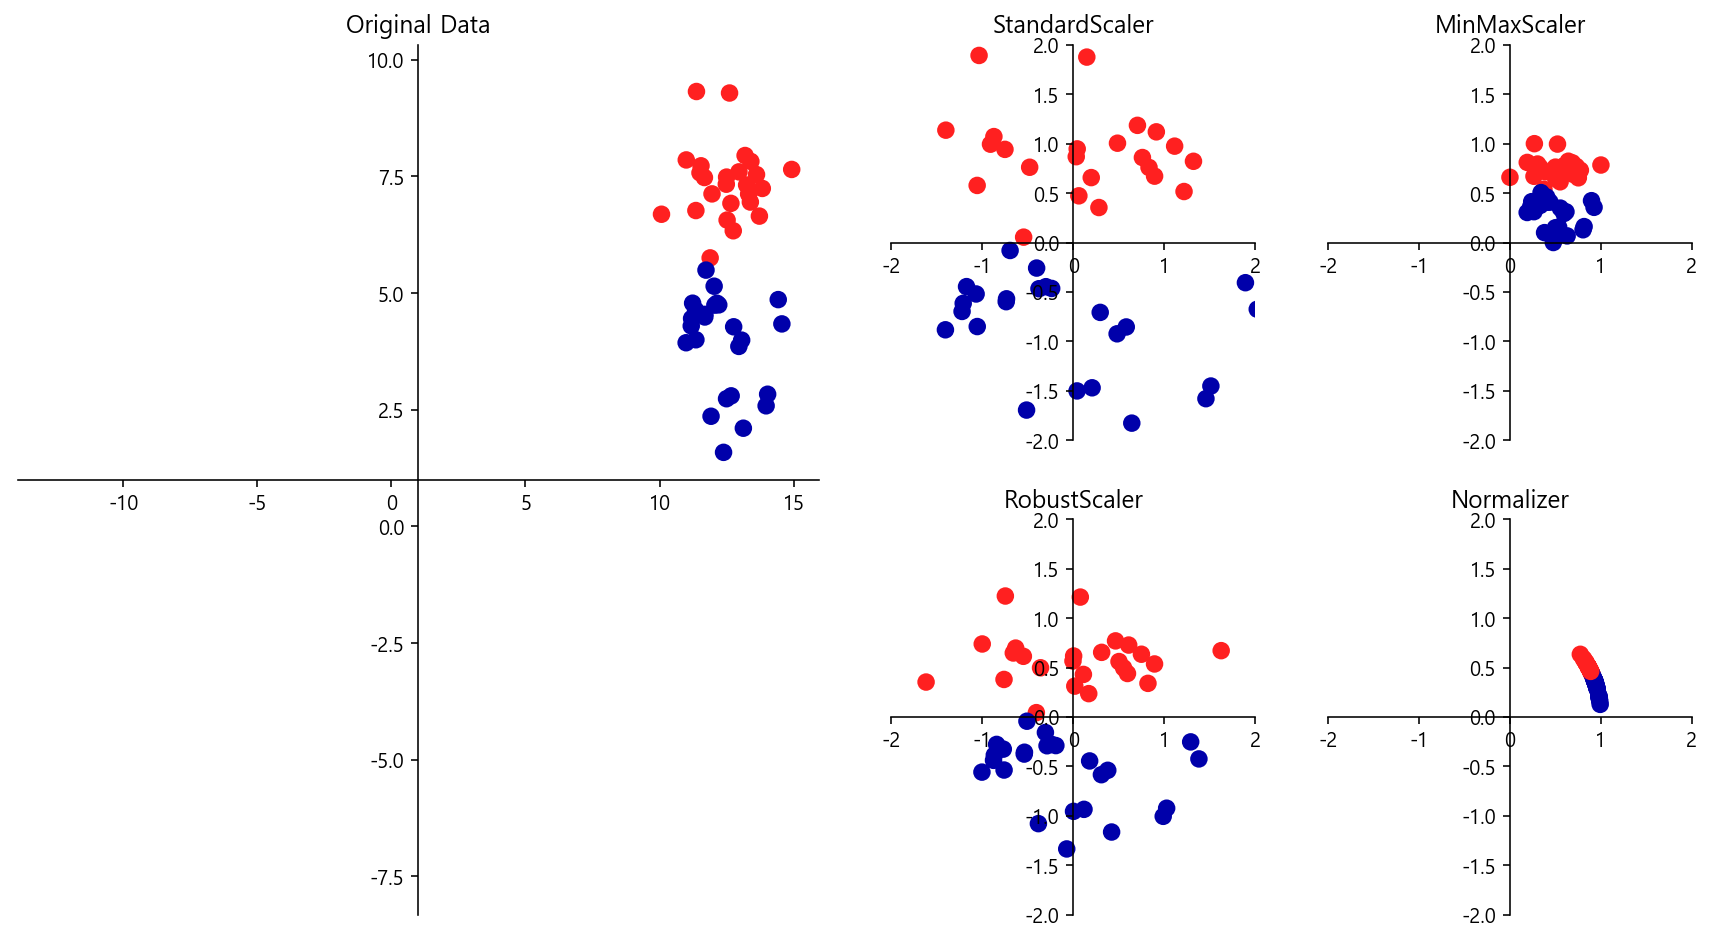

In [28]:
# 보통 특성마다 스케일을 조정해서 데이터를 변경한다.
mglearn.plots.plot_scaling()

# 두개의 특성을 인위적으로 만든 이진 분류 데이터셋

scikit-learn 의 standardScaler : 각 특성의 평균은 0 , 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다<br> 
 -특성의 최솟값과 최댓값 크기를 제한하지 않음<br>
RobustScaler : 특성이 같은 스케일을 갖게 된다는 standardScaler와 비슷하다. 하지만 평균과 분산 대신 중간값과 사분위 값을 사용<br>
 -이상치의 영향을 받지 않음
MinMaxScaler : 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경 <br>
Nomalize : 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정<?????<br>
> 유클리디안 길이 : 두점의 직선 거리

### 3.3.2 데이터 변환 적용
cancer 데이터 셋 / SVM(SVC) 적용 / 데이터 전처리 : MinMaxScaler

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)
# 569개의 데이터 포인트가 있고, 30의 측정값으로 이뤄져있다.

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #객체 생성

In [32]:
scaler.fit(X_train)# fit으로 학습

MinMaxScaler(copy=True, feature_range=(0, 1))

In [33]:
# 훈련데이터의 스케일을 조정하려면 스케일 객체의 transform 메서드를 사용한다.

X_train_scaled = scaler.transform(X_train)

print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값: \n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값: \n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값: \n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값: \n", X_train_scaled.max(axis=0))
# 모든 특성의 값이 0과 1사이로 만들어진 것을 확인

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값: 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [34]:
# SVM 적용을 위해 테스트 세트도 변환

X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값:\n",X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n",X_test_scaled.max(axis=0))
# 최솟값 최댓값이 0과 1이 아니고 일부 특성은 0~1 범위를 벗어남
# 항상 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다.
# transform 메서드는 테스트세트의 최솟값과 범위를 사용하지 않고, 항상 훈련 세트의 최솟값을 빼고 훈련세트의 범위로 나눈다.

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### 3.3.3 Quantile Transformer 와 PowerTransformer
Quantile Transformer : 기본적으로 1,000개의 분위를 사용하여 데이터를 균등하게 분포시킴
> RobustScaler 와 비슷하게 이상치에 민감하지 않고 전체 데이터를 0과 1사이로 압축한다.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

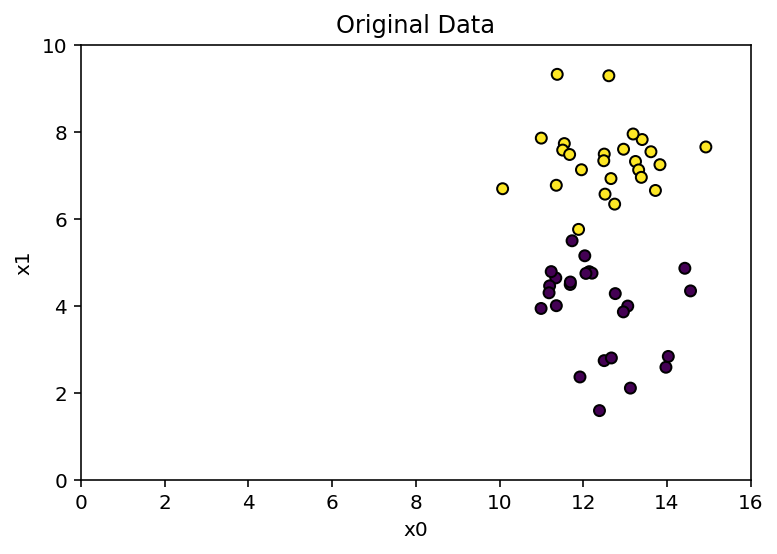

In [3]:
X,y = make_blobs(n_samples=50, centers=2,random_state=4,cluster_std=1)
X +=3

plt.scatter(X[:,0],X[:,1],c=y, s=30,edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

D:\anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


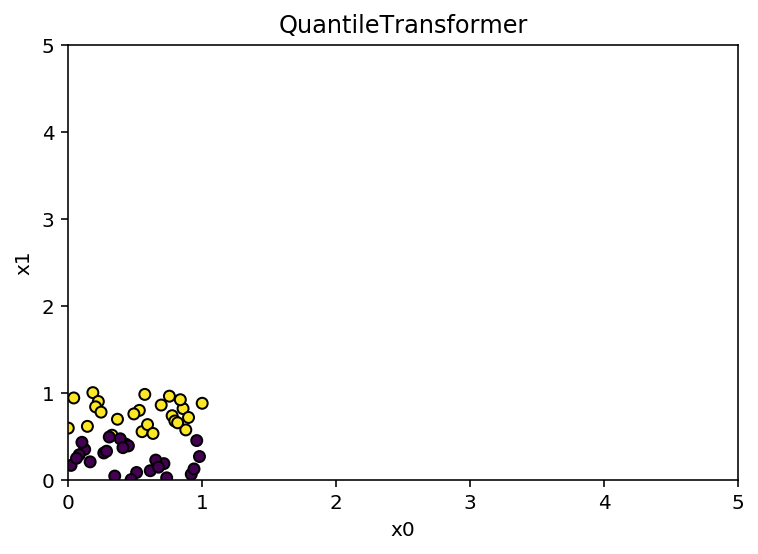

In [5]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0],X_trans[:,1],c=y, s=30,edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()
# 0과 1 사이에 고르게 분포되어 있는 것을 확인

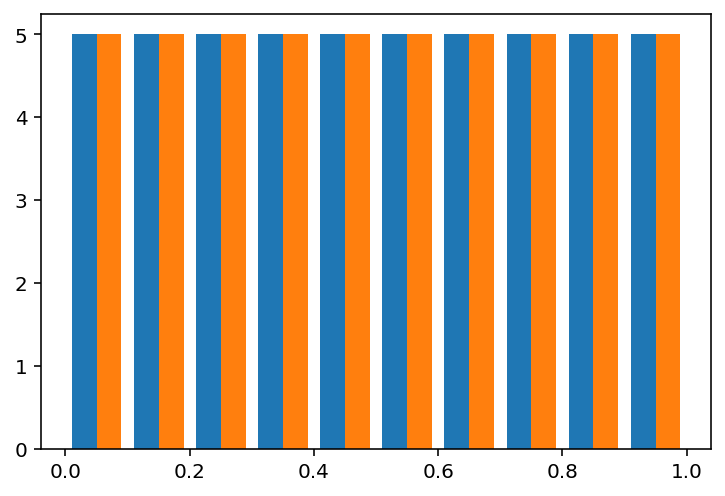

In [6]:
# 변환된 데이터의 히스토그램을 그려보면 균등 분포를 쉽게 확인할 수 있다.
plt.hist(X_trans)
plt.show()

QuantileTransformer의 분위 수는 n_quantiles 매개변수에서 설정할 수 있다.(기본값은 1000)<br>

In [8]:
print(scaler.quantiles_.shape)

(50, 2)


간단한 샘플 데이터 생성<br>
np.percentile() 함수 : 두번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환<br>
- 여기 예시에서는 첫번째, 1사분위, 중간값, 3사분위, 마지막값을 지정<br>
훈련 샘플이 모두 다섯개이므로 지정한 분위가 훈련 샘플과 정확히 일치하는 것을 확인


In [11]:
x =np.array([[0],[5],[8],[9],[10]])
print(np.percentile(x[:,0],[0,25,50,75,100]))

[ 0.  5.  8.  9. 10.]


In [13]:
x_trans =QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:,0],[0,25,50,75,100]))
# QuantileTransformer로 변환 후 결과를 보면 분위와 동일한 값으로 변환되었다는 것을 알 수 있음

[0.   0.25 0.5  0.75 1.  ]


D:\anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


D:\anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


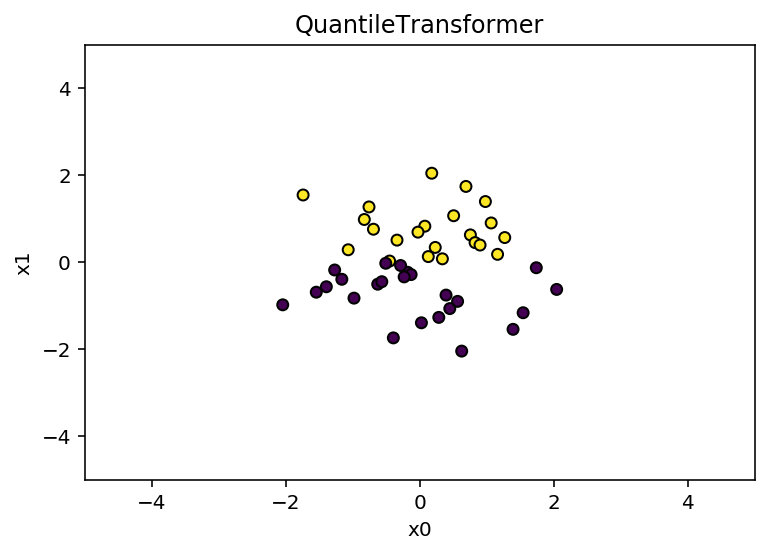

In [14]:
# QuantileTransformer는 output_distribution 매개변수에서 normal로 지정하여 정규분포로 출력을 바꿀 수 있다.

scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

PowerTransformer : 데이터의 특성별로 정규분포 형태에 가깝도록 변환<br>
- method 매개변수에 'yeo-johnson' , 'box-cox' 알고리즘을 지정할 수 있다. (기본값은 'yeo-johnson')

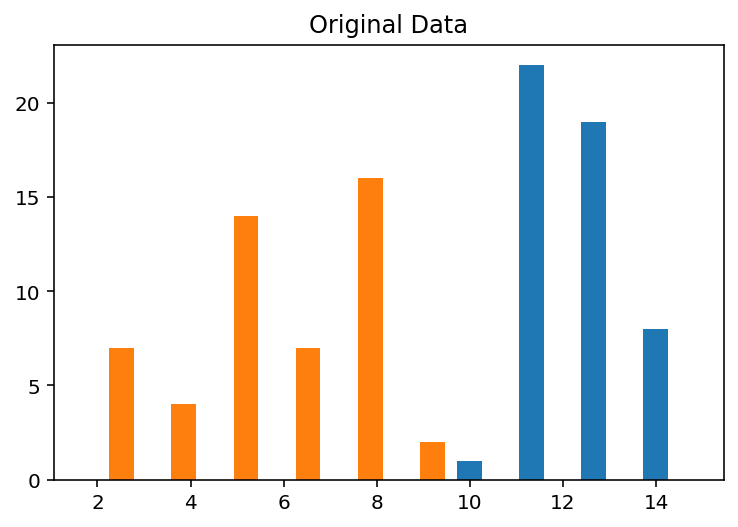

D:\anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


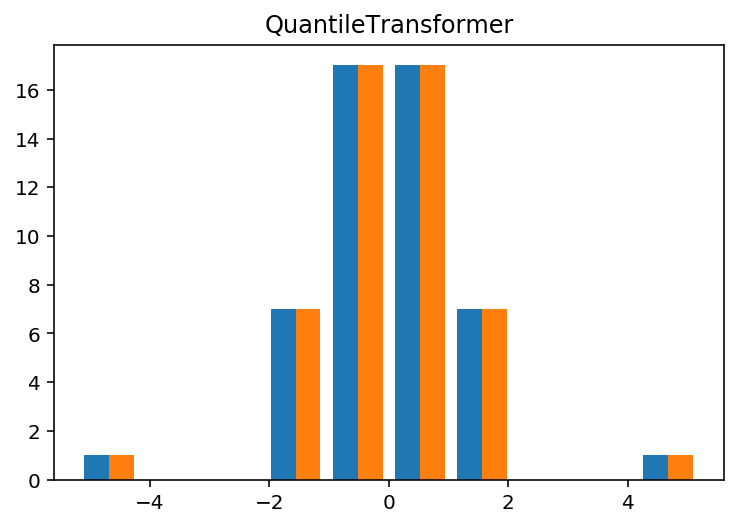

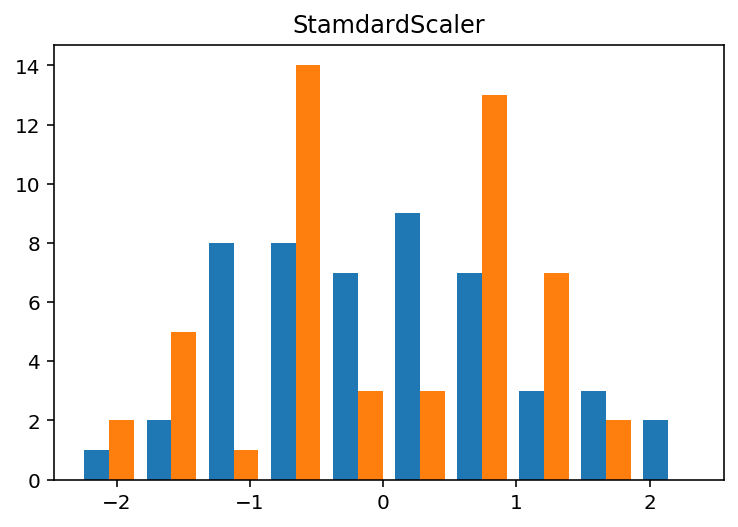

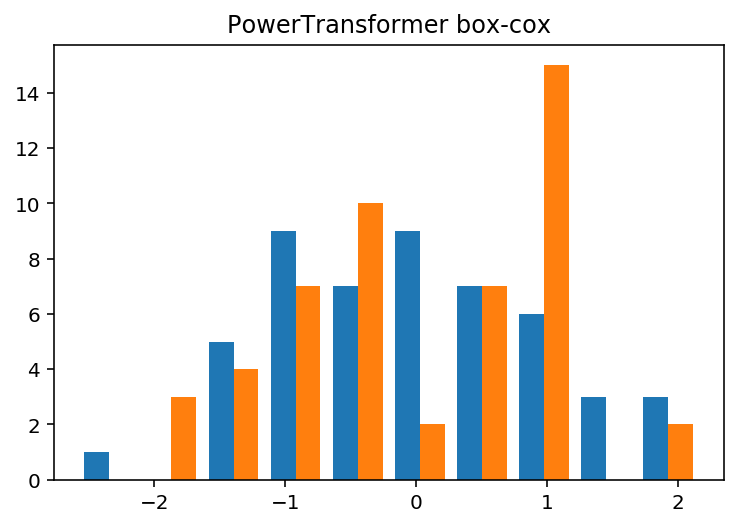

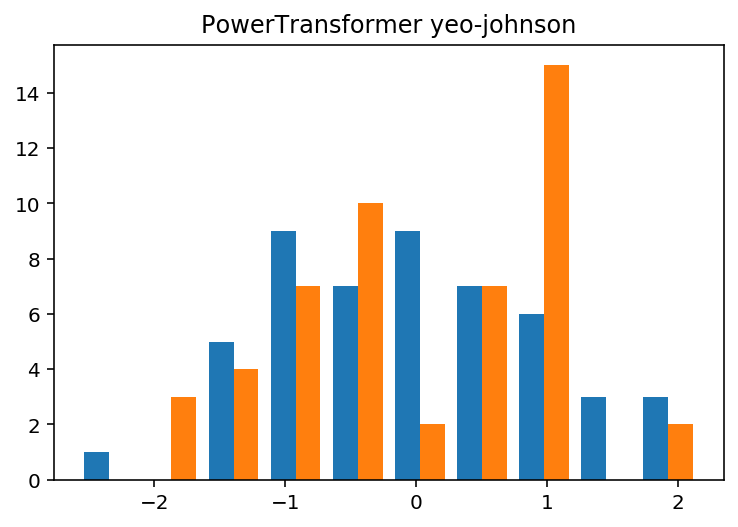

In [15]:
plt.hist(X)
plt.title('Original Data')
plt.show()
# normal로 정규분포 형태에 가깝도록 변환
X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StamdardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

PowerTransformer 두 알고리즘이 동일한 결과를 만들었다.<br>
어떤 변환이 정규분포에 가깝게 변환할지 사전에 알기 어렵기 때문에 변환기의 결과를 히스토그램으로 확인해보는 것이 좋다.

### 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다는 점이 중요하다.

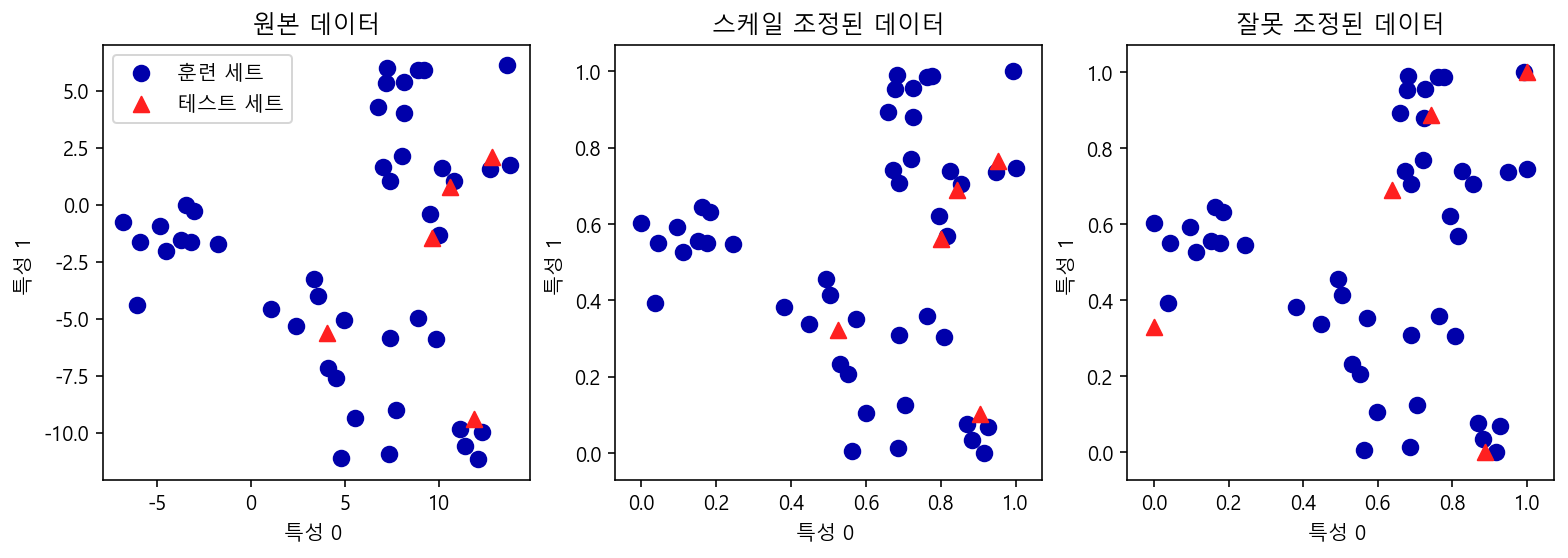

In [26]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std =2)
# 훈련세트와 테스트 세트로 나눔
X_train, X_test = train_test_split(X,random_state=5,test_size=.1)
# 훈련세트와 테스트 세트의 산점도를 그린다.
fig, axes = plt.subplots(1,3, figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], marker='^',c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler 로 스케일 조정
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#스케일이 조정된 데이터의 산점도를 그린다.
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2.colors[0], label="훈련 세트",s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^',c=mglearn.cm2.colors[1], label="테스트 세트",s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정 (절대 이렇게 사용해서는 안된다. (잘못된 방법임))
# 최솟값은 0 최댓값은 1 이 된다.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터로 산점도를 그림
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2.colors[0],label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], marker='^',c=mglearn.cm2.colors[1],label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes :
    ax.set_xlabel("특성 0 ")
    ax.set_ylabel("특성 1 ")
    


첫번째 그래프와 두번째 그래프의 테스트 세트는 축의 눈금만 바뀌었을뿐 동일하다.<br>
두번째 그래프의 테스트 세트는 최댓값, 최솟값이 1,0 이 아니다.<br>
하지만 세번째 그래프는 훈련 세트와 테스트세트의 스케일을 서로 다른 방식으로 조정하여, 훈련세트와 테스트세트는 최솟값과 최댓값은 0,1 이다.<br>
두번째와 비교를 해보았을 때 테스트 세트는 스케일이 다르게 조정되었기 때문에 훈련 세트와 다른 비율로 이동을 하여 데이터 배열이 뒤죽박죽이 되었다.

<b>단축 메서드와 효율적인 방법</b><BR>
 보통 어떤 데이터 셋에 fit을 적용하면 transform을 호출한다.<br>
  차례로 호출하는 것보다 효율적으로 하기 위해 두가지의 역할을 다 가진 fit_transform 메서드를 제공<br>
   

### 3.3.5 지도 학습에서 데이터 전처리 효과

In [6]:
# 원본 데이터로 SVC 모델을 만듬

from sklearn.svm import SVC
X_train, X_test , y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train,y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도 : 0.94


In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [14]:
X_train_scaled

array([[0.23044157, 0.32157676, 0.21940433, ..., 0.31484671, 0.30277942,
        0.09858323],
       [0.20062473, 0.42116183, 0.19452699, ..., 0.06965208, 0.34042973,
        0.06677161],
       [0.62232003, 0.76929461, 0.60403566, ..., 0.56079917, 0.19850187,
        0.07431457],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])

In [13]:
y_train

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [32]:
# 평균 0, 분산 1을 갖도록 스케일 조정

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = scaler.transform(X_test)

# 조정된 데이터로 svm 학습
svm.fit(X_train_scaled, y_train)
# 스케일 조정된 테스트 세트의 정확도
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))


ValueError: Found input variables with inconsistent numbers of samples: [143, 426]